# Cuestionarios de bienestar en el aula
Vanessa Rodríguez Horcajo-TFM.

En este notebook se recogen todas las funciones definidas para el análisis profundo de las respuestas de los cuestionarios de bienestar realizados por los alumnos.

Todos los cuestionarios ha sido recogidos durante los meses de noviembre a marzo, aunque existe la posibilidad de que haya algún cuestionario de abril que será necesario eliminar. Cada uno de los cuestionarios disponibles recoge las respuestas a un conjunto de preguntas relativas a una franja de tiempo de dos horas, el periodo de tiempo que dura una clase de una asignatura según lo establecido en los horarios lectivos en la Escuela Técnica Superior de Ingeniería de Sistemas Informáticos (ETSISI - UPM). En concreto, se recogen las respuestas para las siguientes preguntas:


1. Nombre y apellidos del alumno.
2. Aula a la que pertenece.
3. Fecha en la que se rellena el cuestionario.
4. Hora de inicio de la clase.
5. Hora de finalización de la clase.
6. Puesto en el aula donde se encuentra sentado el alumno.
7. Si están las luces apagadas. Respuesta binaria Si/No.
8. Grado de apertura de las cortinas del aula según una escala de Likert de 1 a 5, siendo 5 todas las cortinas abiertas y 1 todas las cortinas cerradas.
9. Adecuación de la luminosidad durante la clase según una escala de Likert de 1 a 5, siendo 5 una luminosidad totalmente adecuada y 1 una luminosidad nada adecuada.
10. Nivel de ruido durante la clase según una escala de Likert de 1 a 5, siendo 5 un bajo nivel de ruido y 1 un nivel alto de ruido.
11. 11a. Si está el aire acondicionado encendido. Respuesta binaria Si/No. 11b.En caso afirmativo, debe indicarse los grados si es posible su identificación.
12. Si está la calefacción encendida. Respuesta binaria Si/No.
13. Si están las ventanas abiertas. Respuesta ternaria Parcialmente/Si/No.
14. Adecuación de la temperatura durante la clase según una escala de Likert de 1 a 5, siendo 5 una temperatura totalmente adecuada y 1 una temperatura nada adecuada.
15. Densidad y carga del ambiente según una escala de Likert de 1 a 5, siendo 5 un ambiente nada cargado y 1 un ambiente muy cargado.
16. Grado de ocupación del aula según una escala de Likert de 1 a 5, siendo 5 un aula llena y 1 un aula vacía.
17. Grado de comodidad del aula durante la clase según una escala de Likert de 1 a 5, siendo 5 totalmente confortable y 1 no confortable.
18. Opinión de la afirmación *La docencia impartida en la clase me ha parecido buena* según una escala de Likert totalmente de acuerdo, de acuerdo, normal, en desacuerdo y totalmente en desacuerdo.
19. Opinión de la afirmación *Mi estado ANÍMICO durante la clase ha sido bueno* según una escala de Likert totalmente de acuerdo, de acuerdo, ni de acuerdo ni en desacuerdo, en desacuerdo y totalmente en desacuerdo.
20. Emociones identificadas en su estado anímico: eufórico, motivado, contento, normal, cansado, con ansiedad, agobiado, estresado, triste, aburrido o dormido. Pregunta de respuesta múltiple.
21. Opinión de la afirmación *Mi estado FÍSICO durante la clase ha sido bueno* según una escala de Likert totalmente de acuerdo, de acuerdo, ni de acuerdo ni en desacuerdo, en desacuerdo y totalmente en desacuerdo.
22. Emociones identificadas en su estado físico: enérgico, normal, agotado, enfermo, con hambre o sed, con dolor de cuello, con dolor de cabeza, con dolor de espalda o con sueño. Pregunta de respuesta múltiple.

Todos los cuestionarios se encuentran almacenados en Google Drive en diferentes archivos CSV dependiendo del aula y grupo al que pertenecen. Previamente a la subida de los datos al almacenamiento en la nube, ha sido necesario llevar a cabo un proceso manual de ajuste de datos puesto que las horas de inicio y finalización de la clase no se ajustaba a la franja de dos horas estipulada en el horario de clases debido a que los alumnos no registraron dichas horas sino las horas de inicio y finalización de la docencia en esa clase. Por ejemplo, para las franjas de 9:00:00 a 11:00:00 había horas de inicio para las 9:02:00 o 9:10:00 y horas de finalización de 10:47:00 o 10:39:00. Asimismo, se ha llevado a cabo otro proceso manual en paralelo destinado a corregir errores en las horas 1:00:00 y 0:00:00, que se han modificado a 13:00:00 y 12:00:00.

Con el objetivo de poder correlacionar las respuestas de bienestar de estos cuestionarios con los datos ambientales recogidos por las motas sensoras en las aulas, se ha llevado a cabo un proceso de mapeo manual en el que se incluye en una nueva columna la mota más cercana en función del puesto indicado por el alumno.



In [ ]:
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Acceso a Google Drive para la carga de los daatos

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Funciones comunes

En esta sección se recogen todas las funciones comunes empleadas en en análisis de las variables de los cuatro grupos de datos diferentes recogido en secciones posteriores.

#### Funciones de visualizado de variables

En esta sección se recogen las funciones empleadas para la visualización gráfica de las variables del DataFrame a analizar.

Función `get_titulo`: función encargada de devolver la franja horaria a la que pertenecen los datos de un DataFrame. Recibe como parámetro el nombre del DataFrame.

In [ ]:
def get_titulo(name):
  title = name[-2:]
  franja = ''
  if title == 'f1':
    franja = 'primera franja'
  elif title == 'f2':
    franja = 'segunda franja'
  else: franja = 'tercera franja'

  return franja

Función `pinta_figuras`: función encargada de representar visualmente los datos para una variable del DataFrame concreta. Dibuja un diagrama de barras para cada DataFrame proporcionado. Cada uno de estos DataFrames se corresponde con una franja horaria.

Recibe como parámetros el diccionario de DataFrames, los títulos de los ejes x e y, el título del diagrama de barras, el color que se quiere asignar al diagrama de barras, la columna de la que se quiere obtener la información, el tamaño de las figuras y el espacio libre a dejar entre la visualización de cada una de ellas. Además, existe un parámetro adicional `numerica` que permite distinguir si la columna que se quiere representar es numérica o categórica y ajustar el visualizado gráfico de la variable en consecuencia, y un parámetro `rotation` que permite rotar el nombre de los valores del eje x.

In [ ]:
def pinta_figuras(data_frames, x_label, y_label, title, colour, col, numerica = True, rotation = False, tamaño_g = (14, 6), space = 0.5):

  fig, axs = plt.subplots(1, 3, figsize=tamaño_g)

  for i, (df_name, df) in enumerate(data_frames.items()):

      freq_values = df[col].value_counts().sort_index()
      titulo = get_titulo(df_name)

      ax = axs[i]
      if numerica:
        bars = ax.bar([str(val) for val in freq_values.index], freq_values.values, color=colour)
      else:
        bars = ax.bar(freq_values.index, freq_values.values, color=colour)

      if rotation:
        ax.set_xticks(range(len(freq_values.index)))
        ax.set_xticklabels(freq_values.index, rotation=90)

      ax.set_xlabel(x_label)
      ax.set_ylabel(y_label)
      ax.set_title(title + ' de la ' + titulo)


      for bar in bars:
          height = bar.get_height()
          ax.annotate('{}'.format(height),
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),
                      textcoords="offset points",
                      ha='center', va='bottom')


  plt.tight_layout()
  plt.subplots_adjust(wspace=space)
  plt.show()

#### Funciones de visualizado de información

En esta sección se recogen las funciones empleadas para la visualización de información del DataFrame analizado.

Función `get_info`: función encargada de mostrar información relativa al número de muestras que pertenecen a cada una de las franjas horarias del DataFrame original.

In [ ]:
def get_info(dataframe):
  print(f"{dataframe.shape[0]} cuestionarios pertenecen a la franja de {dataframe['HIC'][0]} a {dataframe['HFC'][0]}\n")

Función `get_franjas`: función encargada de dividir el DataFrame original de los datos en tres DataFrames diferentes de tal manera que cada uno contenga los datos relativos a una única franja horaria. Además, hace uso de la función anterior para mostrar la cantidad de muestras de cada uno de los DataFrames generados. Recibe un parámetro m para controlar si las franjas en las que se quiere dividir el DataFrame son de mañana o de tarde.

In [ ]:
def get_franjas(dataframe, m = True):
  print(f"Se diponen de {dataframe.shape[0]} cuestionarios en total de los que:\n ")
  if m:
    dataframe_f1 = dataframe[(dataframe['HIC'] == '9:00:00') & (dataframe['HFC'] == '11:00:00')]
    dataframe_f2 = dataframe[(dataframe['HIC'] == '11:00:00') & (dataframe['HFC'] == '13:00:00')]
    dataframe_f3 = dataframe[(dataframe['HIC'] == '13:00:00') & (dataframe['HFC'] == '15:00:00')]
  else:
    dataframe_f1 = dataframe[(dataframe['HIC'] == '15:00:00') & (dataframe['HFC'] == '17:00:00')]
    dataframe_f2 = dataframe[(dataframe['HIC'] == '17:00:00') & (dataframe['HFC'] == '19:00:00')]
    dataframe_f3 = dataframe[(dataframe['HIC'] == '19:00:00') & (dataframe['HFC'] == '21:00:00')]


  dataframe_f1.reset_index(drop=True, inplace=True)
  dataframe_f2.reset_index(drop=True, inplace=True)
  dataframe_f3.reset_index(drop=True, inplace=True)


  get_info(dataframe_f1)
  get_info(dataframe_f2)
  get_info(dataframe_f3)

  return dataframe_f1, dataframe_f2, dataframe_f3

## Cuestionarios aula 3301

### Grupo de mañana

#### Carga y preparación de los datos

Comenzamos analizando los datos del aula 3301 del grupo de mañana. Para ello, cargamos los datos almacenados en su correspondiente archivo de Google Drive.

In [ ]:
r_3301M = "/content/drive/My Drive/TFM/Cuestionarios/3301M/3301M_m.csv"

In [ ]:
df_3301M = pd.read_csv(r_3301M, sep=';', encoding='utf-8')
df_3301M.head(1)

Marca temporal       Apellidos, Nombre:  Aula:      Fecha:  \
0  2023/11/09 9:17:37 p. m. EET  Padilla Ericksen, Elisa   3301  08/11/2023   

  Hora Inicio Clase Hora Fin Clase Mota  \
0           9:00:00       11:00:00   M1   

    Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0  en el centro de la 3ª fila de la derecha                           No   

   ¿Están las cortinas abiertas?  ...  ¿Están las ventanas abiertas?  \
0                            5.0  ...                   Parcialmente   

   La temperatura del aula durante la clase ha sido  \
0                                                 4   

  ¿Se ha notado un ambiente cargado?  \
0                                  2   

  En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  2         

  En general, durante la clase, el aula me ha parecido...  \
0                                                  4        

  La docencia impartida en la clase me ha parecido buena:  \
0                                         De acuerdo        

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                             Totalmente de acuerdo   

   Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                  Motivado;Contento                                                    

   Mi estado FÍSICO durante la clase ha sido bueno  \
0                                       De acuerdo   

   Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                   Normal;Con sueño                                                 

[1 rows x 25 columns]

Una vez cargados los datos, en primer lugar, se eliminan las columnas que no son de interés para el análisis en cuestión. Además, mediante el borrado de la columna que contiene el nombre y los apellidos del alumno que rellena el cuestionario y la columna del aula a la que pertenece, se consigue la anonimización completa de los datos.

In [ ]:
df_3301M = df_3301M.drop(columns=['Marca temporal', 'Apellidos, Nombre:', 'Aula:'])
df_3301M.head(1)

Fecha: Hora Inicio Clase Hora Fin Clase Mota  \
0  08/11/2023           9:00:00       11:00:00   M1   

    Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0  en el centro de la 3ª fila de la derecha                           No   

   ¿Están las cortinas abiertas?  La luminosidad durante la clase ha sido  \
0                            5.0                                        5   

   Nivel de ruido durante la clase ¿Está el aire acondicionado encendido?  \
0                                5                                     No   

   ... ¿Están las ventanas abiertas?  \
0  ...                  Parcialmente   

  La temperatura del aula durante la clase ha sido  \
0                                                4   

  ¿Se ha notado un ambiente cargado?  \
0                                  2   

   En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  2          

   En general, durante la clase, el aula me ha parecido...  \
0                                                  4         

   La docencia impartida en la clase me ha parecido buena:  \
0                                         De acuerdo         

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                             Totalmente de acuerdo   

  Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                  Motivado;Contento                                                   

  Mi estado FÍSICO durante la clase ha sido bueno  \
0                                      De acuerdo   

  Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                   Normal;Con sueño                                                

[1 rows x 22 columns]

In [ ]:
df_3301M.columns

Index(['Fecha:', 'Hora Inicio Clase', 'Hora Fin Clase', 'Mota',
       'Puesto del aula en el que estás sentado:',
       '¿Están las luces  apagadas?', '¿Están las cortinas abiertas?',
       'La luminosidad durante la clase ha sido',
       'Nivel de ruido durante la clase',
       '¿Está el aire acondicionado encendido?',
       'En caso afirmativo,  indica los grados si los puedes identificar:',
       '¿Está la calefacción encendida?', '¿Están las ventanas abiertas?',
       'La temperatura del aula durante la clase ha sido',
       '¿Se ha notado un ambiente cargado?',
       'En cuanto a ocupación del aula, dirías que el aula está:',
       'En general, durante la clase, el aula me ha parecido...',
       'La docencia impartida en la clase me ha parecido buena:',
       'Mi estado ANÍMICO durante la clase ha sido bueno',
       'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas',
       'Mi estado FÍSICO durante la clase ha sido b

Como puede observarse, como nombres de las columnas del DataFrame se mantienen las preguntas del cuestionario. Para facilitar el acceso y manejo de dichas columnas, se ha decidido renombrarlas con nombres más cortos que permitan de igual modo su correcta y completa identificación.

In [ ]:
nuevos_nombres = {'Fecha:': 'Date',
                  'Hora Inicio Clase': 'HIC',
                  'Hora Fin Clase': 'HFC',
                  'Puesto del aula en el que estás sentado:': 'Puesto',
                  '¿Están las luces  apagadas?': 'Luces_apagadas',
                  '¿Están las cortinas abiertas?': 'Cortinas_abiertas',
                  'La luminosidad durante la clase ha sido': 'Luminosidad',
                  'Nivel de ruido durante la clase': 'Ruido',
                  '¿Está el aire acondicionado encendido?': 'AACC_enc',
                  'En caso afirmativo,  indica los grados si los puedes identificar:': 'Grados_AACC',
                  '¿Está la calefacción encendida?': 'Calefacción_enc',
                  '¿Están las ventanas abiertas?': 'Ventanas_abiertas',
                  'La temperatura del aula durante la clase ha sido': 'Temperatura',
                  '¿Se ha notado un ambiente cargado?': 'Ambiente_cargado',
                  'En cuanto a ocupación del aula, dirías que el aula está:': 'Ocupación_aula',
                  'En general, durante la clase, el aula me ha parecido...': 'Comodidad_aula',
                  'La docencia impartida en la clase me ha parecido buena:': 'Docencia',
                  'Mi estado ANÍMICO durante la clase ha sido bueno': 'E_anímico',
                  'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_ánimo',
                  'Mi estado FÍSICO durante la clase ha sido bueno': 'E_físico',
                  'Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_físico'
                  }

df_3301M = df_3301M.rename(columns=nuevos_nombres)
df_3301M.head(1)

Date      HIC       HFC Mota  \
0  08/11/2023  9:00:00  11:00:00   M1   

                                      Puesto Luces_apagadas  \
0  en el centro de la 3ª fila de la derecha              No   

   Cortinas_abiertas  Luminosidad  Ruido AACC_enc  ... Ventanas_abiertas  \
0                5.0            5      5       No  ...      Parcialmente   

  Temperatura Ambiente_cargado  Ocupación_aula  Comodidad_aula    Docencia  \
0           4                2               2               4  De acuerdo   

               E_anímico  Sentimiento_ánimo    E_físico Sentimiento_físico  
0  Totalmente de acuerdo  Motivado;Contento  De acuerdo   Normal;Con sueño  

[1 rows x 22 columns]

In [ ]:
df_3301M.columns

Index(['Date', 'HIC', 'HFC', 'Mota', 'Puesto', 'Luces_apagadas',
       'Cortinas_abiertas', 'Luminosidad', 'Ruido', 'AACC_enc', 'Grados_AACC',
       'Calefacción_enc', 'Ventanas_abiertas', 'Temperatura',
       'Ambiente_cargado', 'Ocupación_aula', 'Comodidad_aula', 'Docencia',
       'E_anímico', 'Sentimiento_ánimo', 'E_físico', 'Sentimiento_físico'],
      dtype='object')

In [ ]:
print(f'El DataFrame está formado por {df_3301M.shape[0]} filas y {df_3301M.shape[1]} columnas')

El DataFrame está formado por 525 filas y 22 columnas


#### Análisis de los datos

Una vez finalizada la preparación de los datos, es posible comenzar con su análisis en profundidad mediante el análisis gráfico de cada una de sus variables.



##### Date

En esta sección se analiza la variable de fecha del cuestionario. Tal y como puede observarse, disponemos de cuestionarios para 61 días. Sin embargo es necesario realizar un pequeño filtrado puesto que existen cuestionarios de abril que no son de interés para el presente estudio.

In [ ]:
df_3301M['Date'].unique()

array(['08/11/2023', '10/11/2023', '14/11/2023', '15/11/2023',
       '23/11/2023', '24/11/2023', '28/11/2023', '29/11/2023',
       '30/11/2023', '01/12/2023', '12/12/2023', '13/12/2023',
       '14/12/2023', '19/12/2023', '20/12/2023', '21/12/2023',
       '07/11/2023', '15/11/2033', '16/11/2023', '17/11/2023',
       '21/11/2023', '22/11/2023', '09/11/2023', '15/12/2023',
       '22/12/2023', '30/01/2023', '30/01/2024', '31/01/2023',
       '31/01/2024', '01/02/2024', '02/02/2024', '06/02/2024',
       '07/02/2024', '08/02/2024', '09/02/2024', '13/02/2024',
       '14/02/2024', '15/02/2024', '16/02/2024', '20/02/2024',
       '21/02/2024', '22/02/2024', '23/02/2024', '27/02/2024',
       '28/02/2024', '29/02/2024', '01/03/2024', '05/03/2024',
       '06/03/2024', '07/03/2024', '08/03/2024', '12/03/2024',
       '13/03/2024', '14/03/2024', '15/03/2024', '19/03/2024',
       '20/03/2024', '21/03/2024', '22/03/2024', '12/02/2024',
       '15/04/2024'], dtype=object)

In [ ]:
len(df_3301M['Date'].unique())

61

In [ ]:
df_3301M = df_3301M[df_3301M.apply(lambda fila: fila.Date.split('/')[1] != '04', axis=1)]
len(df_3301M['Date'].unique())

60

In [ ]:
df_3301M['Date'] = pd.to_datetime(df_3301M['Date'], format='%d/%m/%Y')

<ipython-input-43-82c9ae27a514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3301M['Date'] = pd.to_datetime(df_3301M['Date'], format='%d/%m/%Y')


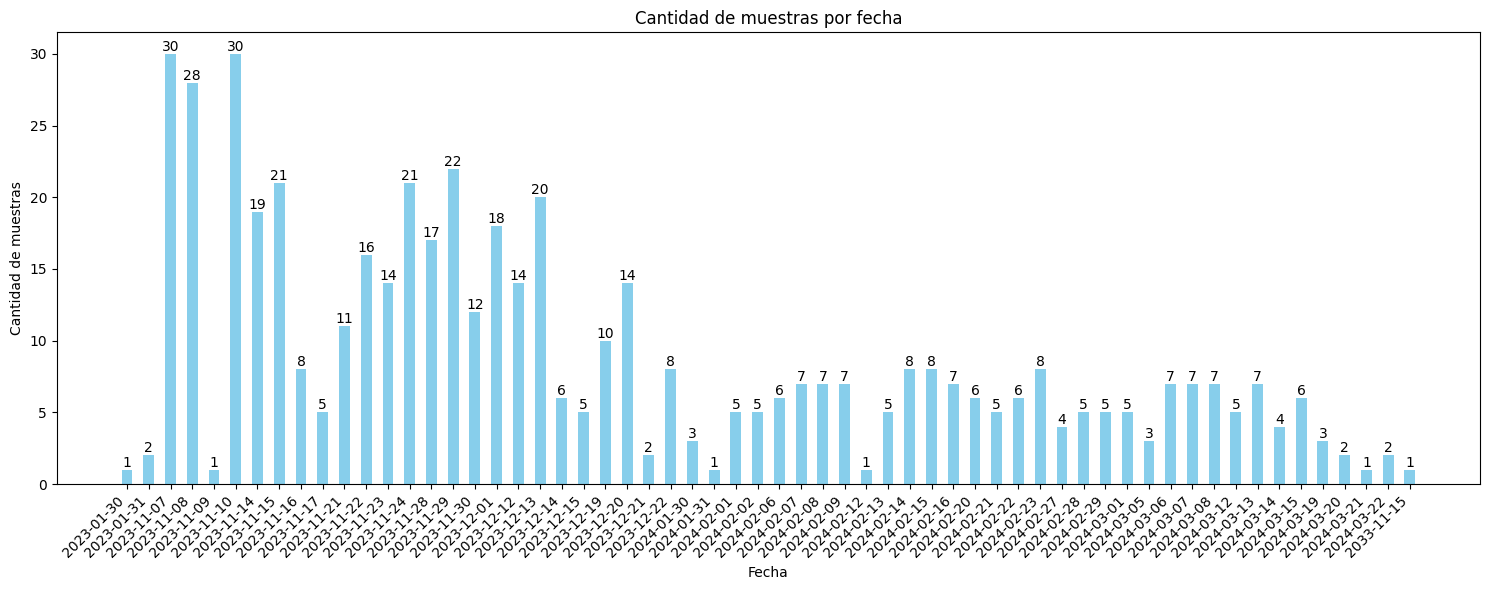

In [ ]:
muestras_por_fecha = df_3301M['Date'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
bars = plt.bar(muestras_por_fecha.index.astype(str), muestras_por_fecha.values, color='skyblue', width=0.5, align='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por fecha')

plt.tight_layout()
plt.show()

Tal y como puede observarse, el número de cuestionarios disponibles decrementa con el tiempo. Además es importante destacar que parece haber errores en las fechas:

* La recogida de cuestionarios comenzó el 01/11/2023 y sin embargo hay cuestionarios para fechas previas a ese día (30 y 31 de enero de 2023). Es muy probable que el año sea erróneo.

* Hay cuestionarios para el año 2033. De nuevo, el año de la fecha es erróneo.

In [ ]:
df_3301M.loc[df_3301M['Date'] == '15/11/2033', 'Date'] = '15/11/2023'
df_3301M.loc[df_3301M['Date'] == '30/01/2023', 'Date'] = '30/01/2024'
df_3301M.loc[df_3301M['Date'] == '31/01/2023', 'Date'] = '31/01/2024'

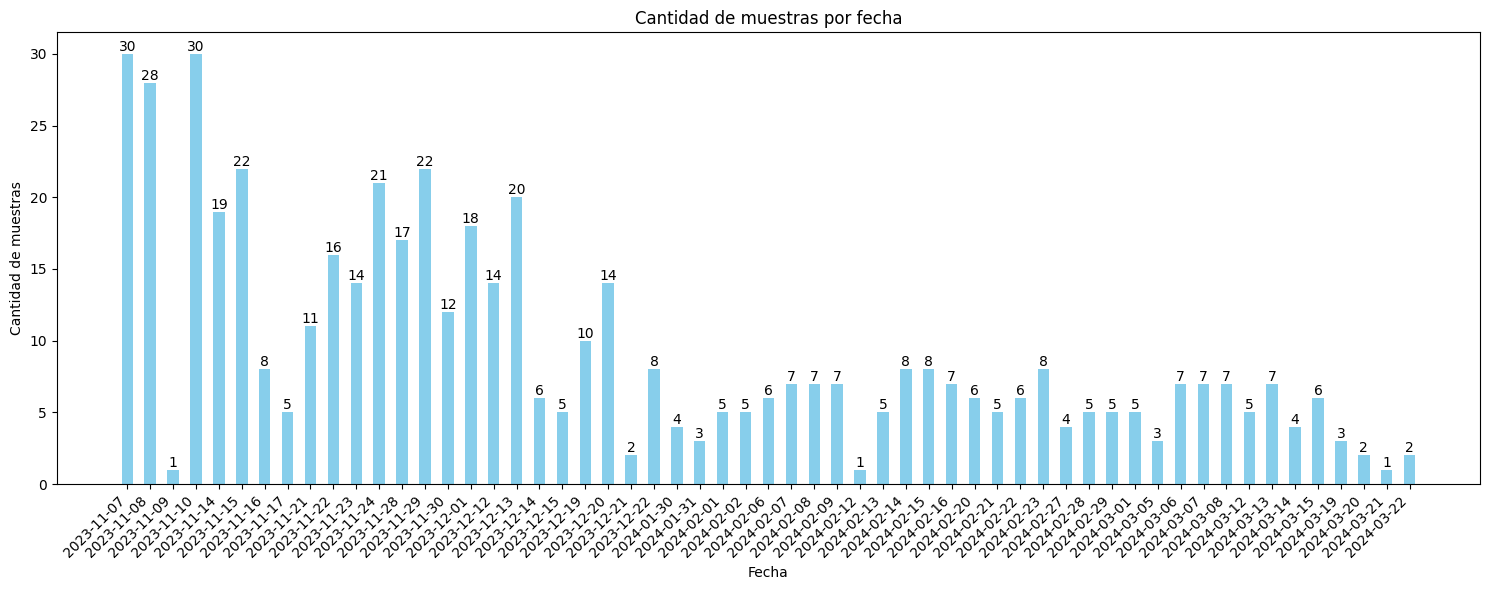

In [ ]:
muestras_por_fecha = df_3301M['Date'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
bars = plt.bar(muestras_por_fecha.index.astype(str), muestras_por_fecha.values, color='skyblue', width=0.5, align='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por fecha')

plt.tight_layout()
plt.show()

##### HIC y HFC

En esta sección se analiza la variable de hora de comienzo y de fin de las clases. Para los datos de este grupo en concreto, la jornada lectiva comienza a las 9:00:00 y finaliza a las 15:00:00. Teniendo esto en cuenta, es posible analizar cuantas muestras o cuestionarios hay disponibles para cada una de las franjas de dos horas que es posible definir: 9:00:00-11:00:00, 11:00:00-13:00:00 y 13:00:00-15:00:00.

In [ ]:
hic = type(df_3301M['HIC'][1])
hfc = type(df_3301M['HFC'][1])

print(f"La columna HIC es de tipo {hic}")
print(f"La columna HIC es de tipo {hfc}")

La columna HIC es de tipo <class 'str'>
La columna HIC es de tipo <class 'str'>


In [ ]:
df_3301M_f1, df_3301M_f2, df_3301M_f3 = get_franjas(df_3301M)


Se diponen de 524 cuestionarios en total de los que:
 
262 cuestionarios pertenecen a la franja de 9:00:00 a 11:00:00

192 cuestionarios pertenecen a la franja de 11:00:00 a 13:00:00

70 cuestionarios pertenecen a la franja de 13:00:00 a 15:00:00



Puesto que el resto de variables se analizarán de manera independiente para cada una de las tres franjas horarias definidas. Para facilitar dicho análisis y el acceso a los datos, los tres DataFrames generados se almacenan en un diccionario.

In [ ]:
data_frames_franjas = {'df1': df_3301M_f1,
                      'df2': df_3301M_f2,
                      'df3': df_3301M_f3}

##### Ocupación_aula

En esta sección, se analiza la variable de grado de ocupación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   5 cuestionarios reflejan un grado de ocupación de 1.
  *   39 cuestionarios reflejan un grado de ocupación de 2.
  *   89 cuestionarios reflejan un grado de ocupación de 3.
  *   100 cuestionarios reflejan un grado de ocupación de 4.
  *   29 cuestionarios reflejan un grado de ocupación de 5.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   5 cuestionarios reflejan un grado de ocupación de 1.
  *   18 cuestionarios reflejan un grado de ocupación de 2.
  *   62 cuestionarios reflejan un grado de ocupación de 3.
  *   73 cuestionarios reflejan un grado de ocupación de 4.
  *   34 cuestionarios reflejan un grado de ocupación de 5.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un grado de ocupación de 1.
  *   12 cuestionarios reflejan un grado de ocupación de 2.
  *   20 cuestionarios reflejan un grado de ocupación de 3.
  *   24 cuestionarios reflejan un grado de ocupación de 4.
  *   11 cuestionarios reflejan un grado de ocupación de 5.

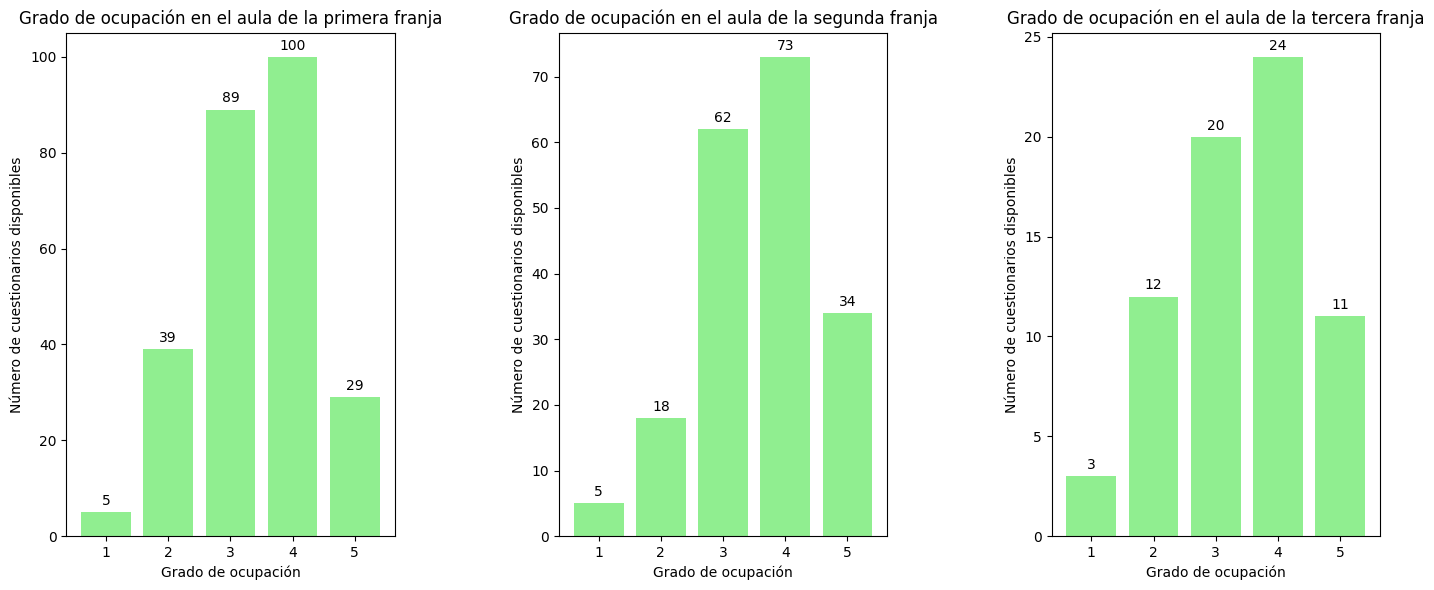

In [ ]:
x = 'Grado de ocupación'
y = 'Número de cuestionarios disponibles'
t = 'Grado de ocupación en el aula'
c = 'lightgreen'
columna = 'Ocupación_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna )

Se dispone de cuestionarios para todos los niveles posibles de ocupación en el aula.

##### Luces_apagadas

En esta sección, se analiza la variable de iluminación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  * 257 reflejan que las luces estaban encendidas en el aula.
  * 5 reflejan que las luces estaban apagadas en el aula.


* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  * 188 reflejan que las luces estaban encendidas en el aula.
  * 4 reflejan que las luces estaban apagadas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  * 68 reflejan que las luces estaban encendidas en el aula.
  * 2 reflejan que las luces estaban apagadas en el aula.

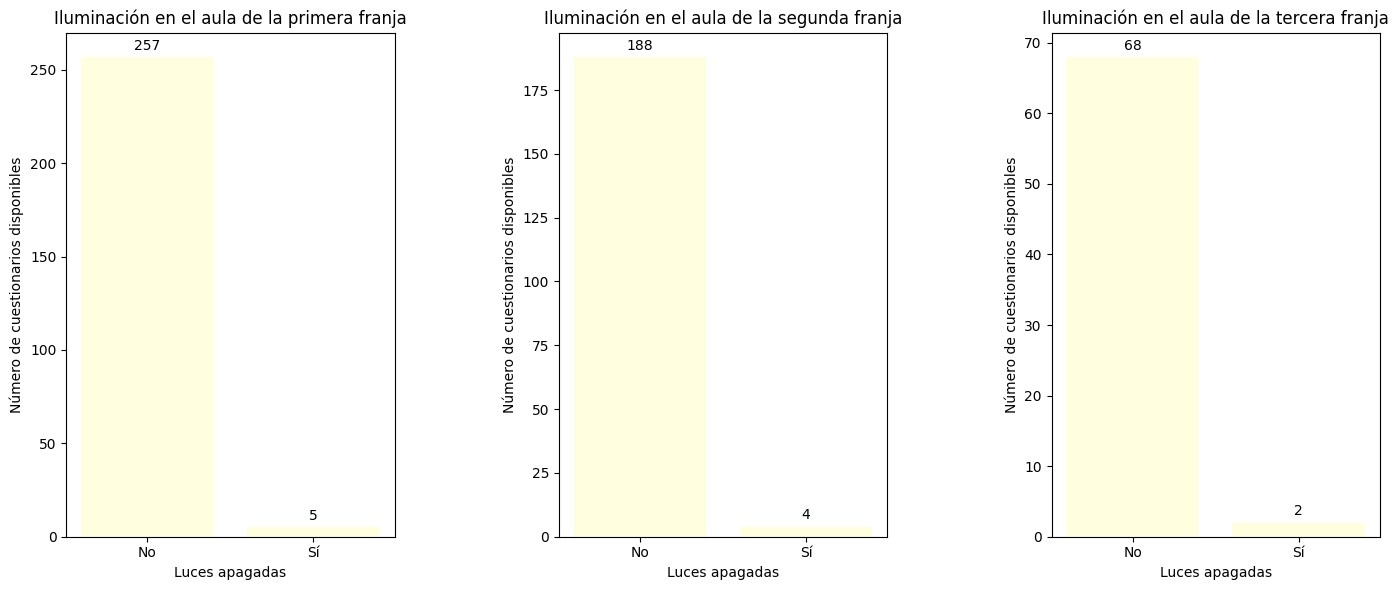

In [ ]:
x = 'Luces apagadas'
y = 'Número de cuestionarios disponibles'
t = 'Iluminación en el aula'
c = 'lightyellow'
columna = 'Luces_apagadas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de cuestionarios para todas las respuestas posibles a esta pregunta.

##### Cortinas_abiertas

En esta sección, se analiza la variable de apertura de cortinas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  * 3 reflejan todas las cortinas cerradas en el aula.
  * 10 reflejan más cortinas cerradas que abiertas en el aula.
  * 74 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 105 reflejan más cortinas abiertas que cerradas en el aula.
  * 68 reflejan todas las cortinas abiertas en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  * 1 refleja todas las cortinas cerradas en el aula.
  * 5 reflejan más cortinas cerradas que abiertas en el aula.
  * 58 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 82 reflejan más cortinas abiertas que cerradas en el aula.
  * 46 reflejan todas las cortinas abiertas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  * 1 refleja más cortinas cerradas que abiertas en el aula.
  * 22 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 34 refleja más cortinas abiertas que cerradas en el aula.
  * 13 refleja todas las cortinas abiertas en el aula.

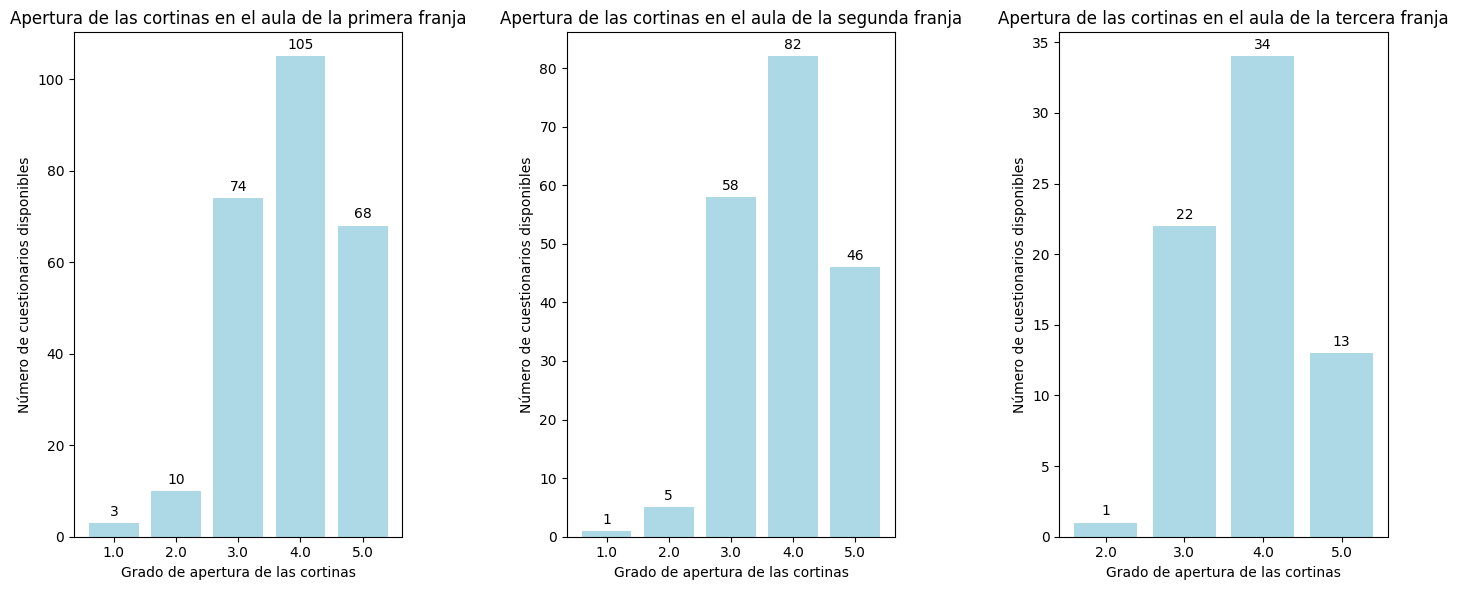

In [ ]:
x = 'Grado de apertura de las cortinas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las cortinas en el aula'
c = 'lightblue'
columna = 'Cortinas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se dispone de muestras donde se reflejen todas las cortinas cerradas para la tercera franja.




##### Luminosidad

En esta sección, se analiza la variable de luminosidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan una luminosidad inadecuada.
  *   25 cuestionarios reflejan una luminosidad normal.
  *   32 cuestionarios reflejan una luminosidad adecuada.
  *   203 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una luminosidad totalmente inadecuada.
  *   20 cuestionarios reflejan una luminosidad normal.
  *   34 cuestionarios reflejan una luminosidad adecuada.
  *   137 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una luminosidad normal.
  *   16 cuestionarios reflejan una luminosidad adecuada.
  *   53 cuestionarios reflejan una luminosidad totalmente adecuada.


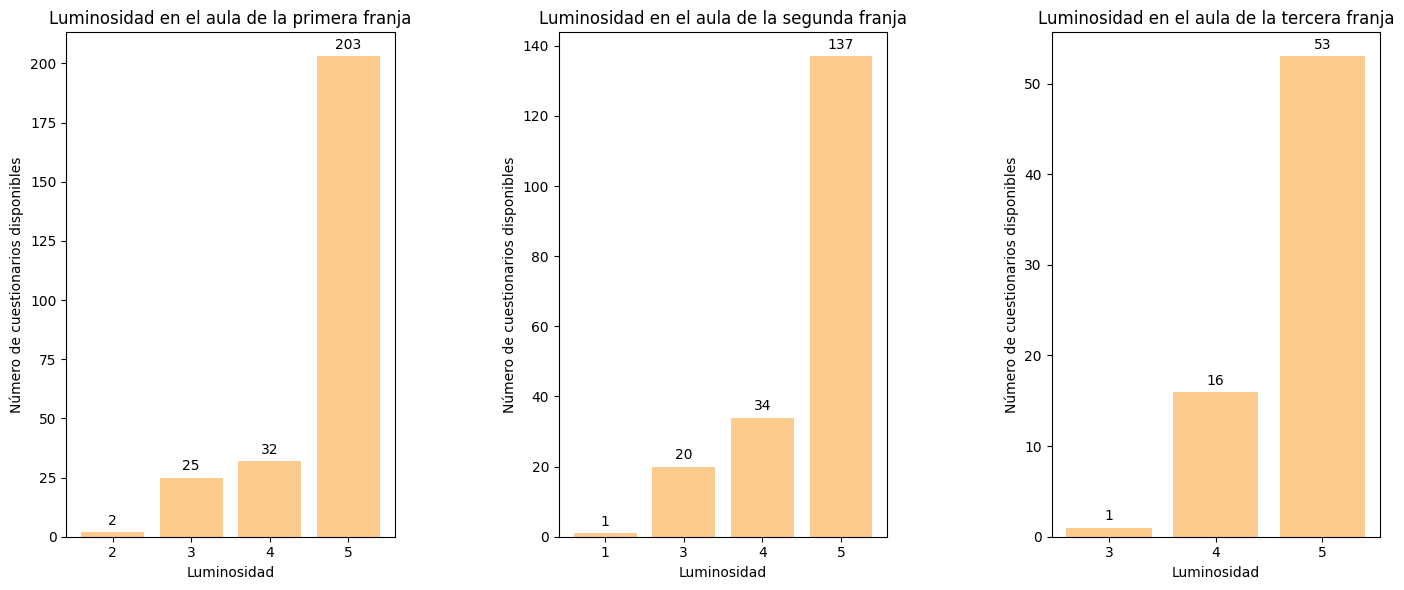

In [ ]:
x = 'Luminosidad'
y = 'Número de cuestionarios disponibles'
t = 'Luminosidad en el aula'
c = '#fdcb8e'
columna = 'Luminosidad'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje una luminosidad completamente inadecuada para la primera y tercera franja.

No se disponen de muestras donde se refleje una luminosidad inadecuada para la segunda y tercera franja.

##### Ruido

En esta sección, se analiza la variable de ruido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan un nivel de ruido totalmente inadecuado.
  *   22 cuestionarios reflejan un nivel de ruido inadecuado.
  *   27 cuestionarios reflejan un nivel de ruido normal.
  *   63 cuestionarios reflejan un nivel de ruido adecuado.
  *   134 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan un nivel de ruido totalmente inadecuado.
  *   13 cuestionarios reflejan un nivel de ruido inadecuado.
  *   21 cuestionarios reflejan un nivel de ruido normal.
  *   50 cuestionarios reflejan un nivel de ruido adecuado.
  *   102 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan un nivel de ruido totalmente inadecuado.
  *   2 cuestionarios reflejan un nivel de ruido inadecuado.
  *   6 cuestionarios reflejan un nivel de ruido normal.
  *   13 cuestionarios reflejan un nivel de ruido adecuado.
  *   47 cuestionarios reflejan un nivel de ruido totalmente adecuado.

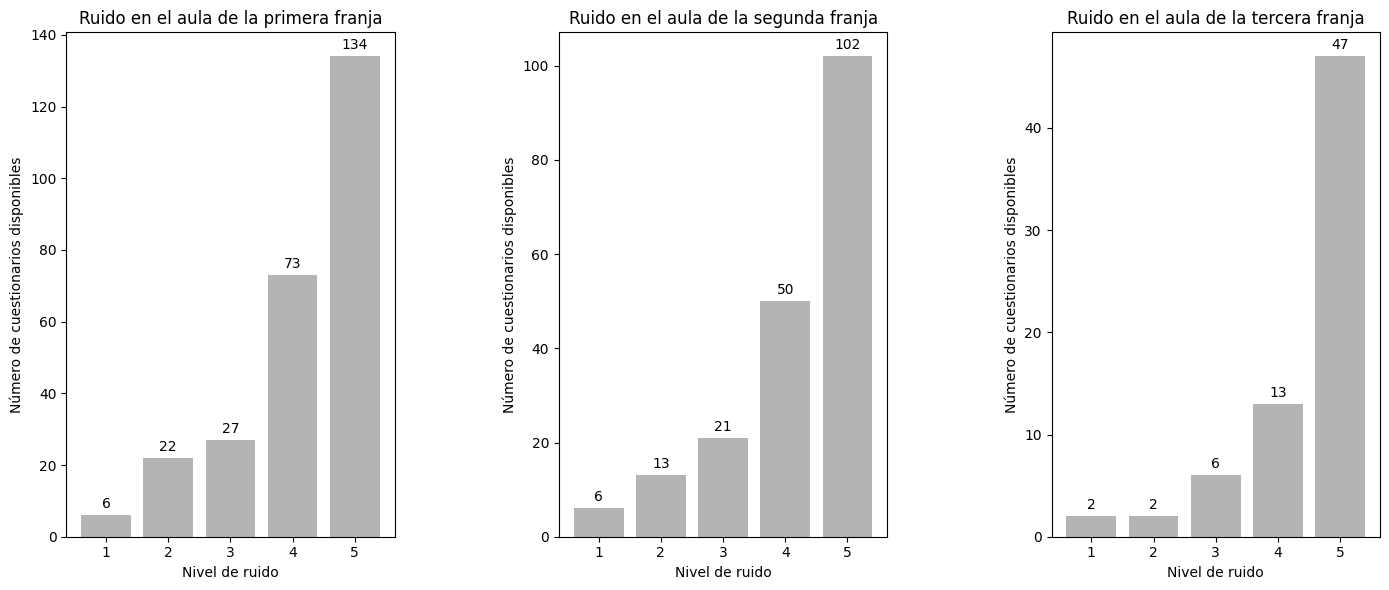

In [ ]:
x = 'Nivel de ruido'
y = 'Número de cuestionarios disponibles'
t = 'Ruido en el aula'
c = '#b5b4b3'
columna = 'Ruido'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)


Se dispone de información para todas las posibles respuestas a esta pregunta.

##### AACC_enc

En esta sección, se analiza la variable de aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:
  * 261 reflejan el aire acondicionado en el aula apagado.
  * 1 refleja el aire acondicionado en el aula encendido.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:
  * 191 reflejan el aire acondicionado en el aula apagado.
  * 1 refleja el aire acondicionado en el aula encendido.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

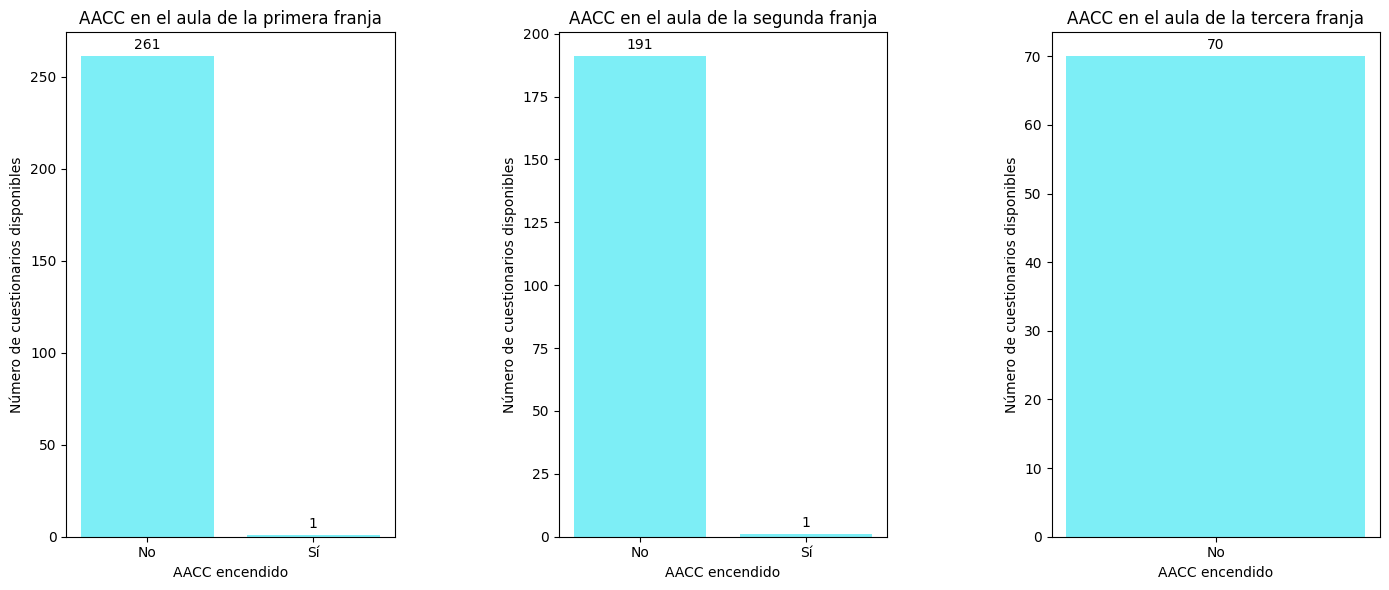

In [ ]:
x = 'AACC encendido'
y = 'Número de cuestionarios disponibles'
t = 'AACC en el aula'
c = '#7deef6'
columna = 'AACC_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se disponen de muestras donde se refleje el aire acondicionado del aula encendido para la tercera franja.

##### Grados_AACC

En esta sección, se analiza la variable de grados del aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la tercera franja, no se disponen de datos, algo lógico teniendo en cuenta que esta pregunta estaba condicionada a la respuesta afirmativa de la pregunta anterior (variable AACC_enc) y, como ya se ha analizado en la subsección previa, todos los cuestionarios reflejan que el aire acondicionado estaba apagado.

* Para la primera y segunda franja, se disponen de algunas muestras con el valor *TENGO FRIO* y *ETO EH UNA MIERDA*, un valor erróneo para este campo donde se esperan los grados de encendido del aire acondicionado.

In [ ]:
df_3301M_f1['Grados_AACC'].unique()

array([nan, 'TENGO FRIO', 'ETO EH UNA MIERDA'], dtype=object)

In [ ]:
df_3301M_f2['Grados_AACC'].unique()

array([nan, 'TENGO FRIO'], dtype=object)

In [ ]:
df_3301M_f3['Grados_AACC'].unique()

array([nan], dtype=object)

##### Calefacción_enc

En esta sección, se analiza la variable de calefacción encendida del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:
  * 111 reflejan la calefacción apagada en el aula.
  * 151 reflejan la calefacción encendida en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:
  * 80 reflejan la calefacción apagada en el aula.
  * 112 reflejan la calefacción encendida en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:
  * 26 reflejan la calefacción apagada en el aula.
  * 44 reflejan la calefacción encendida en el aula.

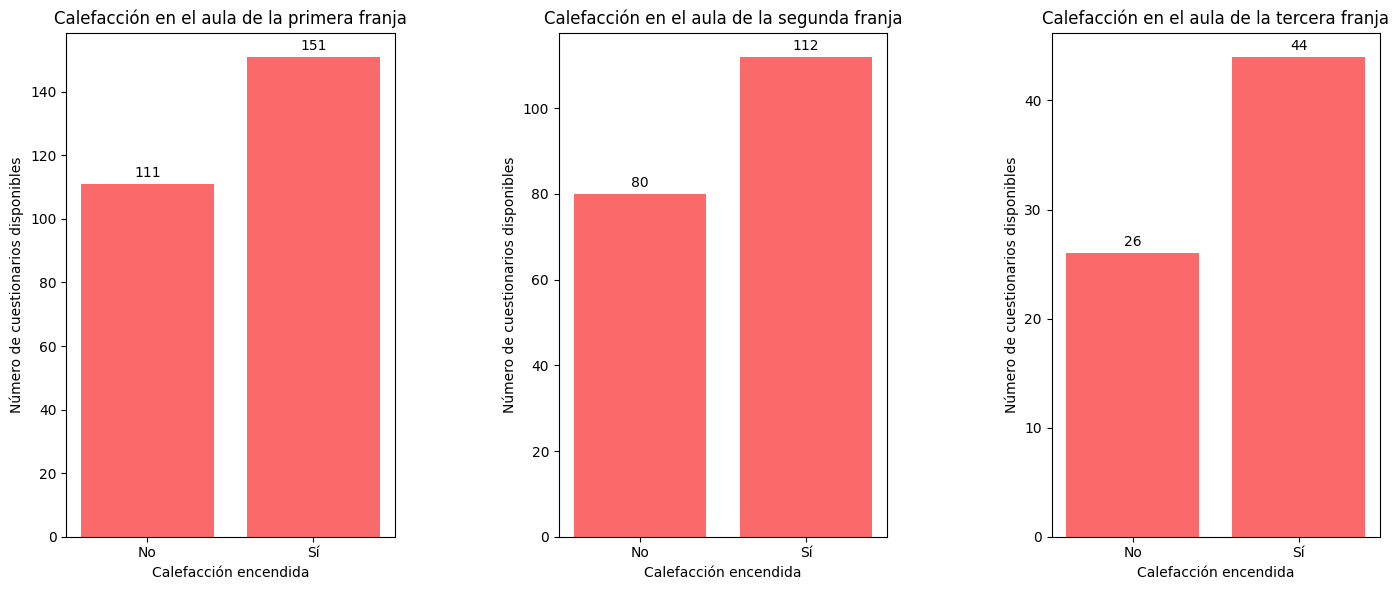

In [ ]:
x = 'Calefacción encendida'
y = 'Número de cuestionarios disponibles'
t = 'Calefacción en el aula'
c = '#fb6a6a'
columna = 'Calefacción_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de información para todas las posibles respuestas a esta pregunta.

##### Ventanas_abiertas

En esta sección, se analiza la variable de ventanas abiertas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:
  * 121 reflejan las ventanas cerradas en el aula.
  * 128 reflejan las ventanas parcialmente abiertas en el aula.  
  * 13 reflejan las ventanas abiertas en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:
  * 76 reflejan las ventanas cerradas en el aula.
  * 110 reflejan las ventanas parcialmente abiertas en el aula.  
  * 6 reflejan las ventanas abiertas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:
  * 26 reflejan las ventanas cerradas en el aula.
  * 43 reflejan las ventanas parcialmente abiertas en el aula.  
  * 1 refleja las ventanas abiertas en el aula.

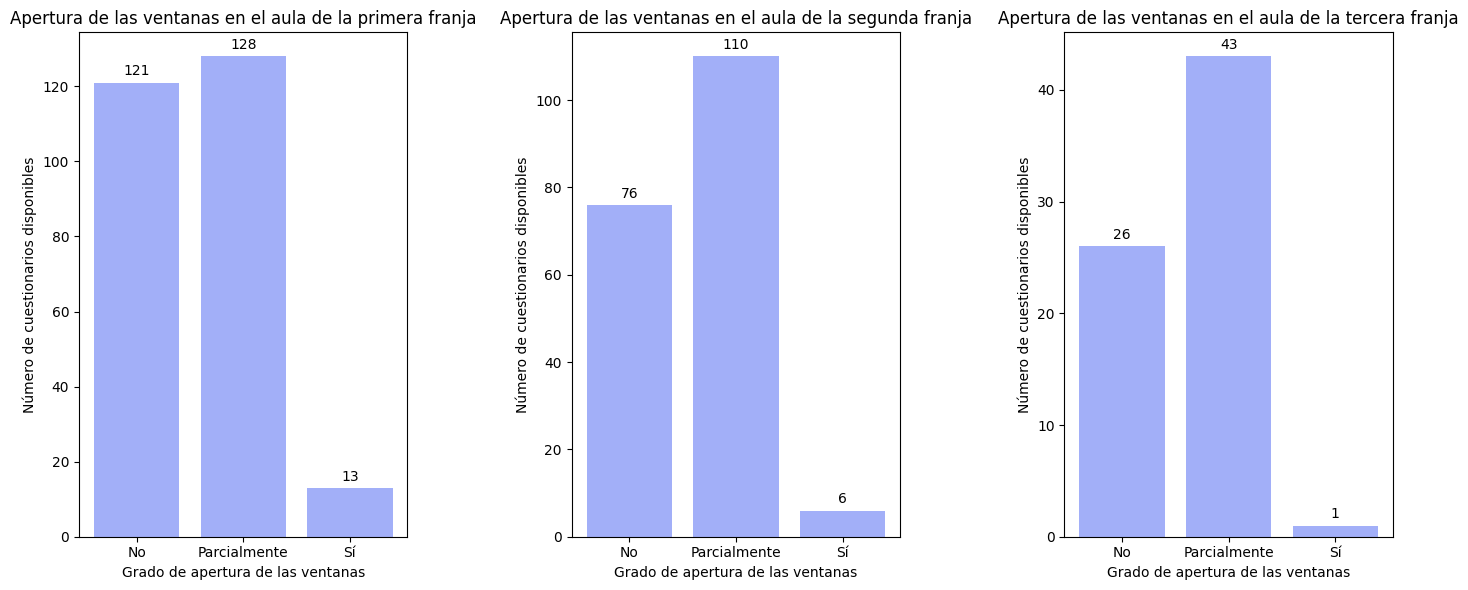

In [ ]:
x = 'Grado de apertura de las ventanas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las ventanas en el aula'
c = '#a2aff8'
columna = 'Ventanas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de indormación para todas las posibles respuestas a esta pregunta.

##### Temperatura

En esta sección, se analiza la variable de temperatura del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:
  *   2 cuestionarios reflejan una temperatura totalmente inadecuada.
  *   10 cuestionarios reflejan una temperatura inadecuada.
  *   40 cuestionarios reflejan una temperatura normal.
  *   66 cuestionarios reflejan una temperatura adecuada.
  *   144 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:
  *   1 cuestionario refleja una temperatura totalmente inadecuada.
  *   7 cuestionarios reflejan una temperatura inadecuada.
  *   25 cuestionarios reflejan una temperatura normal.
  *   53 cuestionarios reflejan una temperatura adecuada.
  *   106 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una temperatura inadecuada.
  *   8 cuestionarios reflejan una temperatura normal.
  *   18 cuestionarios reflejan una temperatura adecuada.
  *   43 cuestionarios reflejan una temperatura totalmente adecuada.

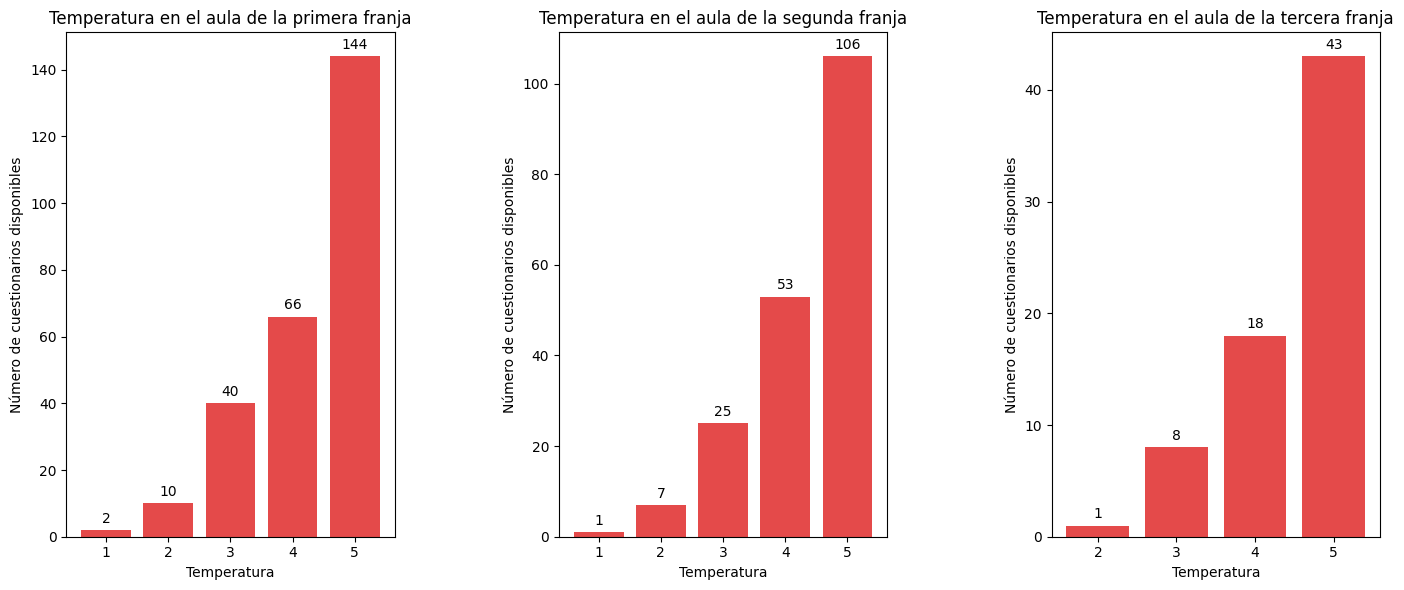

In [ ]:
x = 'Temperatura'
y = 'Número de cuestionarios disponibles'
t = 'Temperatura en el aula'
c = '#e44a4a'
columna = 'Temperatura'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula completamente inadecuado para la tercera franja.


##### Ambiente_cargado

En esta sección, se analiza la variable de ambiente cargado del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un ambiente muy cargado.
  *   26 cuestionarios reflejan un ambiente cargado.
  *   28 cuestionarios reflejan un ambiente normal.
  *   62 cuestionarios reflejan un ambiente poco cargado.
  *   143 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan un ambiente muy cargado.
  *   20 cuestionarios reflejan un ambiente cargado.
  *   38 cuestionarios reflejan un ambiente normal.
  *   48 cuestionarios reflejan un ambiente poco cargado.
  *   82 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan un ambiente cargado.
  *   7 cuestionarios reflejan un ambiente normal.
  *   18 cuestionarios reflejan un ambiente poco cargado.
  *   36 cuestionarios reflejan un ambiente nada cargado.

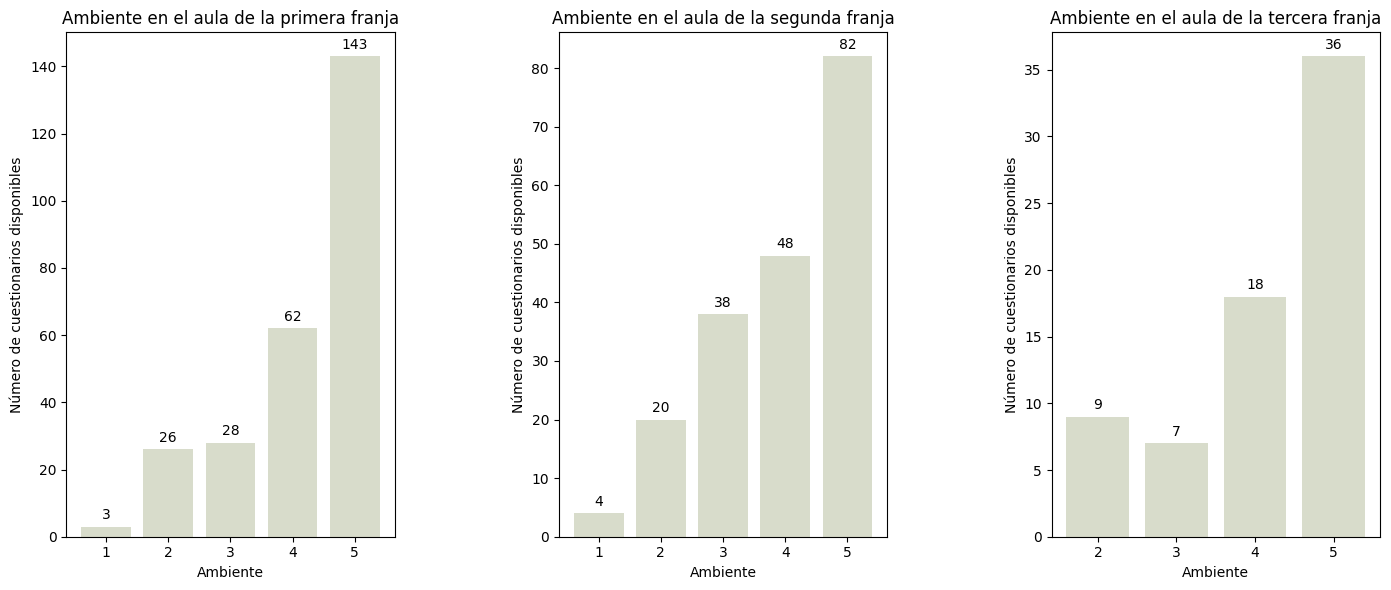

In [ ]:
x = 'Ambiente'
y = 'Número de cuestionarios disponibles'
t = 'Ambiente en el aula'
c = '#d8dccb'
columna = 'Ambiente_cargado'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje un ambiente muy cargado en el aula para la tercera franja.


##### Comodidad_aula

En esta sección, se analiza la variable de comodidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un aula nada cómoda.
  *   5 cuestionarios reflejan un aula poco cómoda.
  *   34 cuestionarios reflejan un aula normal.
  *   76 cuestionarios reflejan un aula cómoda.
  *   146 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un aula poco cómoda.
  *   30 cuestionarios reflejan un aula normal.
  *   61 cuestionarios reflejan un aula cómoda.
  *   98 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un aula poco cómoda.
  *   8 cuestionarios reflejan un aula normal.
  *   21 cuestionarios reflejan un aula cómoda.
  *   40 cuestionarios reflejan un aula totalmente cómoda.

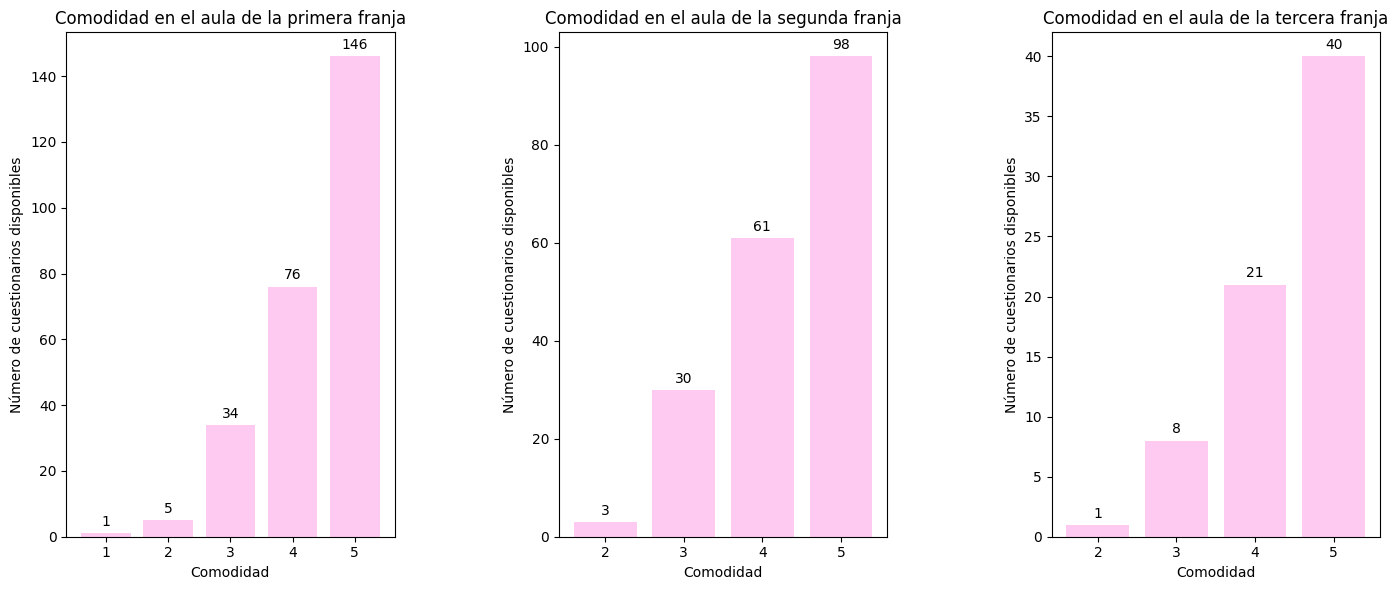

In [ ]:
x = 'Comodidad'
y = 'Número de cuestionarios disponibles'
t = 'Comodidad en el aula'
c = '#ffcaf2'
columna = 'Comodidad_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se dispone de muestras donde se refleje un aula nada cómoda para la segunda y tercera franjas.



##### Docencia

En esta sección, se analiza la variable de docencia del aula, es decir, el grado de aceptación de la afirmación *La docencia impartida en la clase me ha parecido buena*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   54 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   60 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  144 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   38 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   45 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  107 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   10 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   18 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  39 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

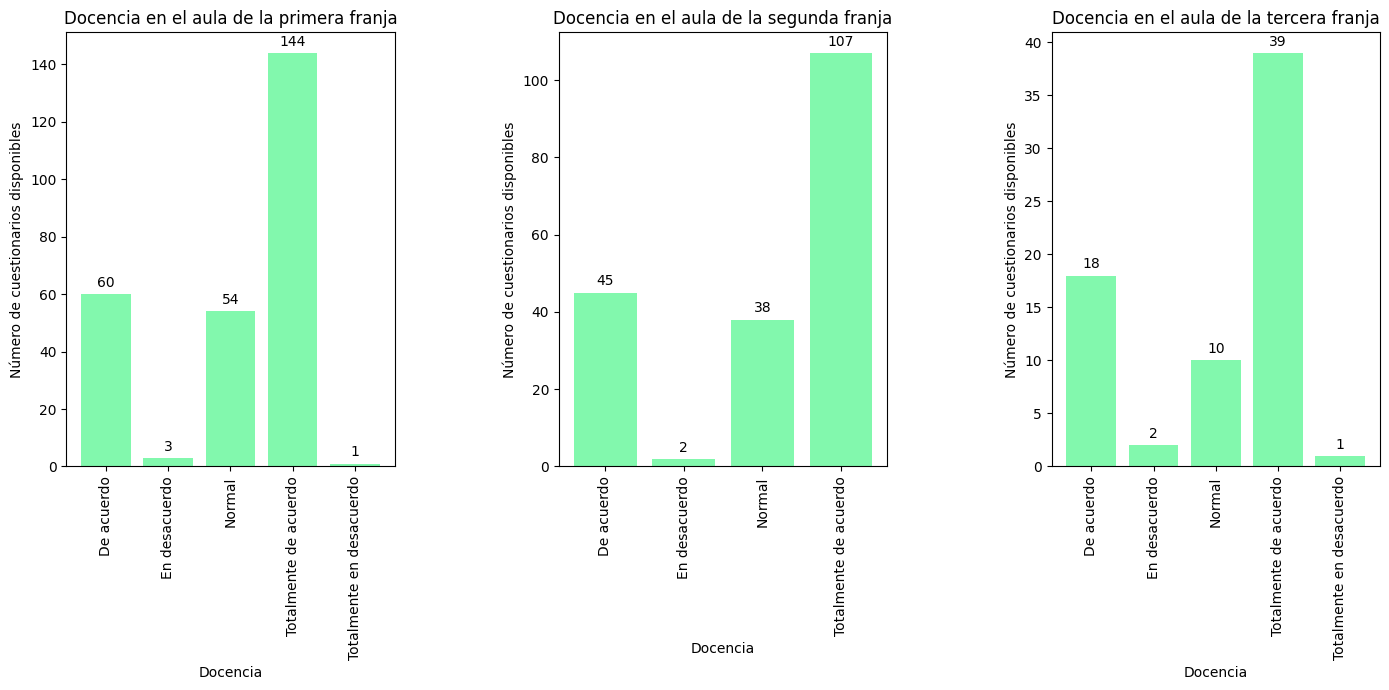

In [ ]:
x = 'Docencia'
y = 'Número de cuestionarios disponibles'
t = 'Docencia en el aula'
c = '#82f8ad'
columna = 'Docencia'
tam = (14, 7)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la segunda franja.

##### E_anímico

En esta sección, se analiza la variable de estado anímico del aula, es decir, el grado de aceptación de la afirmación *Mi estado ANÍMICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *  3 cuestionarios reflejan estar totalmente en desacuerdo con la afirmación.
  *   8 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   38 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  121 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  92 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   8 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   29 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  83 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  72 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   9 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   6 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  18 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  37 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

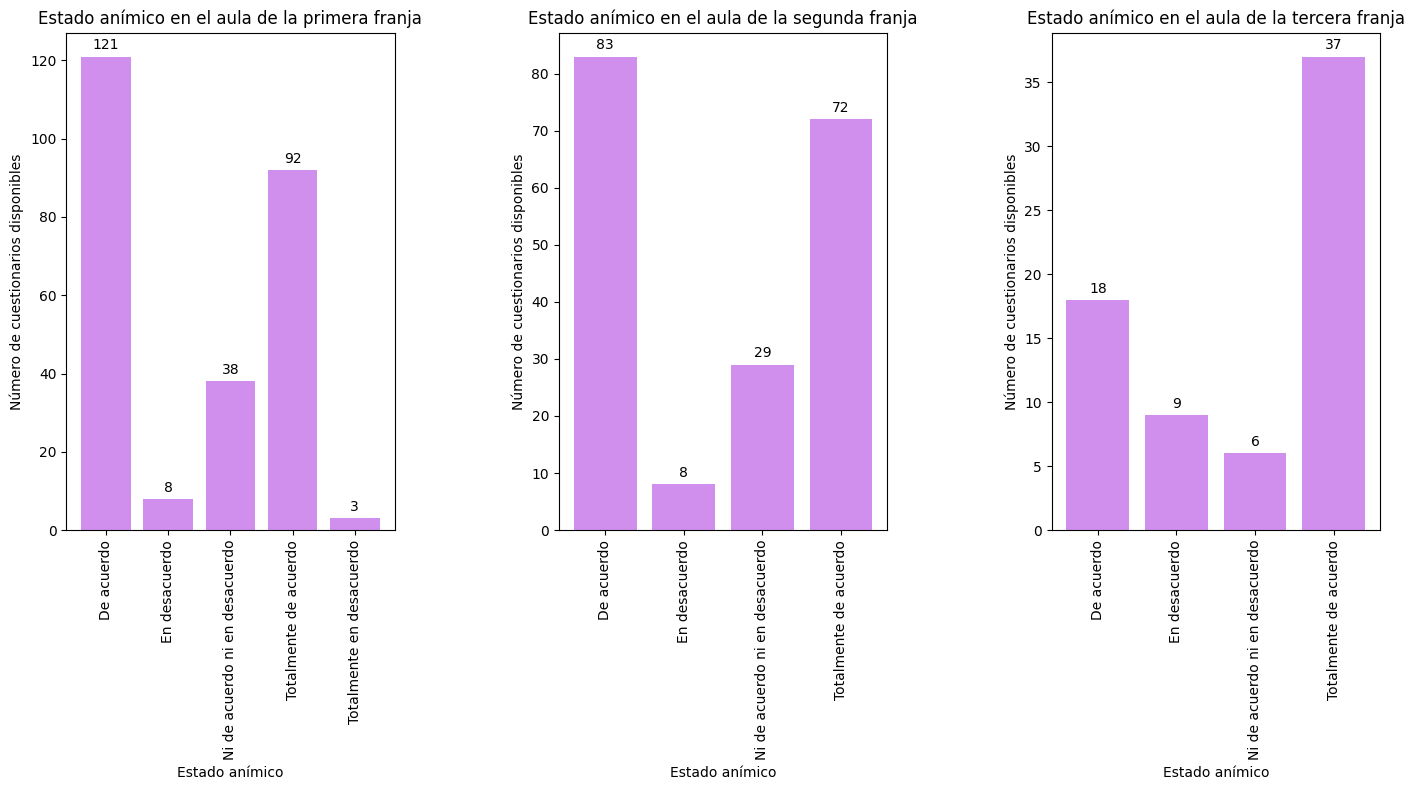

In [ ]:
x = 'Estado anímico'
y = 'Número de cuestionarios disponibles'
t = 'Estado anímico en el aula'
c = '#d18fed'
columna = 'E_anímico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la segunda y tercera franja.



##### E_físico

En esta sección, se analiza la variable de estado físico del aula, es decir, el grado de aceptación de la afirmación *Mi estado FÍSICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 262 cuestionarios con la siguiente distribución:

  *  4 cuestionarios reflejan estar totalmente en desacuerdo con la afirmación.
  *   10 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   34 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  112 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  102 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 192 cuestionarios con la siguiente distribución:

  *   10 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   34 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  73 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  75 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 70 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   8 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  23 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  33 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

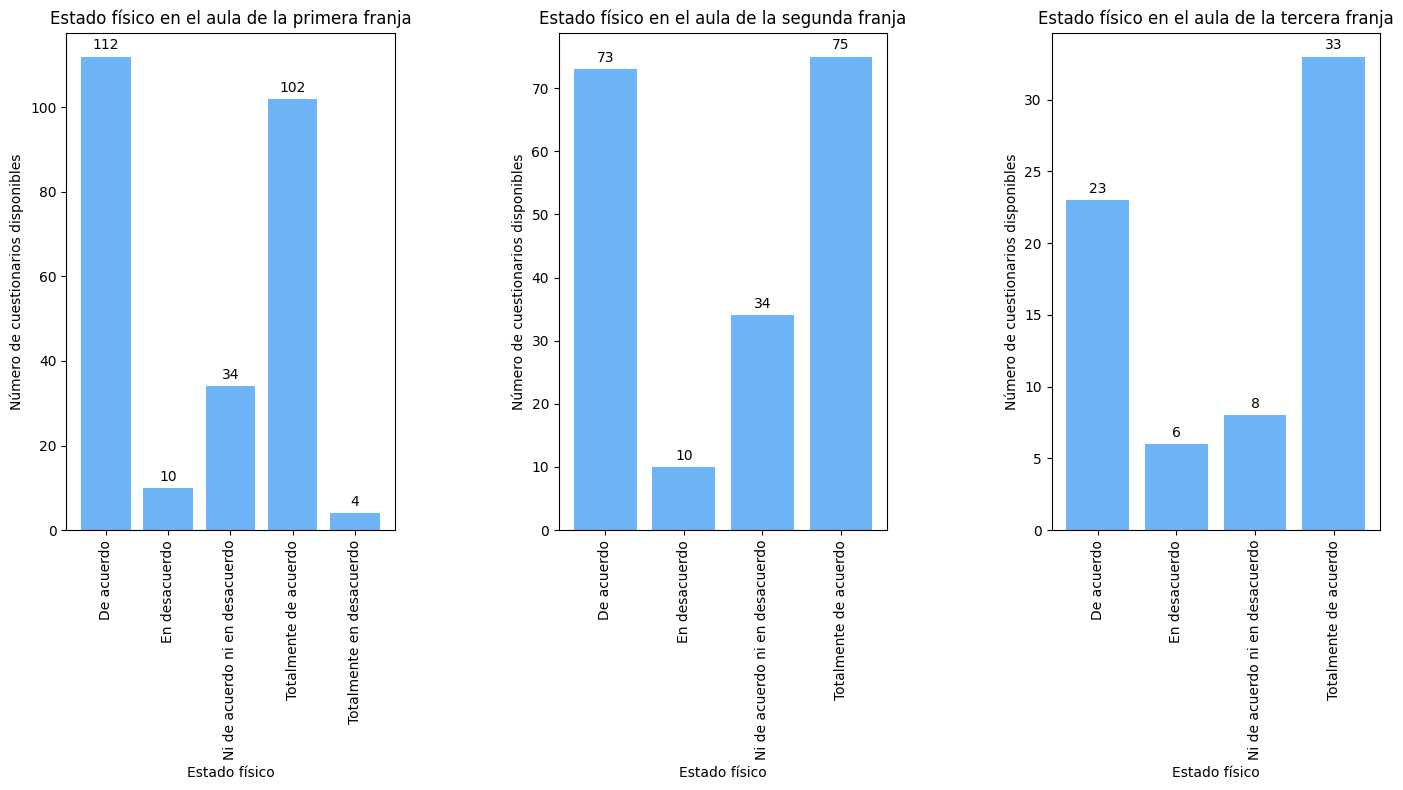

In [ ]:
x = 'Estado físico'
y = 'Número de cuestionarios disponibles'
t = 'Estado físico en el aula'
c = '#6eb5f8'
columna = 'E_físico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para la segunda y tercera franja.



#### Análisis de correlación inicial

En esta sección, se realiza un análisis preliminar de las variables del conjunto de datos de entrada para determinar si, en primera instancia, existe algún tipo de realción entre las mismas.

In [ ]:
columnas_numericas = df_3301M.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()
print(correlation_matrix)

                   Cortinas_abiertas  Luminosidad     Ruido  Temperatura  \
Cortinas_abiertas           1.000000     0.259461  0.120551     0.076404   
Luminosidad                 0.259461     1.000000  0.432398     0.470177   
Ruido                       0.120551     0.432398  1.000000     0.326113   
Temperatura                 0.076404     0.470177  0.326113     1.000000   
Ambiente_cargado           -0.084850     0.356074  0.415487     0.513652   
Ocupación_aula              0.078903     0.268969  0.321293     0.322217   
Comodidad_aula              0.050906     0.522999  0.389678     0.692585   

                   Ambiente_cargado  Ocupación_aula  Comodidad_aula  
Cortinas_abiertas         -0.084850        0.078903        0.050906  
Luminosidad                0.356074        0.268969        0.522999  
Ruido                      0.415487        0.321293        0.389678  
Temperatura                0.513652        0.322217        0.692585  
Ambiente_cargado           1.000000      

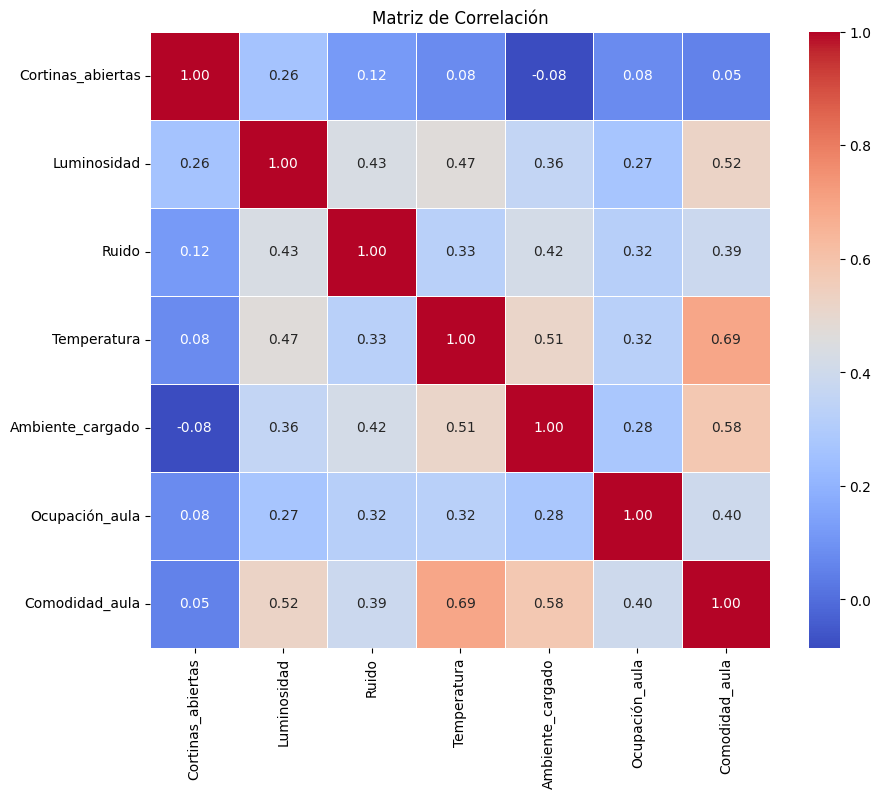

In [ ]:
columnas_numericas = df_3301M.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

Tal y como puede observarse, existen variables con cierto tipo de relación entre sí. Por un lado, la variable de comodidad del aula muestra una correlación positiva de entre 0,52 y 0,69 con las variables de luminosidad del aula, temperatura del aula y densidad del ambiente del aula, lo que significa que si las tres últimas variables mencionadas aumentan, la comodidad del aula tenderá a aumentar de la misma manera.
Por otro lado, la variable de ocupación del aula presenta una correlación negativa de 0,28 con la variable de ambiente cargado y de 0,27 con la variable de luminosidad.

#### Almacenamiento de los datos

Para facilitar el uso posterior de los datos, se almacenan en un fichero csv en Google Drive. Se elimina la columna de Grados_AACC puesto que prácticamente toda la columna se encuentra vacía y por tanto no resulta de interés para futuros experimentos. De la misma manera, puesto que los futuros experimentos se centrarán en el consumo energético y comodidad y bienestar del alumno en el aula, se elimina la columna de calidad docente.

In [ ]:
df_3301M = df_3301M.drop(columns=['Grados_AACC', 'Docencia'])
df_3301M

Date       HIC       HFC Mota  \
0   2023-11-08   9:00:00  11:00:00   M1   
1   2023-11-08  11:00:00  13:00:00   M1   
2   2023-11-08  13:00:00  15:00:00   M1   
3   2023-11-10   9:00:00  11:00:00   M1   
4   2023-11-10  11:00:00  13:00:00   M1   
..         ...       ...       ...  ...   
519 2024-02-08   9:00:00  11:00:00   M1   
520 2024-02-12   9:00:00  11:00:00   M1   
522 2024-02-20   9:00:00  11:00:00   M1   
523 2024-03-07   9:00:00  11:00:00   M1   
524 2024-03-07  11:00:00  13:00:00   M1   

                                        Puesto Luces_apagadas  \
0    en el centro de la 3ª fila de la derecha              No   
1    en el centro de la 3ª fila de la derecha              No   
2    en el centro de la 3ª fila de la derecha              No   
3                3ª fila 3ª silla a la derecha             No   
4                3ª fila 3ª silla a la derecha             No   
..                                         ...            ...   
519  3301-03 (primera fila, pasillo izquierda)             No   
520  3301-03 (primera fila, pasillo izquierda)             No   
522  3301-03 (primera fila, pasillo izquierda)             No   
523  3301-03 (primera fila, pasillo izquierda)             Sí   
524  3301-03 (primera fila, pasillo izquierda)             No   

     Cortinas_abiertas  Luminosidad  Ruido AACC_enc Calefacción_enc  \
0                  5.0            5      5       No              No   
1                  5.0            5      5       No              No   
2                  5.0            5      5       No              No   
3                  5.0            5      1       No              No   
4                  5.0            5      1       No              No   
..                 ...          ...    ...      ...             ...   
519                4.0            5      5       No              Sí   
520                4.0            5      4       No              No   
522                4.0            5      3       No              Sí   
523                2.0            5      5       No              No   
524                2.0            5      5       No              No   

    Ventanas_abiertas  Temperatura  Ambiente_cargado  Ocupación_aula  \
0        Parcialmente            4                 2               2   
1        Parcialmente            4                 2               2   
2        Parcialmente            4                 2               2   
3        Parcialmente            4                 3               2   
4        Parcialmente            4                 3               2   
..                ...          ...               ...             ...   
519      Parcialmente            5                 5               4   
520                No            4                 4               5   
522      Parcialmente            5                 4               4   
523      Parcialmente            5                 5               3   
524      Parcialmente            5                 4               4   

     Comodidad_aula                       E_anímico  \
0                 4           Totalmente de acuerdo   
1                 4           Totalmente de acuerdo   
2                 4           Totalmente de acuerdo   
3                 5                      De acuerdo   
4                 5                      De acuerdo   
..              ...                             ...   
519               5  Ni de acuerdo ni en desacuerdo   
520               4        Totalmente en desacuerdo   
522               5                      De acuerdo   
523               5  Ni de acuerdo ni en desacuerdo   
524               5                      De acuerdo   

                                     Sentimiento_ánimo  \
0                                    Motivado;Contento   
1                                    Motivado;Contento   
2                                    Motivado;Contento   
3                                     Motivado;Cansado   
4                                     Motiv

In [ ]:
df_3301M.columns

Index(['Date', 'HIC', 'HFC', 'Mota', 'Puesto', 'Luces_apagadas',
       'Cortinas_abiertas', 'Luminosidad', 'Ruido', 'AACC_enc',
       'Calefacción_enc', 'Ventanas_abiertas', 'Temperatura',
       'Ambiente_cargado', 'Ocupación_aula', 'Comodidad_aula', 'E_anímico',
       'Sentimiento_ánimo', 'E_físico', 'Sentimiento_físico'],
      dtype='object')

In [ ]:
df_3301M.to_csv('/content/drive/My Drive/TFM/Datos_Finales/3301M.csv', index=False, sep=';')

### Grupo de tarde

#### Carga y preparación de los datos

Comenzamos analizando los datos del aula 3301 del grupo de tarde. Para ello, cargamos los datos almacenados en su correspondiente archivo de Google Drive.

In [ ]:
r_3301T = "/content/drive/My Drive/TFM/Cuestionarios/3301T/3301T_m.csv"

In [ ]:
df_3301T = pd.read_csv(r_3301T, sep=';', encoding='utf-8')
df_3301T.head(1)

Marca temporal       Apellidos, Nombre:  Aula:      Fecha:  \
0  2023/11/06 8:15:12 p. m. EET  Bescós Aznar Guillermo    3301  06/11/2023   

  Hora Inicio Clase Hora Fin Clase Mota  \
0          19:00:00       21:00:00   M1   

            Puesto del aula en el que estás sentado:  \
0  Quinta fila, lado izquierdo, segundo asiento d...   

  ¿Están las luces  apagadas?  ¿Están las cortinas abiertas?  ...  \
0                          No                              3  ...   

   ¿Están las ventanas abiertas?  \
0                             No   

   La temperatura del aula durante la clase ha sido  \
0                                                 4   

  ¿Se ha notado un ambiente cargado?  \
0                                  2   

  En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  2         

  En general, durante la clase, el aula me ha parecido...  \
0                                                  4        

  La docencia impartida en la clase me ha parecido buena:  \
0                              Totalmente de acuerdo        

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

   Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                     Normal;Cansado                                                    

   Mi estado FÍSICO durante la clase ha sido bueno  \
0                                       De acuerdo   

   Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0  Agotado/a;Enfermo/a;Con dolor de cuello;Con do...                                                 

[1 rows x 25 columns]

Una vez cargados los datos, en primer lugar, se eliminan las columnas que no son de interés para el análisis en cuestión. Además, mediante el borrado de la columna que contiene el nombre y los apellidos del alumno que rellena el cuestionario y la columna del aula a la que pertenece, se consigue la anonimización completa de los datos.

In [ ]:
df_3301T = df_3301T.drop(columns=['Marca temporal', 'Apellidos, Nombre:', 'Aula:'])
df_3301T.head(1)

Fecha: Hora Inicio Clase Hora Fin Clase Mota  \
0  06/11/2023          19:00:00       21:00:00   M1   

            Puesto del aula en el que estás sentado:  \
0  Quinta fila, lado izquierdo, segundo asiento d...   

  ¿Están las luces  apagadas?  ¿Están las cortinas abiertas?  \
0                          No                              3   

   La luminosidad durante la clase ha sido  Nivel de ruido durante la clase  \
0                                        5                                5   

  ¿Está el aire acondicionado encendido?  ... ¿Están las ventanas abiertas?  \
0                                     No  ...                            No   

  La temperatura del aula durante la clase ha sido  \
0                                                4   

  ¿Se ha notado un ambiente cargado?  \
0                                  2   

   En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  2          

   En general, durante la clase, el aula me ha parecido...  \
0                                                  4         

   La docencia impartida en la clase me ha parecido buena:  \
0                              Totalmente de acuerdo         

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

  Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                     Normal;Cansado                                                   

  Mi estado FÍSICO durante la clase ha sido bueno  \
0                                      De acuerdo   

  Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0  Agotado/a;Enfermo/a;Con dolor de cuello;Con do...                                                

[1 rows x 22 columns]

In [ ]:
df_3301T.columns

Index(['Fecha:', 'Hora Inicio Clase', 'Hora Fin Clase', 'Mota',
       'Puesto del aula en el que estás sentado:',
       '¿Están las luces  apagadas?', '¿Están las cortinas abiertas?',
       'La luminosidad durante la clase ha sido',
       'Nivel de ruido durante la clase',
       '¿Está el aire acondicionado encendido?',
       'En caso afirmativo,  indica los grados si los puedes identificar:',
       '¿Está la calefacción encendida?', '¿Están las ventanas abiertas?',
       'La temperatura del aula durante la clase ha sido',
       '¿Se ha notado un ambiente cargado?',
       'En cuanto a ocupación del aula, dirías que el aula está:',
       'En general, durante la clase, el aula me ha parecido...',
       'La docencia impartida en la clase me ha parecido buena:',
       'Mi estado ANÍMICO durante la clase ha sido bueno',
       'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas',
       'Mi estado FÍSICO durante la clase ha sido b

Como puede observarse, como nombres de las columnas del DataFrame se mantienen las preguntas del cuestionario. Para facilitar el acceso y manejo de dichas columnas, se ha decidido renombrarlas con nombres más cortos que permitan de igual modo su correcta y completa identificación.

In [ ]:
nuevos_nombres = {'Fecha:': 'Date',
                  'Hora Inicio Clase': 'HIC',
                  'Hora Fin Clase': 'HFC',
                  'Puesto del aula en el que estás sentado:': 'Puesto',
                  '¿Están las luces  apagadas?': 'Luces_apagadas',
                  '¿Están las cortinas abiertas?': 'Cortinas_abiertas',
                  'La luminosidad durante la clase ha sido': 'Luminosidad',
                  'Nivel de ruido durante la clase': 'Ruido',
                  '¿Está el aire acondicionado encendido?': 'AACC_enc',
                  'En caso afirmativo,  indica los grados si los puedes identificar:': 'Grados_AACC',
                  '¿Está la calefacción encendida?': 'Calefacción_enc',
                  '¿Están las ventanas abiertas?': 'Ventanas_abiertas',
                  'La temperatura del aula durante la clase ha sido': 'Temperatura',
                  '¿Se ha notado un ambiente cargado?': 'Ambiente_cargado',
                  'En cuanto a ocupación del aula, dirías que el aula está:': 'Ocupación_aula',
                  'En general, durante la clase, el aula me ha parecido...': 'Comodidad_aula',
                  'La docencia impartida en la clase me ha parecido buena:': 'Docencia',
                  'Mi estado ANÍMICO durante la clase ha sido bueno': 'E_anímico',
                  'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_ánimo',
                  'Mi estado FÍSICO durante la clase ha sido bueno': 'E_físico',
                  'Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_físico'
                  }

df_3301T = df_3301T.rename(columns=nuevos_nombres)
df_3301T.head(1)

Date       HIC       HFC Mota  \
0  06/11/2023  19:00:00  21:00:00   M1   

                                              Puesto Luces_apagadas  \
0  Quinta fila, lado izquierdo, segundo asiento d...             No   

   Cortinas_abiertas  Luminosidad  Ruido AACC_enc  ... Ventanas_abiertas  \
0                  3            5      5       No  ...                No   

  Temperatura Ambiente_cargado  Ocupación_aula  Comodidad_aula  \
0           4                2               2               4   

                Docencia   E_anímico Sentimiento_ánimo    E_físico  \
0  Totalmente de acuerdo  De acuerdo    Normal;Cansado  De acuerdo   

                                  Sentimiento_físico  
0  Agotado/a;Enfermo/a;Con dolor de cuello;Con do...  

[1 rows x 22 columns]

In [ ]:
df_3301T.columns

Index(['Date', 'HIC', 'HFC', 'Mota', 'Puesto', 'Luces_apagadas',
       'Cortinas_abiertas', 'Luminosidad', 'Ruido', 'AACC_enc', 'Grados_AACC',
       'Calefacción_enc', 'Ventanas_abiertas', 'Temperatura',
       'Ambiente_cargado', 'Ocupación_aula', 'Comodidad_aula', 'Docencia',
       'E_anímico', 'Sentimiento_ánimo', 'E_físico', 'Sentimiento_físico'],
      dtype='object')

In [ ]:
print(f'El DataFrame está formado por {df_3301T.shape[0]} filas y {df_3301T.shape[1]} columnas')

El DataFrame está formado por 96 filas y 22 columnas


#### Análisis de los datos

Una vez finalizada la preparación de los datos, es posible comenzar con su análisis en profundidad mediante el análisis gráfico de cada una de sus variables.



##### Date

En esta sección se analiza la variable de fecha del cuestionario. Tal y como puede observarse, disponemos de cuestionarios para 33 días. Sin embargo, es necesario eliminar los cuestionarios de abril puesto que no son de interés en relación con el uso que se pretende dar a estos datos.

In [ ]:
df_3301T['Date'].unique()

array(['06/11/2023', '07/11/2023', '08/11/2023', '13/11/2023',
       '14/11/2023', '15/11/2023', '20/11/2023', '21/11/2023',
       '22/11/2023', '23/11/2023', '27/11/2023', '28/11/2023',
       '29/11/2023', '30/11/2023', '04/12/2023', '05/12/2023',
       '11/12/2023', '12/12/2023', '19/12/2023', '21/12/2023',
       '11/03/2024', '12/03/2024', '13/03/2024', '19/03/2024',
       '20/03/2024', '21/03/2024', '02/04/2024', '03/04/2024',
       '08/04/2024', '09/04/2024', '10/04/2024', '16/04/2024',
       '17/04/2024'], dtype=object)

In [ ]:
len(df_3301T['Date'].unique())

33

In [ ]:
df_3301T = df_3301T[df_3301T.apply(lambda fila: fila.Date.split('/')[1] != '04', axis=1)]
len(df_3301T['Date'].unique())

26

Finalmente, se concluye que disponemos de cuestionarios para 26 días.

In [ ]:
df_3301T['Date'] = pd.to_datetime(df_3301T['Date'], format='%d/%m/%Y')

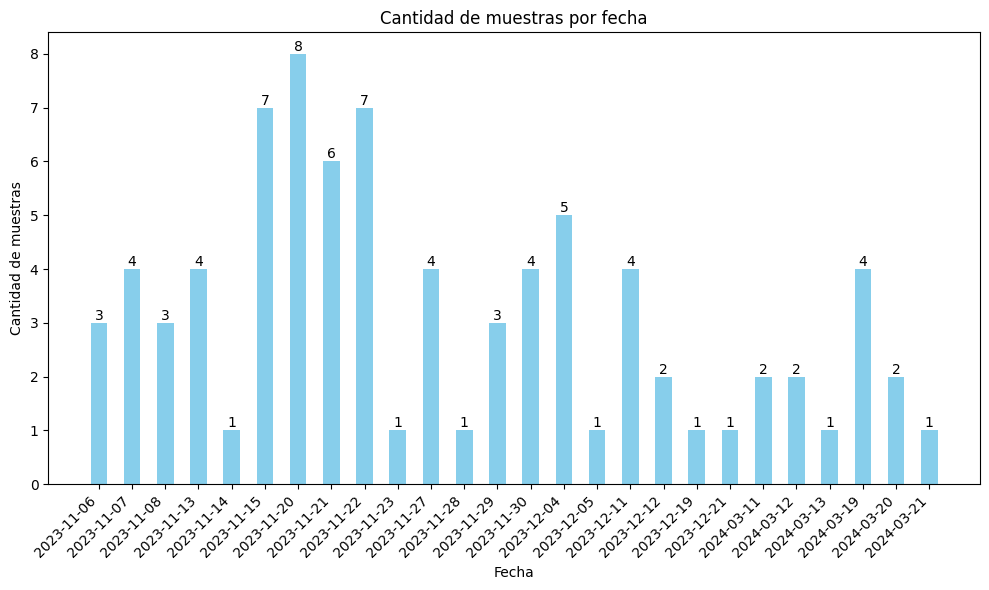

In [ ]:
muestras_por_fecha = df_3301T['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(muestras_por_fecha.index.astype(str), muestras_por_fecha.values, color='skyblue', width=0.5, align='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por fecha')

plt.tight_layout()
plt.show()

Tal y como se puede observar, no se dispone de ningún cuestionario para los meses de enero y febrero.

##### HIC y HFC

En esta sección se analiza la variable de hora de comienzo y de fin de las clases. Para los datos de este grupo en concreto, la jornada lectiva comienza a las 15:00:00 y finaliza a las 21:00:00. Teniendo esto en cuenta, es posible analizar cuantas muestras o cuestionarios hay disponibles para cada una de las franjas de dos horas que es posible definir: 15:00:00-17:00:00, 17:00:00-19:00:00 y 19:00:00-21:00:00.

In [ ]:
hic = type(df_3301T['HIC'][1])
hfc = type(df_3301T['HFC'][1])

print(f"La columna HIC es de tipo {hic}")
print(f"La columna HIC es de tipo {hfc}")

La columna HIC es de tipo <class 'str'>
La columna HIC es de tipo <class 'str'>


In [ ]:
df_3301T_f1, df_3301T_f2, df_3301T_f3 = get_franjas(df_3301T, False)


Se diponen de 82 cuestionarios en total de los que:
 
11 cuestionarios pertenecen a la franja de 15:00:00 a 17:00:00

48 cuestionarios pertenecen a la franja de 17:00:00 a 19:00:00

23 cuestionarios pertenecen a la franja de 19:00:00 a 21:00:00



Puesto que el resto de variables se analizarán de manera independiente para cada una de las tres franjas horarias definidas. Para facilitar dicho análisis y el acceso a los datos, los tres DataFrames generados se almacenan en un diccionario.

In [ ]:
data_frames_franjas = {'df1': df_3301T_f1,
                      'df2': df_3301T_f2,
                      'df3': df_3301T_f3}

##### Ocupación_aula

En esta sección, se analiza la variable de grado de ocupación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 3 cuestionarios reflejan un grado de ocupación de 2.
  * 7 cuestionarios reflejan un grado de ocupación de 3.
  * 1 cuestionario refleja un grado de ocupación de 4.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un grado de ocupación de 1.
  *   7 cuestionarios reflejan un grado de ocupación de 2.
  *   30 cuestionarios reflejan un grado de ocupación de 3.
  *   10 cuestionarios reflejan un grado de ocupación de 4.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un grado de ocupación de 1.
  *   13 cuestionarios reflejan un grado de ocupación de 2.
  *   8 cuestionarios reflejan un grado de ocupación de 3.
  *   1 cuestionario refleja un grado de ocupación de 4.

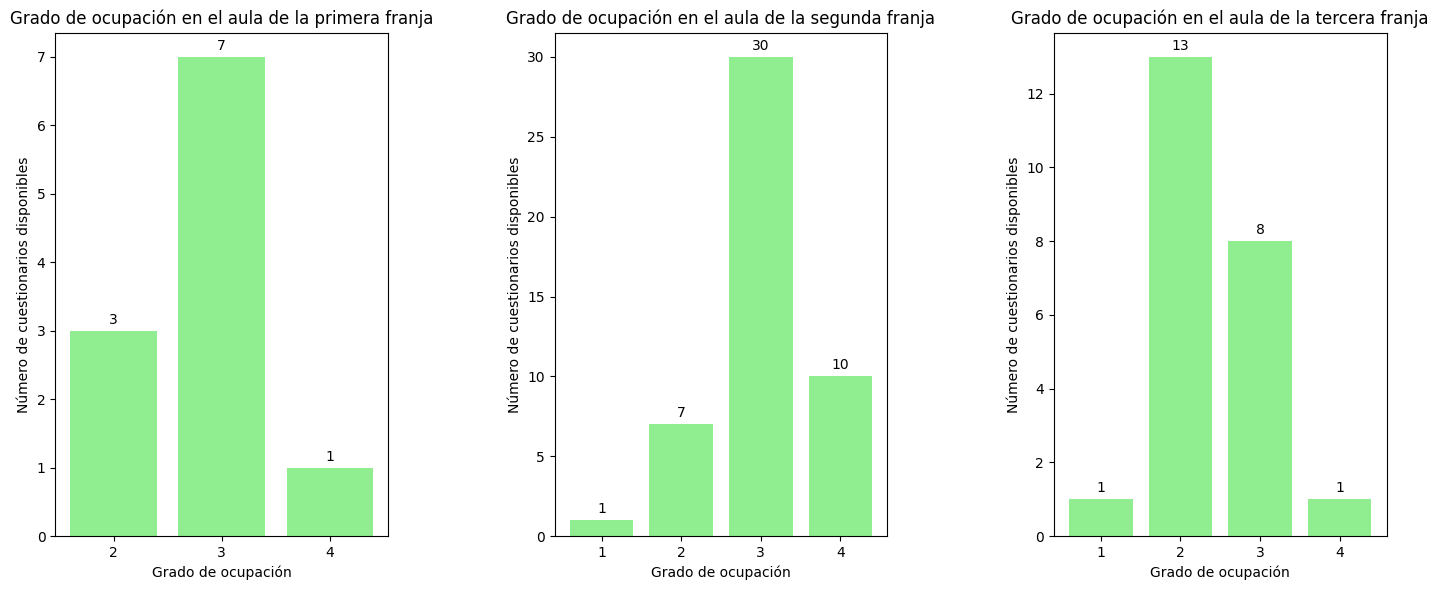

In [ ]:
x = 'Grado de ocupación'
y = 'Número de cuestionarios disponibles'
t = 'Grado de ocupación en el aula'
c = 'lightgreen'
columna = 'Ocupación_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna )

No se dispone de muestras donde se refleje un grado de ocupación 5 para ninguna de las tres franjas.

No se dispone de muestras donde se refleje un grado de ocupación 1 para la primera franja.


##### Luces_apagadas

En esta sección, se analiza la variable de iluminación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios. Todos ellos reflejan que las luces estaban encendidas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  * 39 reflejan que las luces estaban encendidas en el aula.
  * 9 reflejan que las luces estaban apagadas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios. Todos ellos reflejan que las luces estaban encendidas en el aula.

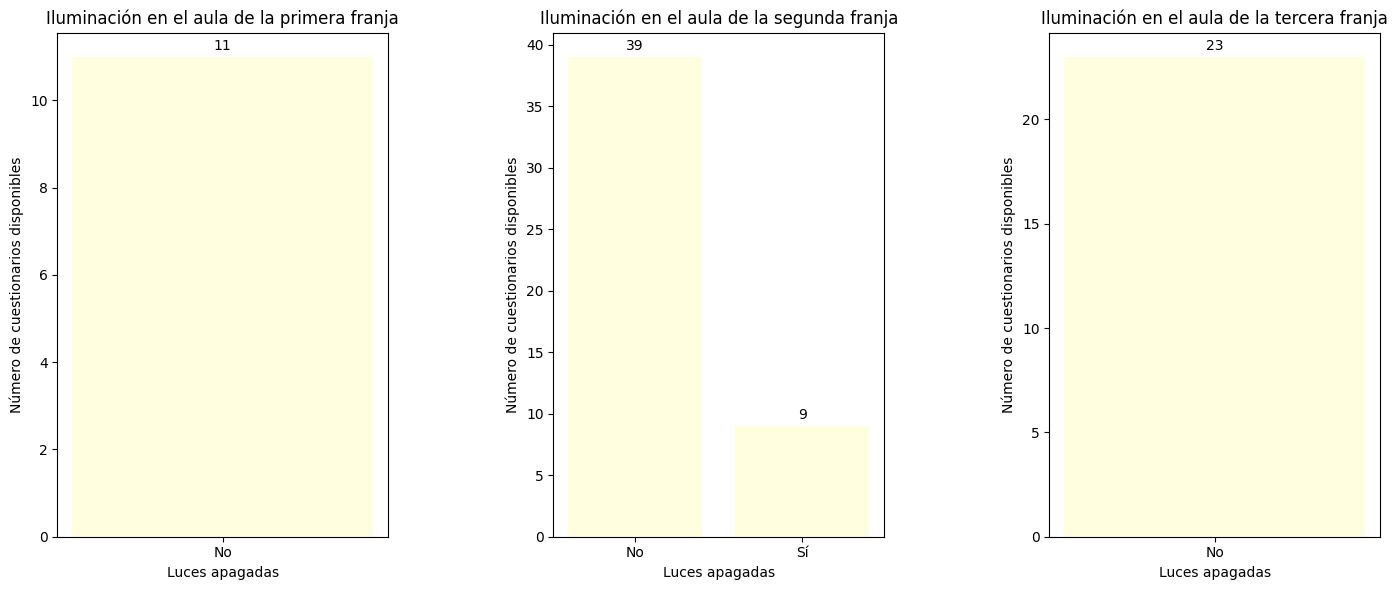

In [ ]:
x = 'Luces apagadas'
y = 'Número de cuestionarios disponibles'
t = 'Iluminación en el aula'
c = 'lightyellow'
columna = 'Luces_apagadas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se dispone de muestras donde se reflejen las luces apagadas en la primera y tercera franja.

##### Cortinas_abiertas

En esta sección, se analiza la variable de apertura de cortinas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 1 refleja más cortinas cerradas que abiertas en el aula.
  * 5 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 5 reflejan más cortinas abiertas que cerradas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  * 5 reflejan más cortinas cerradas que abiertas en el aula.
  * 29 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 13 reflejan más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  * 1 refleja más cortinas cerradas que abiertas en el aula.
  * 18 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 3 refleja más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

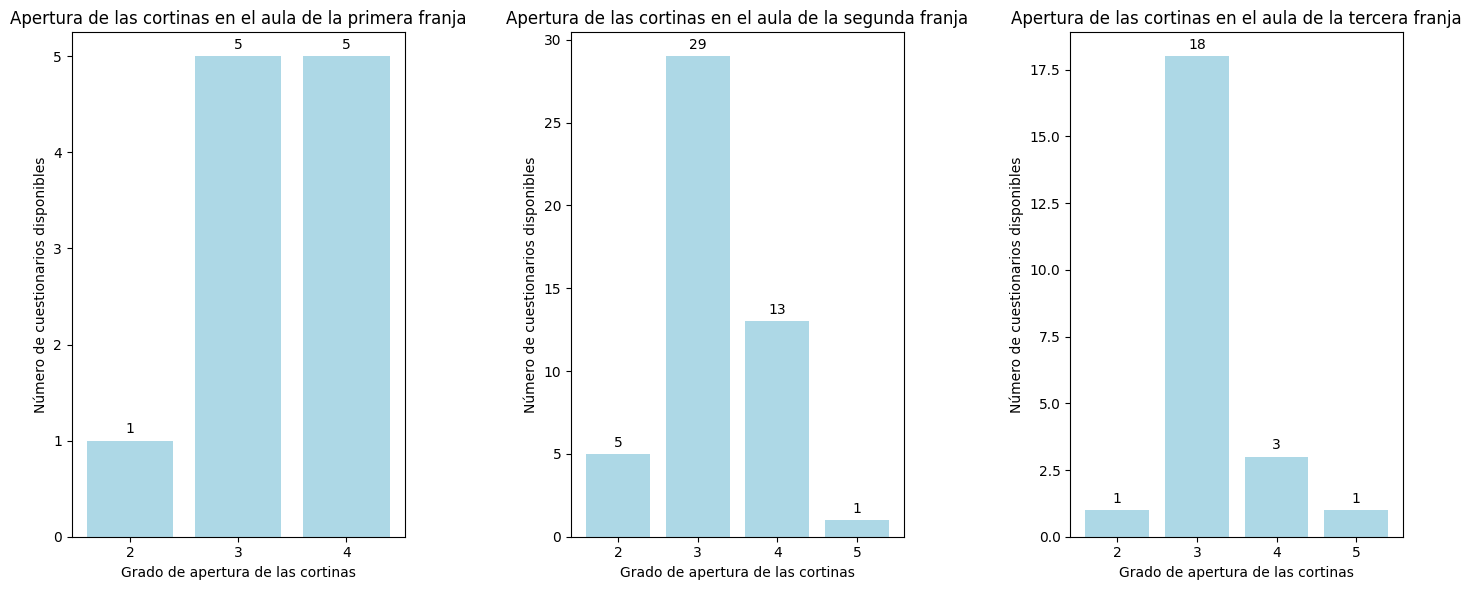

In [ ]:
x = 'Grado de apertura de las cortinas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las cortinas en el aula'
c = 'lightblue'
columna = 'Cortinas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se dispone de muestras donde se reflejen todas las cortinas cerradas para ninguna de las tres franjas.

No se dispone de muestras donde se reflejen todas las cortinas abiertas para la primera franja.

##### Luminosidad

En esta sección, se analiza la variable de luminosidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 1 refleja una luminosidad adecuada en el aula.
  * 10 reflejan una luminosidad completamente adecuada en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan una luminosidad totalmente inadecuada.
  *   3 cuestionarios reflejan una luminosidad inadecuada.
  *   6 cuestionarios reflejan una luminosidad normal.
  *   7 cuestionarios reflejan una luminosidad adecuada.
  *   28 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una luminosidad normal.
  *   2 cuestionarios reflejan una luminosidad adecuada.
  *   20 cuestionarios reflejan una luminosidad totalmente adecuada.


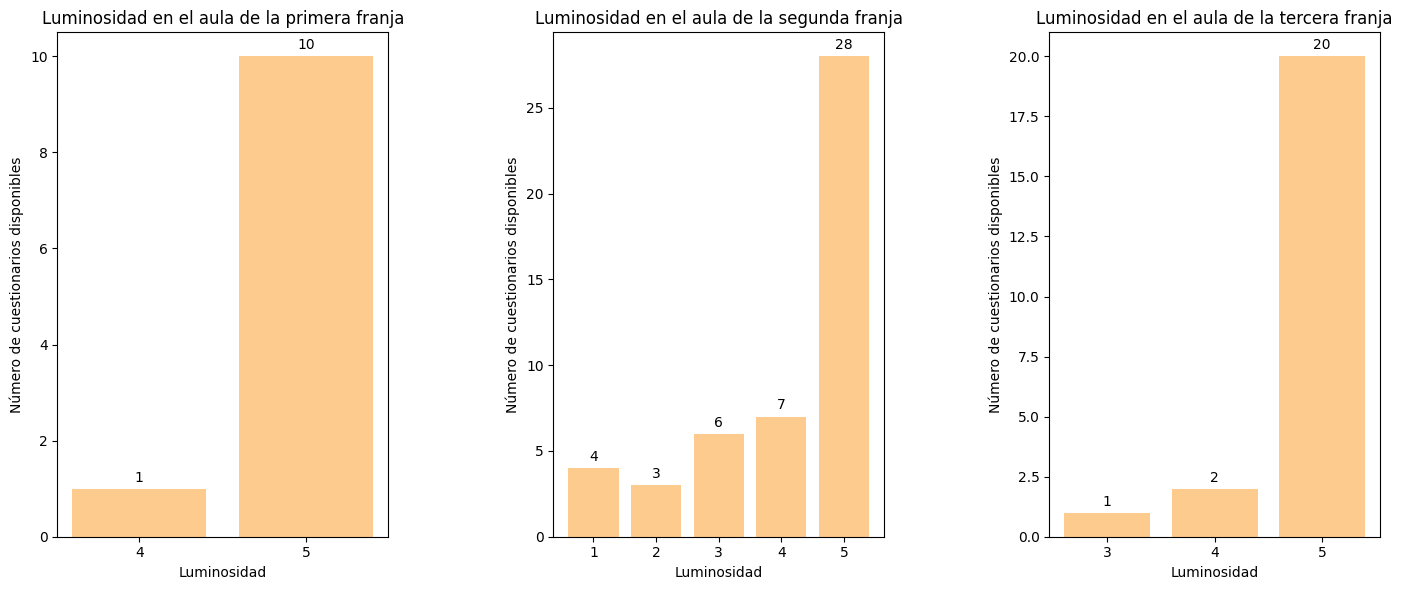

In [ ]:
x = 'Luminosidad'
y = 'Número de cuestionarios disponibles'
t = 'Luminosidad en el aula'
c = '#fdcb8e'
columna = 'Luminosidad'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje una luminosidad inadecuada o completamente inadecuada para la primera y tercera franja.

No se disponen de muestras donde se refleje una luminosidad normal para la primera franja.

##### Ruido

En esta sección, se analiza la variable de ruido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 4 reflejan un nivel de ruido adecuado en el aula.
  * 7 reflejan un nivel de ruido totalmente adecuado en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   5 cuestionarios reflejan un nivel de ruido inadecuado.
  *   4 cuestionarios reflejan un nivel de ruido normal.
  *   17 cuestionarios reflejan un nivel de ruido adecuado.
  *   22 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan un nivel de ruido inadecuado.
  *   2 cuestionarios reflejan un nivel de ruido normal.
  *   6 cuestionarios reflejan un nivel de ruido adecuado.
  *   13 cuestionarios reflejan un nivel de ruido totalmente adecuado.

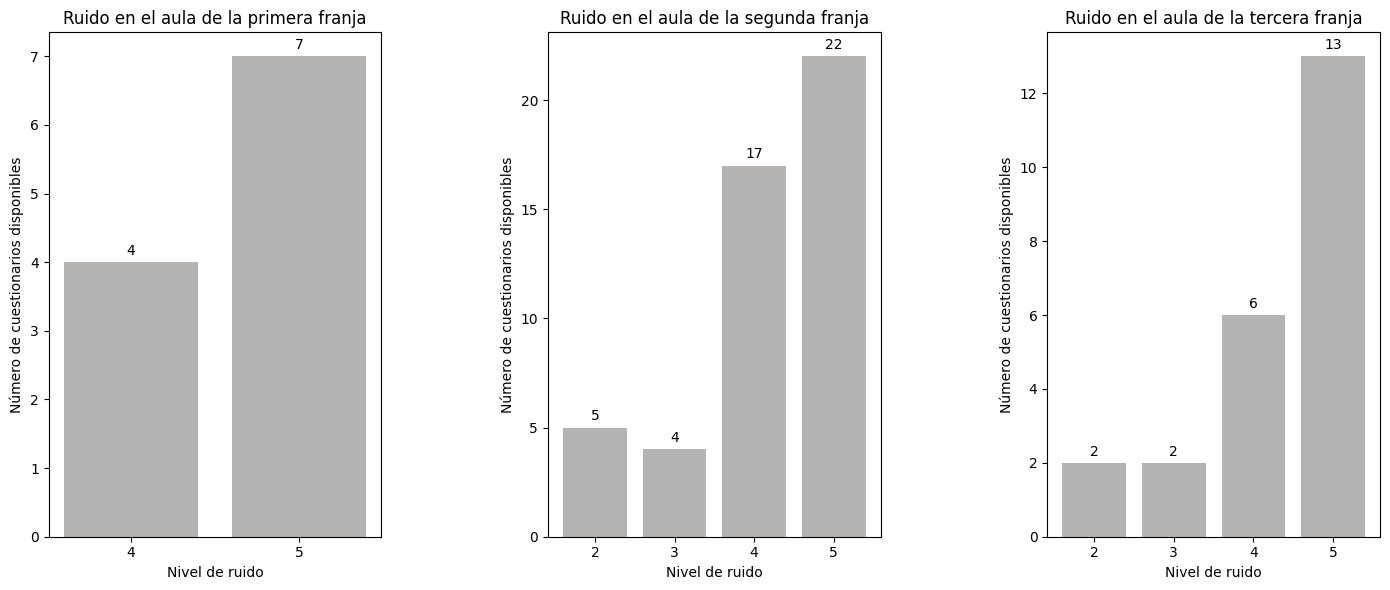

In [ ]:
x = 'Nivel de ruido'
y = 'Número de cuestionarios disponibles'
t = 'Ruido en el aula'
c = '#b5b4b3'
columna = 'Ruido'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)


No se disponen de muestras donde se refleje un ruido en el aula completamente inadecuado para ninguna de las tres franjas.

No se disponen de muestras donde se refleje un ruido en el aula normal o inadecuado para la primera franja.




##### AACC_enc

En esta sección, se analiza la variable de aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

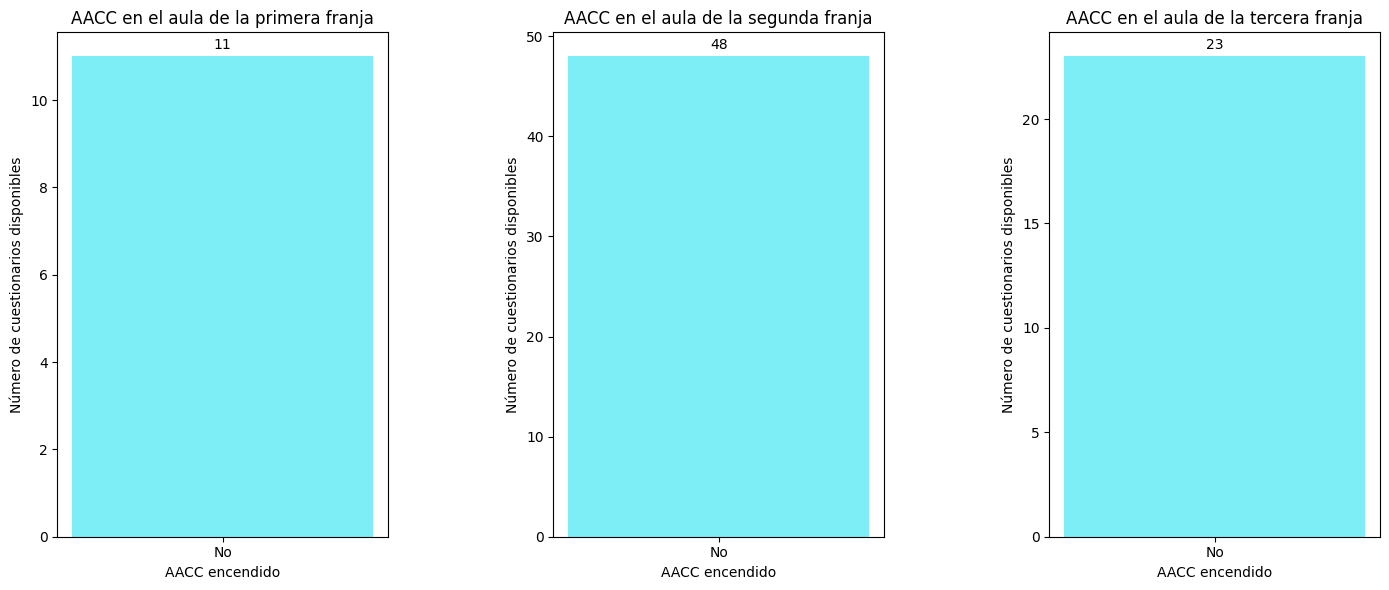

In [ ]:
x = 'AACC encendido'
y = 'Número de cuestionarios disponibles'
t = 'AACC en el aula'
c = '#7deef6'
columna = 'AACC_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se disponen de muestras donde se refleje el aire acondicionado del aula encendido para ninguna de las franjas.

##### Grados_AACC

En esta sección, se analiza la variable de grados del aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la primera y la tercera franja, no se disponen de datos, algo lógico teniendo en cuenta que esta pregunta estaba condicionada a la respuesta afirmativa de la pregunta anterior (variable AACC_enc) y, como ya se ha analizado en la subsección previa, todos los cuestionarios reflejan que el aire acondicionado estaba apagado.

* Para la segunda franja, pese a que se disponen de algunos datos de los grados de encendido del aire acondicionado, es posible que se traten de valores erróneos puesto que no va en corcondancia con todas las respuestas negativas obtenidas a la pregunta de aire acondicionado encendido analizadas en la subsección anterior.

In [ ]:
df_3301T_f1['Grados_AACC'].unique()

array([nan], dtype=object)

In [ ]:
df_3301T_f2['Grados_AACC'].unique()

array([nan, '20ºC', '15ºC'], dtype=object)

In [ ]:
df_3301T_f3['Grados_AACC'].unique()

array([nan], dtype=object)

##### Calefacción_enc

En esta sección, se analiza la variable de calefacción encendida del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 8 reflejan la calefacción apagada en el aula.
  * 3 reflejan la calefacción encendida en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  * 24 reflejan la calefacción apagada en el aula.
  * 24 reflejan la calefacción encendida en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  * 13 reflejan la calefacción apagada en el aula.
  * 10 reflejan la calefacción encendida en el aula.

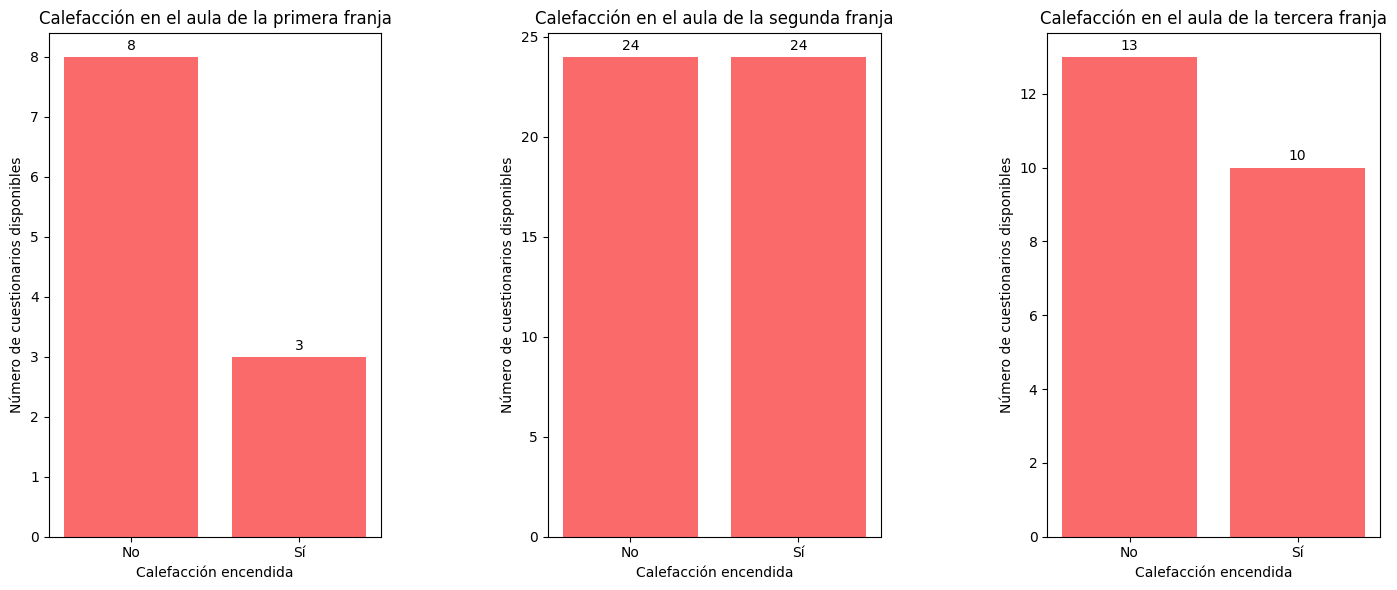

In [ ]:
x = 'Calefacción encendida'
y = 'Número de cuestionarios disponibles'
t = 'Calefacción en el aula'
c = '#fb6a6a'
columna = 'Calefacción_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de información para todas las posibles respuestas a esta pregunta.

##### Ventanas_abiertas

En esta sección, se analiza la variable de ventanas abiertas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 5 reflejan las ventanas cerradas en el aula.
  * 6 reflejan las ventanas parcialmente abiertas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  * 26 reflejan las ventanas cerradas en el aula.
  * 21 reflejan las ventanas parcialmente abiertas en el aula.
  * 1 refleja las ventanas abiertas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  * 15 reflejan las ventanas cerradas en el aula.
  * 8 reflejan las ventanas parcialmente abiertas en el aula.

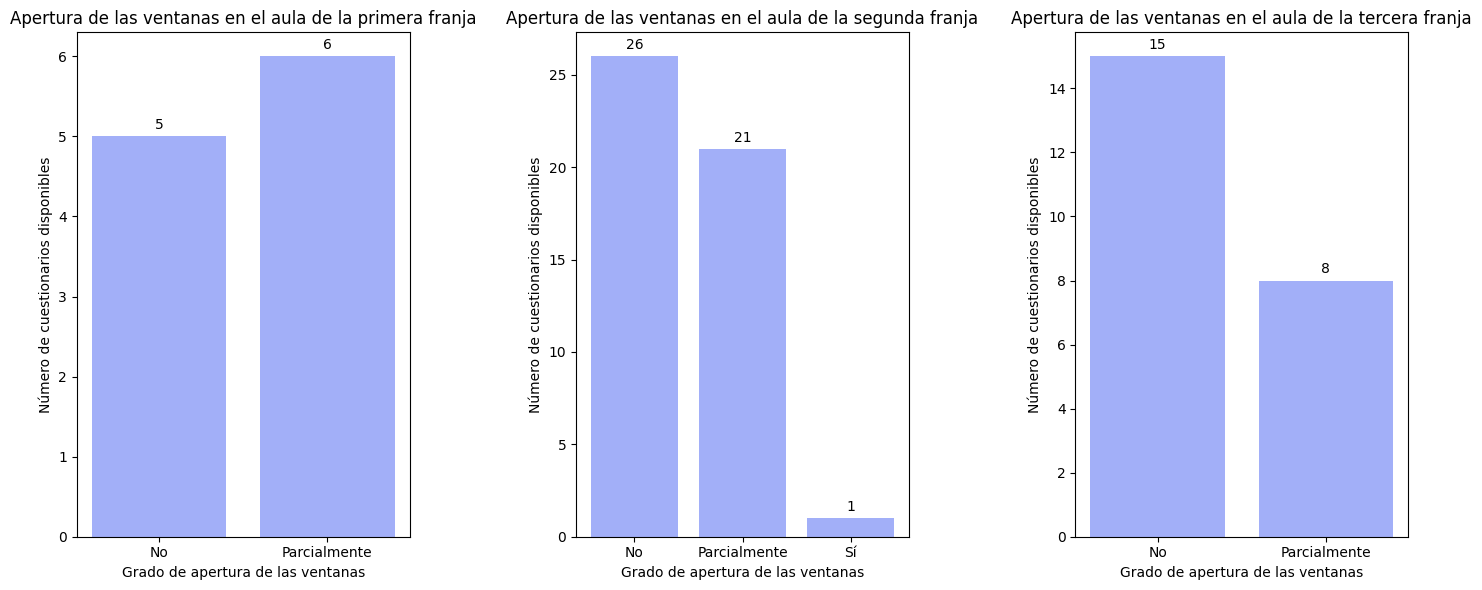

In [ ]:
x = 'Grado de apertura de las ventanas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las ventanas en el aula'
c = '#a2aff8'
columna = 'Ventanas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se dispone de muestras donde se reflejen las ventanas completamente abiertas en el aula para la primera y tercera franjas.

##### Temperatura

En esta sección, se analiza la variable de temperatura del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  * 6 reflejan una temperatura adecuada en el aula.
  * 5 reflejan una temperatura totalmente adecuada en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan una temperatura inadecuada.
  *   5 cuestionarios reflejan una temperatura normal.
  *   20 cuestionarios reflejan una temperatura adecuada.
  *   17 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan una temperatura normal.
  *   13 cuestionarios reflejan una temperatura adecuada.
  *   8 cuestionarios reflejan una temperatura totalmente adecuada.

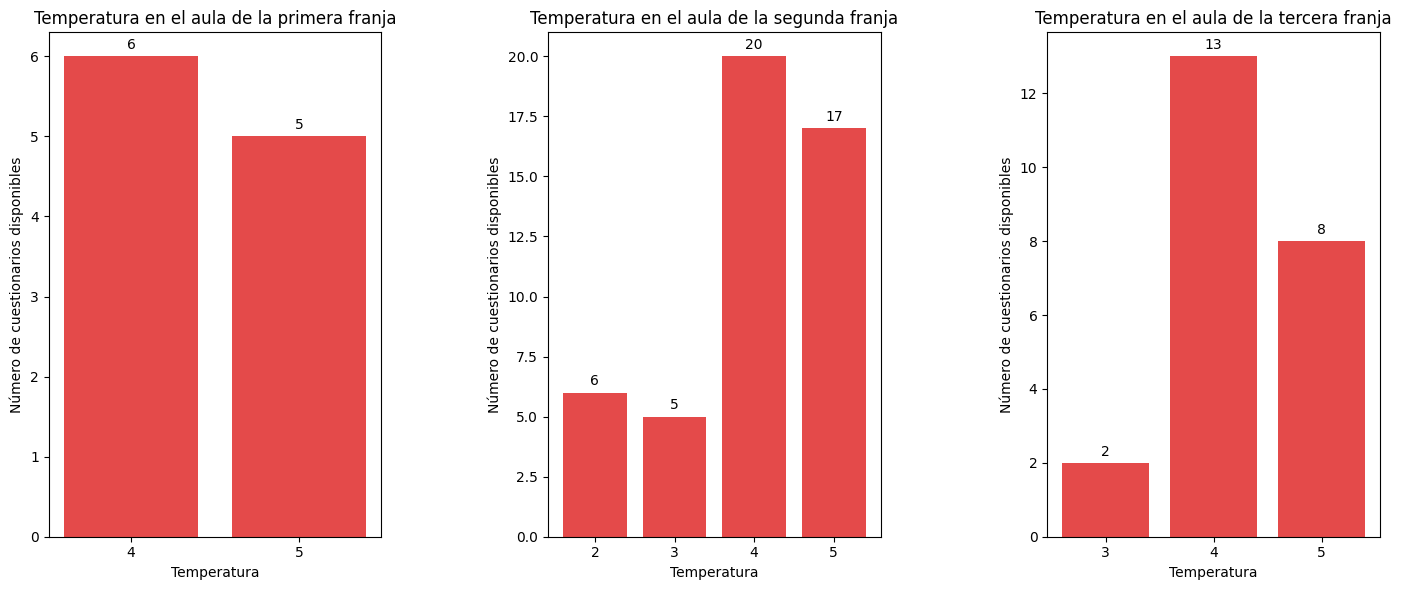

In [ ]:
x = 'Temperatura'
y = 'Número de cuestionarios disponibles'
t = 'Temperatura en el aula'
c = '#e44a4a'
columna = 'Temperatura'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula completamente inadecuado para ninguna de las tres franjas.

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula inadecuado para la primera y tercera franja.

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula normal para la primera franja.


##### Ambiente_cargado

En esta sección, se analiza la variable de ambiente cargado del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  *   5 cuestionarios reflejan un ambiente poco cargado.
  *   6 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un ambiente muy cargado.
  *   9 cuestionarios reflejan un ambiente cargado.
  *   8 cuestionarios reflejan un ambiente normal.
  *   18 cuestionarios reflejan un ambiente poco cargado.
  *   10 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un ambiente muy cargado.
  *   4 cuestionarios reflejan un ambiente cargado.
  *   2 cuestionarios reflejan un ambiente normal.
  *   9 cuestionarios reflejan un ambiente poco cargado.
  *   7 cuestionarios reflejan un ambiente nada cargado.

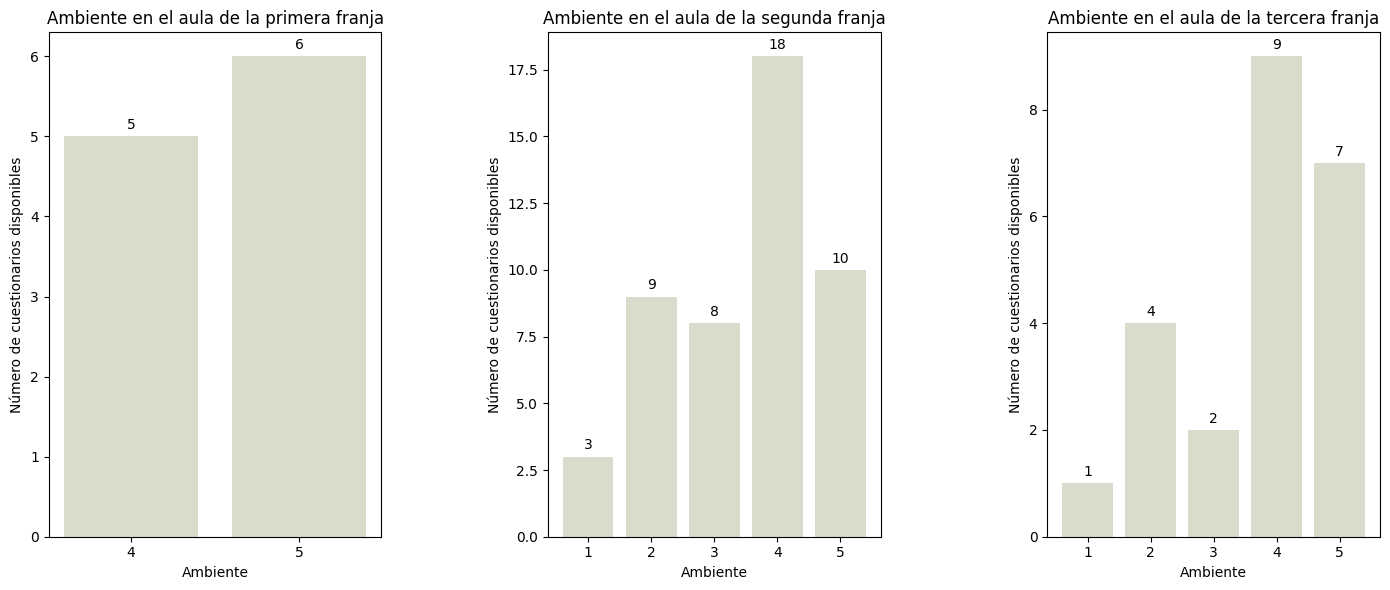

In [ ]:
x = 'Ambiente'
y = 'Número de cuestionarios disponibles'
t = 'Ambiente en el aula'
c = '#d8dccb'
columna = 'Ambiente_cargado'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje un ambierte muy cargado en el aula para la primera franja.

No se disponen de muestras donde se refleje un ambierte cargado o normal en el aula para la primera franja.

##### Comodidad_aula

En esta sección, se analiza la variable de comodidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  *   8 cuestionarios reflejan un aula cómoda.
  *   3 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan un aula poco cómoda.
  *   7 cuestionarios reflejan un aula normal.
  *   25 cuestionarios reflejan un aula cómoda.
  *   10 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:
   *   1 cuestionario refleja un aula poco cómoda.
   *   14 cuestionarios reflejan un aula cómoda.
   *   8 cuestionarios reflejan un aula totalmente cómoda.

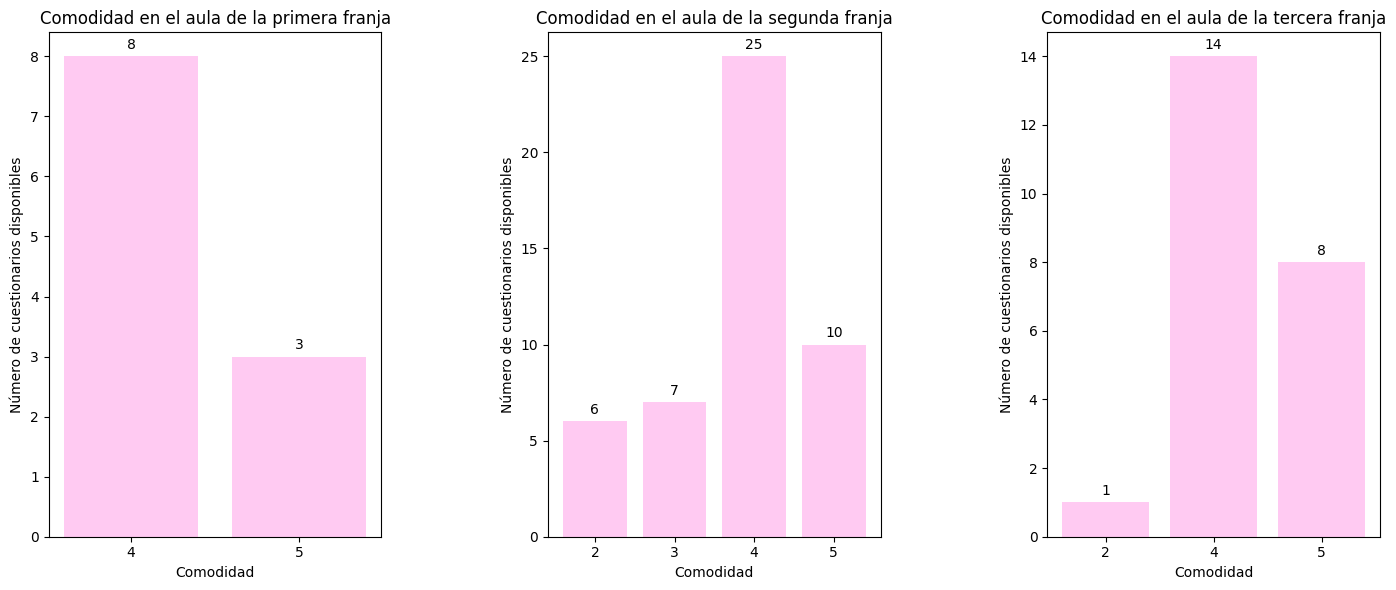

In [ ]:
x = 'Comodidad'
y = 'Número de cuestionarios disponibles'
t = 'Comodidad en el aula'
c = '#ffcaf2'
columna = 'Comodidad_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponene de muestras donde se refleje un aula nada cómoda para ninguna de las tres franjas.

No se disponene de muestras donde se refleje un aula normal para la primera o tercera franja.

No se disponene de muestras donde se refleje un aula poco cómoda para la primera franja.

##### Docencia

En esta sección, se analiza la variable de docencia del aula, es decir, el grado de aceptación de la afirmación *La docencia impartida en la clase me ha parecido buena*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  5 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   4 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  17 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  23 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  * 2 cuestionarios reflejan estar totalmente en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   5 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  12 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

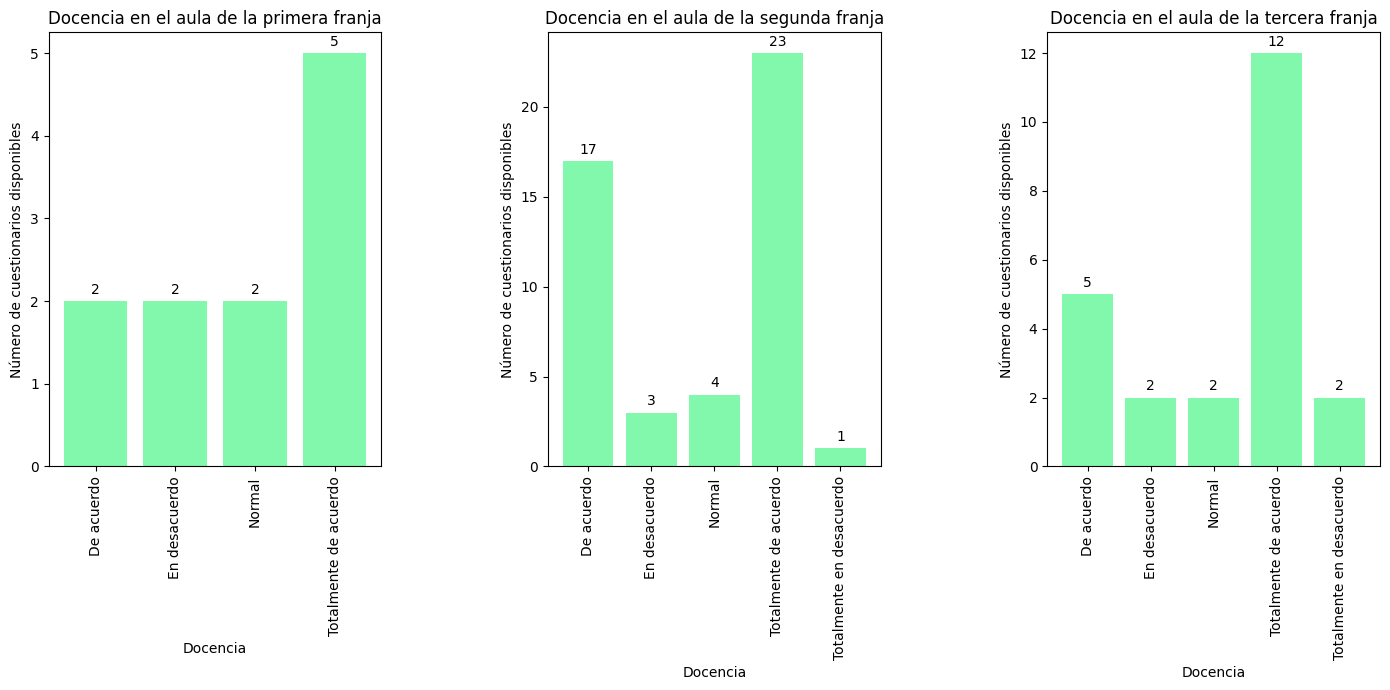

In [ ]:
x = 'Docencia'
y = 'Número de cuestionarios disponibles'
t = 'Docencia en el aula'
c = '#82f8ad'
columna = 'Docencia'
tam = (14, 7)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la primera franja.

##### E_anímico

En esta sección, se analiza la variable de estado anímico del aula, es decir, el grado de aceptación de la afirmación *Mi estado ANÍMICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   8 cuestionarios reflejan estar de acuerdo con la afirmación.
  *   2 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 48 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   9 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  26 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  7 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *  1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   4 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  14 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  1 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

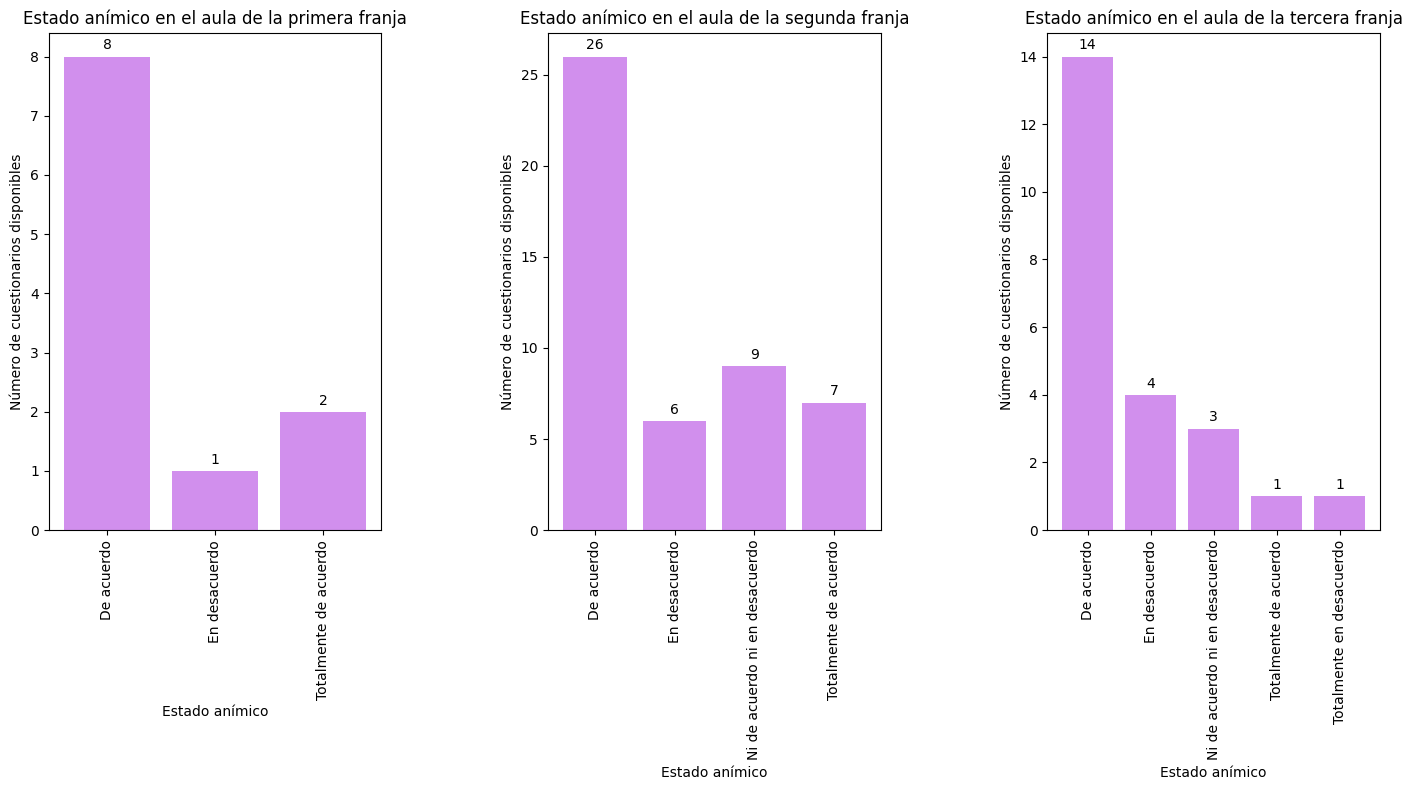

In [ ]:
x = 'Estado anímico'
y = 'Número de cuestionarios disponibles'
t = 'Estado anímico en el aula'
c = '#d18fed'
columna = 'E_anímico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la primera y segunda franja.

No se disponen de muestras donde se refleje estar ni de acuerdo ni en desacuerdo con la afirmación planteada en la primera franja.

##### E_físico

En esta sección, se analiza la variable de estado físico del aula, es decir, el grado de aceptación de la afirmación *Mi estado FÍSICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 11 cuestionarios con la siguiente distribución:

  *   9 cuestionarios reflejan estar de acuerdo con la afirmación.
  *   2 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 43 cuestionarios con la siguiente distribución:

  *   5 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   6 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  28 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  9 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 23 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  16 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  2 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

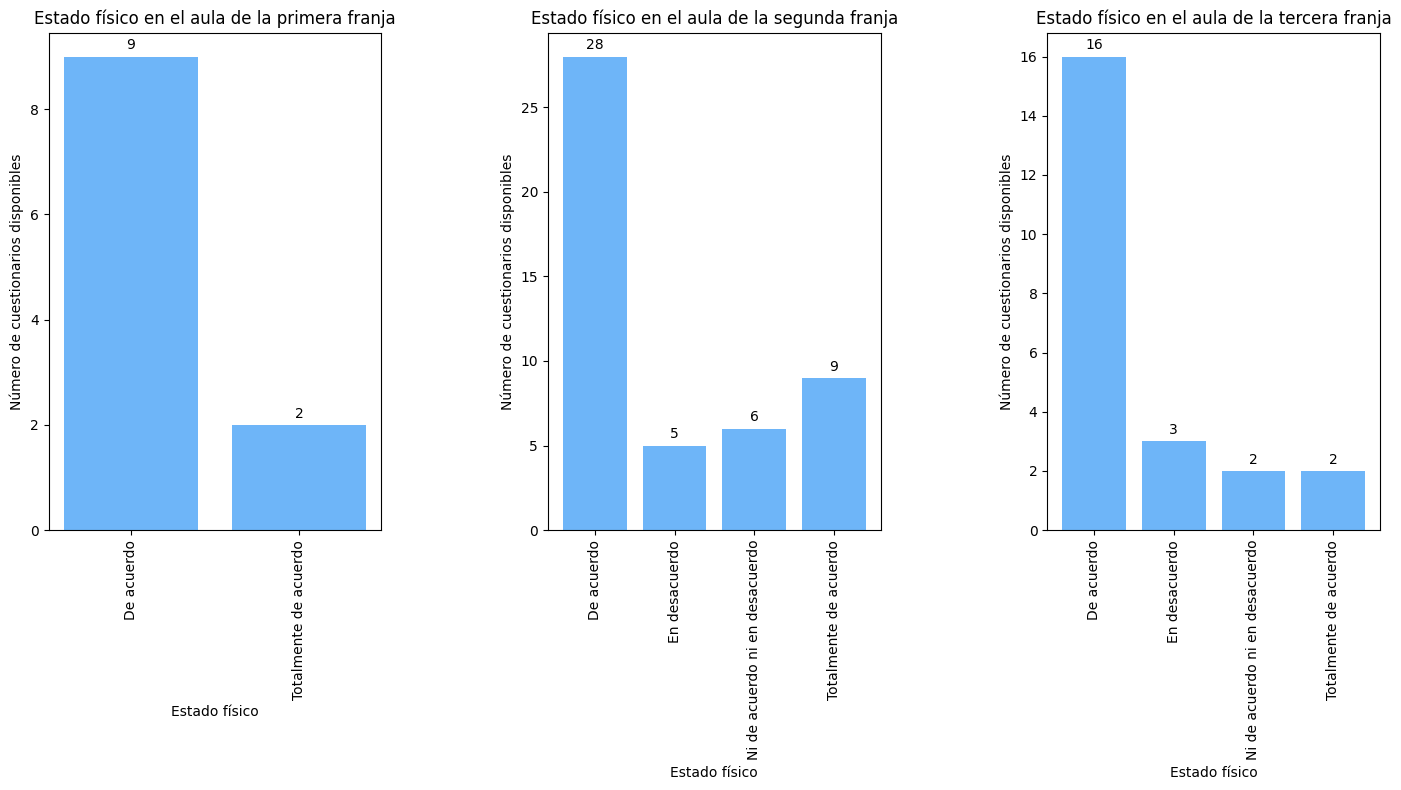

In [ ]:
x = 'Estado físico'
y = 'Número de cuestionarios disponibles'
t = 'Estado físico en el aula'
c = '#6eb5f8'
columna = 'E_físico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para ninguna de las tres franjas.

No se disponen de muestras donde se refleje estar en desacuerdo o ni de acuerdo ni en desacuerdo con la afirmación planteada en la primera franja.

#### Análisis de correlación inicial

En esta sección, se realiza un análisi preliminar de las variables del conjunto de datos de entrada para determinar si, en primera instancia, existe algún tipo de realción entre las mismas.

In [ ]:
columnas_numericas = df_3301T.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()
print(correlation_matrix)

                   Cortinas_abiertas  Luminosidad     Ruido  Temperatura  \
Cortinas_abiertas           1.000000     0.084131 -0.101888    -0.055284   
Luminosidad                 0.084131     1.000000  0.252926     0.370869   
Ruido                      -0.101888     0.252926  1.000000     0.016236   
Temperatura                -0.055284     0.370869  0.016236     1.000000   
Ambiente_cargado           -0.240748     0.442595  0.232278     0.479042   
Ocupación_aula              0.035989    -0.330869 -0.056016    -0.306179   
Comodidad_aula             -0.283258     0.548656  0.223451     0.588894   

                   Ambiente_cargado  Ocupación_aula  Comodidad_aula  
Cortinas_abiertas         -0.240748        0.035989       -0.283258  
Luminosidad                0.442595       -0.330869        0.548656  
Ruido                      0.232278       -0.056016        0.223451  
Temperatura                0.479042       -0.306179        0.588894  
Ambiente_cargado           1.000000      

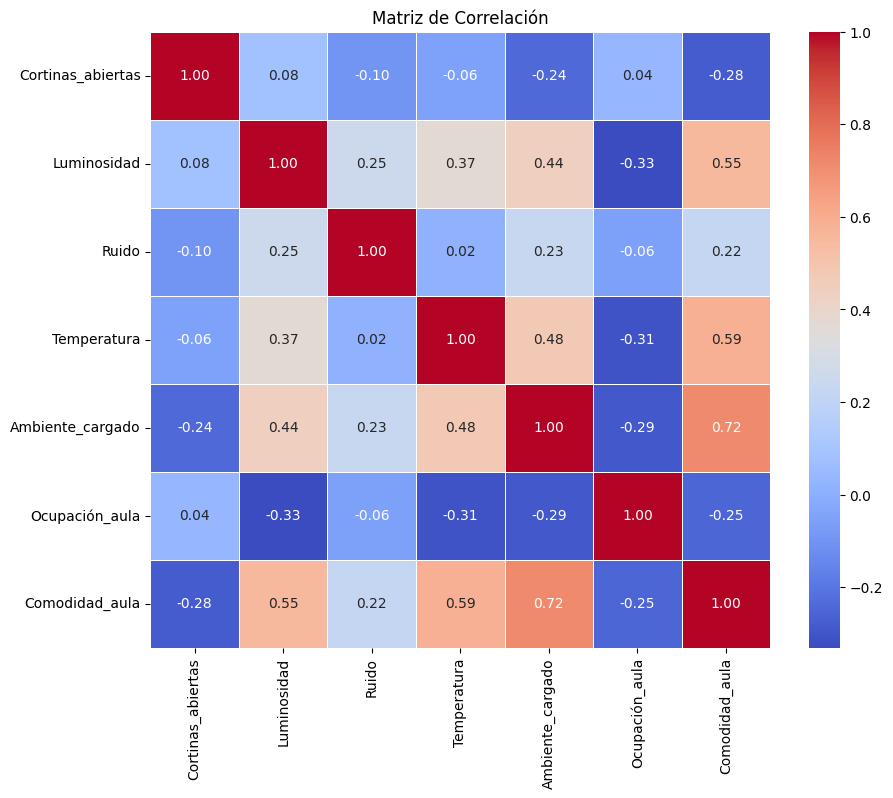

In [ ]:
columnas_numericas = df_3301T.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

Tal y como puede observarse, existen variables con cierto tipo de relación entre sí. Por un lado, la variable de comodidad del aula muestra una correlación positiva de entre 0,55 y 0,72 con las variables de luminosidad del aula, temperatura del aula y densidad del ambiente del aula, lo que significa que si las tres últimas variables mencionadas aumentan, la comodidad del aula tenderá a aumentar de la misma manera.
Por otro lado, la variable de ocupación del aula presenta una correlación negativa de 0,29 con la variable de ambiente cargado y de 0,33 con la variable de luminosidad.

#### Almacenamiento de los datos

Para facilitar el uso posterior de los datos, se almacenan en un fichero csv en Google Drive. Se elimina la columna de Grados_AACC puesto que prácticamente toda la columna se encuentra vacía y por tanto no resulta de interés para futuros experimentos. De la misma manera, puesto que los futuros experimentos se centrarán en el consumo energético y comodidad y bienestar del alumno en el aula, se elimina de la misma manera la columna de calidad docente.

In [ ]:
df_3301T = df_3301T.drop(columns=['Grados_AACC', 'Docencia'])
df_3301T

Date       HIC       HFC Mota  \
0  2023-11-06  19:00:00  21:00:00   M1   
1  2023-11-06  19:00:00  21:00:00   M1   
2  2023-11-06  17:00:00  19:00:00   M1   
3  2023-11-07  15:00:00  17:00:00   M1   
4  2023-11-07  15:00:00  17:00:00   M1   
..        ...       ...       ...  ...   
77 2024-03-20  17:00:00  19:00:00   M1   
78 2024-03-20  19:00:00  21:00:00   M1   
79 2024-03-21  15:00:00  17:00:00   M1   
88 2023-11-21  17:00:00  19:00:00   M1   
89 2023-11-21  19:00:00  21:00:00   M1   

                                               Puesto Luces_apagadas  \
0   Quinta fila, lado izquierdo, segundo asiento d...             No   
1         Quinta fila, lado izquierdo, tercer asiento             No   
2                                          5001 01 23             No   
3                                          5001 01 29             No   
4    Quinta fila, lado izquierdo del aula, 3º asienot             No   
..                                                ...            ...   
77                                               Pc15             No   
78                                               Pc15             No   
79                                               Pc33             No   
88              5 fila derecha asiento de la ventana              No   
89              5 fila derecha asiento de la ventana              No   

    Cortinas_abiertas  Luminosidad  Ruido AACC_enc Calefacción_enc  \
0                   3            5      5       No              Sí   
1                   3            5      4       No              Sí   
2                   4            5      4       No              No   
3                   4            5      4       No              No   
4                   4            5      4       No              Sí   
..                ...          ...    ...      ...             ...   
77                  4            5      5       No              No   
78                  4            5      5       No              No   
79                  4            5      5       No              No   
88                  5            5      4       No              Sí   
89                  5            5      4       No              Sí   

   Ventanas_abiertas  Temperatura  Ambiente_cargado  Ocupación_aula  \
0                 No            4                 2               2   
1                 No            5                 2               3   
2                 No            4                 5               3   
3                 No            4                 4               3   
4                 No            5                 5               2   
..               ...          ...               ...             ...   
77      Parcialmente            4                 4               3   
78      Parcialmente            4                 4               2   
79      Parcialmente            4                 4               3   
88                No            4                 1               2   
89                No            4                 1               2   

    Comodidad_aula                       E_anímico  \
0                4                      De acuerdo   
1                4        Totalmente en desacuerdo   
2                4           Totalmente de acuerdo   
3                4                      De acuerdo   
4                4                      De acuerdo   
..             ...                             ...   
77               4           Totalmente de acuerdo   
78               4                      De acuerdo   
79               4                      De acuerdo   
88               2  Ni de acuerdo ni en desacuerdo   
89               2  Ni de acuerdo ni en desacuerdo   

                           Sentimiento_ánimo                        E_físico  \
0                             Normal;Cansado                      De acuerdo   
1   Cansado;Agobiado;Triste;Aburrido;Dormido                   En desacuerdo   
2                    Contento;Normal;Cansado            

In [ ]:
df_3301T.to_csv('/content/drive/My Drive/TFM/Datos_Finales/3301T.csv', index=False, sep=';')

## Cuestionarios aula 3304

### Grupo de mañana

#### Carga y preparación de los datos

Comenzamos analizando los datos del aula 3304 del grupo de mañana. Para ello, cargamos los datos almacenados en su correspondiente archivo de Google Drive.

In [ ]:
r_3304M = "/content/drive/My Drive/TFM/Cuestionarios/3304M/3304M_m.csv"

In [ ]:
df_3304M =  pd.read_csv(r_3304M, sep=';', encoding='utf-8')
df_3304M.head(1)

Marca temporal   Apellidos, Nombre:  Aula:      Fecha:  \
0  2023/11/07 10:59:06 a. m. EET  Reyes Morales Mario   3304  07/11/2023   

  Hora Inicio Clase Hora Fin Clase Mota  \
0           9:00:00       11:00:00   M1   

  Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0                Quinta fila, lado derecho                          No   

   ¿Están las cortinas abiertas?  ...  ¿Están las ventanas abiertas?  \
0                            4.0  ...                             No   

   La temperatura del aula durante la clase ha sido  \
0                                                 5   

  ¿Se ha notado un ambiente cargado?  \
0                                  3   

  En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  4         

  En general, durante la clase, el aula me ha parecido...  \
0                                                  4        

  La docencia impartida en la clase me ha parecido buena:  \
0                                         De acuerdo        

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

   Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                             Normal                                                    

   Mi estado FÍSICO durante la clase ha sido bueno  \
0                            Totalmente de acuerdo   

   Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                             Normal                                                 

[1 rows x 25 columns]

Una vez cargados los datos, en primer lugar, se eliminan las columnas que no son de interés para el análisis en cuestión. Además, mediante el borrado de la columna que contiene el nombre y los apellidos del alumno que rellena el cuestionario y la columna del aula a la que pertenece, se consigue la anonimización completa de los datos.

In [ ]:
df_3304M = df_3304M.drop(columns=['Marca temporal', 'Apellidos, Nombre:', 'Aula:'])
df_3304M.head(1)


Fecha: Hora Inicio Clase Hora Fin Clase Mota  \
0  07/11/2023           9:00:00       11:00:00   M1   

  Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0                Quinta fila, lado derecho                          No   

   ¿Están las cortinas abiertas?  La luminosidad durante la clase ha sido  \
0                            4.0                                        5   

   Nivel de ruido durante la clase ¿Está el aire acondicionado encendido?  \
0                                4                                     No   

   ... ¿Están las ventanas abiertas?  \
0  ...                            No   

  La temperatura del aula durante la clase ha sido  \
0                                                5   

  ¿Se ha notado un ambiente cargado?  \
0                                  3   

   En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  4          

   En general, durante la clase, el aula me ha parecido...  \
0                                                  4         

   La docencia impartida en la clase me ha parecido buena:  \
0                                         De acuerdo         

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

  Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                             Normal                                                   

  Mi estado FÍSICO durante la clase ha sido bueno  \
0                           Totalmente de acuerdo   

  Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                             Normal                                                

[1 rows x 22 columns]

In [ ]:
df_3304M.columns

Index(['Fecha:', 'Hora Inicio Clase', 'Hora Fin Clase', 'Mota',
       'Puesto del aula en el que estás sentado:',
       '¿Están las luces  apagadas?', '¿Están las cortinas abiertas?',
       'La luminosidad durante la clase ha sido',
       'Nivel de ruido durante la clase',
       '¿Está el aire acondicionado encendido?',
       'En caso afirmativo,  indica los grados si los puedes identificar:',
       '¿Está la calefacción encendida?', '¿Están las ventanas abiertas?',
       'La temperatura del aula durante la clase ha sido',
       '¿Se ha notado un ambiente cargado?',
       'En cuanto a ocupación del aula, dirías que el aula está:',
       'En general, durante la clase, el aula me ha parecido...',
       'La docencia impartida en la clase me ha parecido buena:',
       'Mi estado ANÍMICO durante la clase ha sido bueno',
       'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas',
       'Mi estado FÍSICO durante la clase ha sido b

Como puede observarse, como nombres de las columnas del DataFrame se mantienen las preguntas del cuestionario. Para facilitar el acceso y manejo de dichas columnas, se ha decidido renombrarlas con nombres más cortos que permitan de igual modo su correcta y completa identificación.

In [ ]:
nuevos_nombres = {'Fecha:': 'Date',
                  'Hora Inicio Clase': 'HIC',
                  'Hora Fin Clase': 'HFC',
                  'Puesto del aula en el que estás sentado:': 'Puesto',
                  '¿Están las luces  apagadas?': 'Luces_apagadas',
                  '¿Están las cortinas abiertas?': 'Cortinas_abiertas',
                  'La luminosidad durante la clase ha sido': 'Luminosidad',
                  'Nivel de ruido durante la clase': 'Ruido',
                  '¿Está el aire acondicionado encendido?': 'AACC_enc',
                  'En caso afirmativo,  indica los grados si los puedes identificar:': 'Grados_AACC',
                  '¿Está la calefacción encendida?': 'Calefacción_enc',
                  '¿Están las ventanas abiertas?': 'Ventanas_abiertas',
                  'La temperatura del aula durante la clase ha sido': 'Temperatura',
                  '¿Se ha notado un ambiente cargado?': 'Ambiente_cargado',
                  'En cuanto a ocupación del aula, dirías que el aula está:': 'Ocupación_aula',
                  'En general, durante la clase, el aula me ha parecido...': 'Comodidad_aula',
                  'La docencia impartida en la clase me ha parecido buena:': 'Docencia',
                  'Mi estado ANÍMICO durante la clase ha sido bueno': 'E_anímico',
                  'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_ánimo',
                  'Mi estado FÍSICO durante la clase ha sido bueno': 'E_físico',
                  'Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_físico'
                  }

df_3304M = df_3304M.rename(columns=nuevos_nombres)
df_3304M.head(1)

Date      HIC       HFC Mota                     Puesto  \
0  07/11/2023  9:00:00  11:00:00   M1  Quinta fila, lado derecho   

  Luces_apagadas  Cortinas_abiertas  Luminosidad  Ruido AACC_enc  ...  \
0             No                4.0            5      4       No  ...   

  Ventanas_abiertas Temperatura Ambiente_cargado  Ocupación_aula  \
0                No           5                3               4   

   Comodidad_aula    Docencia   E_anímico Sentimiento_ánimo  \
0               4  De acuerdo  De acuerdo            Normal   

                E_físico Sentimiento_físico  
0  Totalmente de acuerdo             Normal  

[1 rows x 22 columns]

In [ ]:
df_3304M.columns

Index(['Date', 'HIC', 'HFC', 'Mota', 'Puesto', 'Luces_apagadas',
       'Cortinas_abiertas', 'Luminosidad', 'Ruido', 'AACC_enc', 'Grados_AACC',
       'Calefacción_enc', 'Ventanas_abiertas', 'Temperatura',
       'Ambiente_cargado', 'Ocupación_aula', 'Comodidad_aula', 'Docencia',
       'E_anímico', 'Sentimiento_ánimo', 'E_físico', 'Sentimiento_físico'],
      dtype='object')

In [ ]:
print(f'El DataFrame está formado por {df_3304M.shape[0]} filas y {df_3304M.shape[1]} columnas')

El DataFrame está formado por 293 filas y 22 columnas


#### Análisis de los datos

Una vez finalizada la preparación de los datos, es posible comenzar con su análisis en profundidad mediante el análisis gráfico de cada una de sus variables.



##### Date

En esta sección se analiza la variable de fecha del cuestionario. Tal y como puede observarse, disponemos de cuestionarios para 47 días. Asimismo, existen datos para los meses de octubre y abril. Puesto que quedan fuera del periodo de tiempo de interés, se deberían eliminar. Para la fecha del 27 de octubre, se realizará un análisis más en profuncidad para determinar si se trata de un error teniendo en cuenta que los cuestionarios comenzaron a realizarse en noviembre.

In [ ]:
df_3304M['Date'].unique()

array(['07/11/2023', '08/11/2023', '15/11/2023', '10/11/2023',
       '14/11/2023', '27/10/2003', '16/11/2023', '17/11/2023',
       '21/11/2023', '22/11/2023', '23/11/2023', '24/11/2023',
       '28/11/2023', '29/11/2023', '30/11/2023', '01/12/2023',
       '05/12/2023', '12/12/2023', '13/12/2023', '14/12/2023',
       '19/12/2023', '20/12/2023', '30/01/2024', '31/01/2024',
       '01/02/2024', '02/02/2024', '02/01/2024', '06/02/2024',
       '07/02/2024', '08/02/2024', '09/02/2024', '13/02/2024',
       '14/02/2024', '27/02/2024', '28/02/2024', '29/02/2024',
       '05/03/2024', '06/03/2024', '07/03/2024', '08/03/2024',
       '19/03/2024', '13/03/2024', '12/04/2024', '17/04/2024',
       '18/04/2024', '10/04/2024', '14/03/2024'], dtype=object)

In [ ]:
len(df_3304M['Date'].unique())

47

In [ ]:
df_3304M_aux =  pd.read_csv(r_3304M, sep=';', encoding='utf-8')
df_3304M_aux.head(1)

Marca temporal   Apellidos, Nombre:  Aula:      Fecha:  \
0  2023/11/07 10:59:06 a. m. EET  Reyes Morales Mario   3304  07/11/2023   

  Hora Inicio Clase Hora Fin Clase Mota  \
0           9:00:00       11:00:00   M1   

  Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0                Quinta fila, lado derecho                          No   

   ¿Están las cortinas abiertas?  ...  ¿Están las ventanas abiertas?  \
0                            4.0  ...                             No   

   La temperatura del aula durante la clase ha sido  \
0                                                 5   

  ¿Se ha notado un ambiente cargado?  \
0                                  3   

  En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  4         

  En general, durante la clase, el aula me ha parecido...  \
0                                                  4        

  La docencia impartida en la clase me ha parecido buena:  \
0                                         De acuerdo        

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

   Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                                             Normal                                                    

   Mi estado FÍSICO durante la clase ha sido bueno  \
0                            Totalmente de acuerdo   

   Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                             Normal                                                 

[1 rows x 25 columns]

In [ ]:
df_3304M_aux = df_3304M_aux[(df_3304M_aux['Fecha:'] == '27/10/2003')]
df_3304M_aux

Marca temporal    Apellidos, Nombre:  Aula:      Fecha:  \
63  2023/11/14 11:56:57 a. m. EET  Reyes Morales, Mario   3304  27/10/2003   

   Hora Inicio Clase Hora Fin Clase Mota  \
63           9:00:00       11:00:00   M2   

   Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
63                                     pc27                          No   

    ¿Están las cortinas abiertas?  ...  ¿Están las ventanas abiertas?  \
63                            5.0  ...                   Parcialmente   

    La temperatura del aula durante la clase ha sido  \
63                                                 4   

   ¿Se ha notado un ambiente cargado?  \
63                                  4   

   En cuanto a ocupación del aula, dirías que el aula está:  \
63                                                  4         

   En general, durante la clase, el aula me ha parecido...  \
63                                                  4        

   La docencia impartida en la clase me ha parecido buena:  \
63                                         De acuerdo        

    Mi estado ANÍMICO durante la clase ha sido bueno  \
63                    Ni de acuerdo ni en desacuerdo   

    Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
63                                            Cansado                                                    

    Mi estado FÍSICO durante la clase ha sido bueno  \
63                                       De acuerdo   

    Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
63                                          Agotado/a                                                 

[1 rows x 25 columns]

Tal y como puede observarse, la fecha de relleno del cuestionario se corresponde con el 14 de noviembre. Por ese motivo, es posible determinar que la fecha del 27 de octubre se trata de un error y se sustituye por el 14/11/2023

In [ ]:
fila_a_cambiar = df_3304M.loc[df_3304M['Date'] == '27/10/2003'].index[0]
df_3304M.loc[fila_a_cambiar, 'Date'] = '14/11/2023'


In [ ]:
df_3304M['Date'].unique()

array(['07/11/2023', '08/11/2023', '15/11/2023', '10/11/2023',
       '14/11/2023', '16/11/2023', '17/11/2023', '21/11/2023',
       '22/11/2023', '23/11/2023', '24/11/2023', '28/11/2023',
       '29/11/2023', '30/11/2023', '01/12/2023', '05/12/2023',
       '12/12/2023', '13/12/2023', '14/12/2023', '19/12/2023',
       '20/12/2023', '30/01/2024', '31/01/2024', '01/02/2024',
       '02/02/2024', '02/01/2024', '06/02/2024', '07/02/2024',
       '08/02/2024', '09/02/2024', '13/02/2024', '14/02/2024',
       '27/02/2024', '28/02/2024', '29/02/2024', '05/03/2024',
       '06/03/2024', '07/03/2024', '08/03/2024', '19/03/2024',
       '13/03/2024', '12/04/2024', '17/04/2024', '18/04/2024',
       '10/04/2024', '14/03/2024'], dtype=object)

Asimismo, se eliminan los cuestionarios de abril.

In [ ]:
df_3304M = df_3304M[df_3304M.apply(lambda fila: fila.Date.split('/')[1] != '04', axis=1)]
len(df_3304M['Date'].unique())

42

In [ ]:
df_3304M['Date'] = pd.to_datetime(df_3304M['Date'], format='%d/%m/%Y')

<ipython-input-122-732d09a819a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3304M['Date'] = pd.to_datetime(df_3304M['Date'], format='%d/%m/%Y')


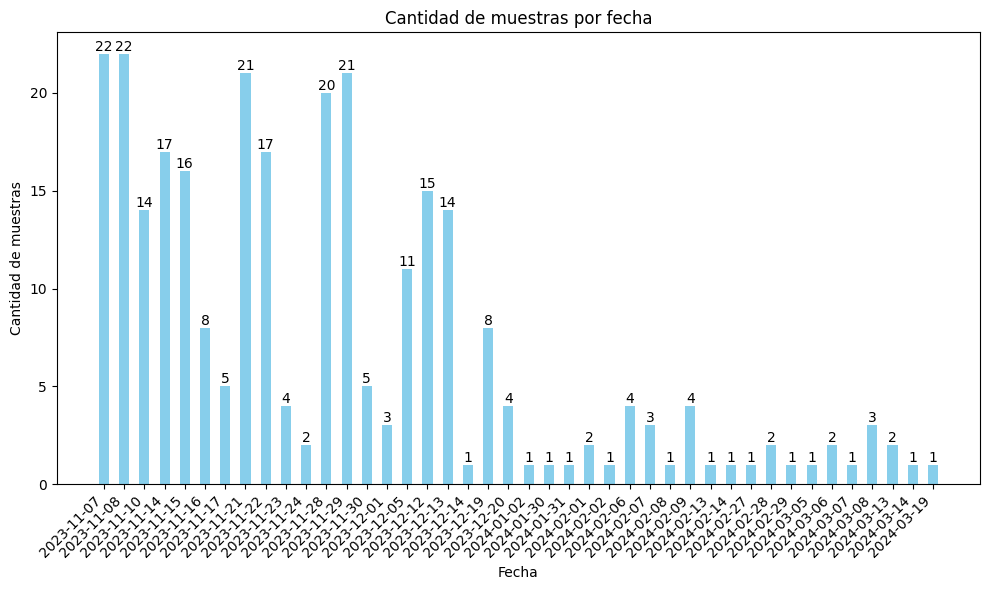

In [ ]:
muestras_por_fecha = df_3304M['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(muestras_por_fecha.index.astype(str), muestras_por_fecha.values, color='skyblue', width=0.5, align='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por fecha')

plt.tight_layout()
plt.show()

Tal y como puede observarse, el número de cuestionarios disponibles disminuye con el tiempo.

##### HIC y HFC

En esta sección se analiza la variable de hora de comienzo y de fin de las clases. Para los datos de este grupo en concreto, la jornada lectiva comienza a las 9:00:00 y finaliza a las 15:00:00. Teniendo esto en cuenta, es posible analizar cuantas muestras o cuestionarios hay disponibles para cada una de las franjas de dos horas que es posible definir: 9:00:00-11:00:00, 11:00:00-13:00:00 y 13:00:00-15:00:00.

In [ ]:
hic = type(df_3304M['HIC'][1])
hfc = type(df_3304M['HFC'][1])

print(f"La columna HIC es de tipo {hic}")
print(f"La columna HIC es de tipo {hfc}")

La columna HIC es de tipo <class 'str'>
La columna HIC es de tipo <class 'str'>


In [ ]:
df_3304M_f1, df_3304M_f2, df_3304M_f3 = get_franjas(df_3304M)


Se diponen de 285 cuestionarios en total de los que:
 
122 cuestionarios pertenecen a la franja de 9:00:00 a 11:00:00

128 cuestionarios pertenecen a la franja de 11:00:00 a 13:00:00

35 cuestionarios pertenecen a la franja de 13:00:00 a 15:00:00



Puesto que el resto de variables se analizarán de manera independiente para cada una de las tres franjas horarias definidas. Para facilitar dicho análisis y el acceso a los datos, los tres DataFrames generados se almacenan en un diccionario.

In [ ]:
data_frames_franjas = {'df1': df_3304M_f1,
                      'df2': df_3304M_f2,
                      'df3': df_3304M_f3}

##### Ocupación_aula

En esta sección, se analiza la variable de grado de ocupación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   12 cuestionarios reflejan un grado de ocupación de 2.
  *   48 cuestionarios reflejan un grado de ocupación de 3.
  *   55 cuestionarios reflejan un grado de ocupación de 4.
  *   7 cuestionarios reflejan un grado de ocupación de 5.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   7 cuestionarios reflejan un grado de ocupación de 2.
  *   51 cuestionarios reflejan un grado de ocupación de 3.
  *   59 cuestionarios reflejan un grado de ocupación de 4.
  *   11 cuestionarios reflejan un grado de ocupación de 5.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan un grado de ocupación de 2.
  *   14 cuestionarios reflejan un grado de ocupación de 3.
  *   14 cuestionarios reflejan un grado de ocupación de 4.
  *   5 cuestionarios reflejan un grado de ocupación de 5.

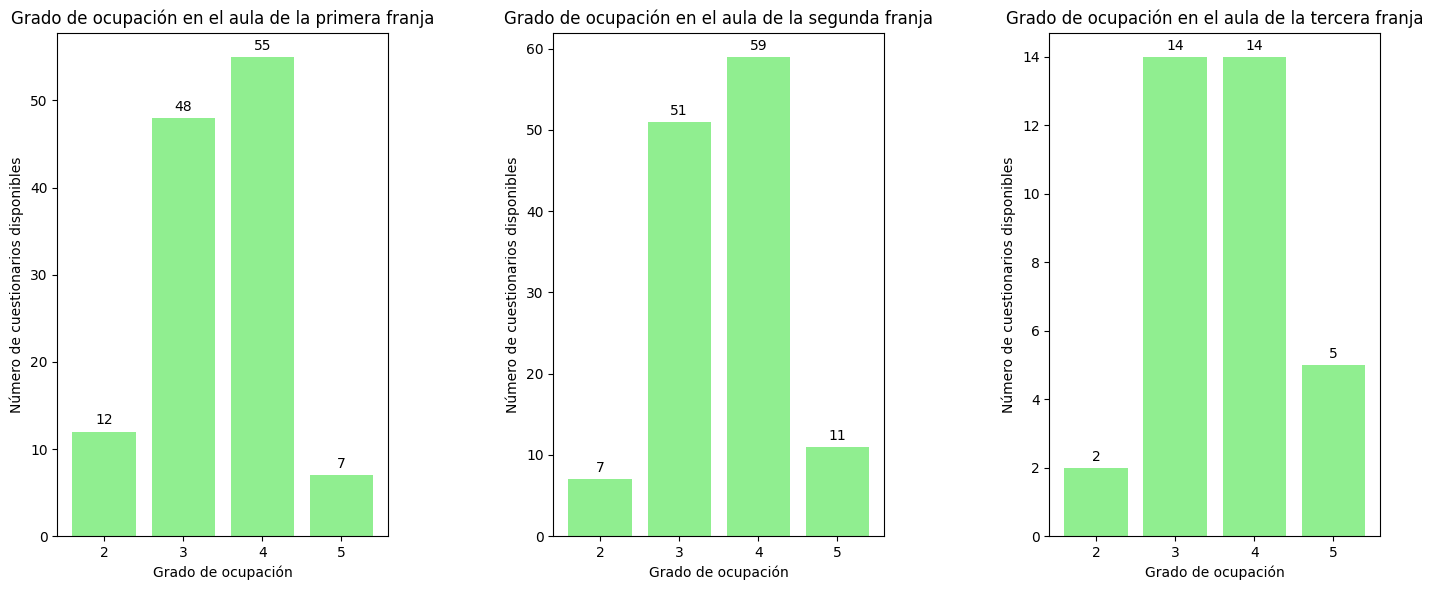

In [ ]:
x = 'Grado de ocupación'
y = 'Número de cuestionarios disponibles'
t = 'Grado de ocupación en el aula'
c = 'lightgreen'
columna = 'Ocupación_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna )

No se disponen de muestras donde se refleje un grado de ocupación de 1 para ninguna de las tres franjas.

##### Luces_apagadas

En esta sección, se analiza la variable de iluminación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  * 120 reflejan que las luces estaban encendidas en el aula.
  * 2 reflejan que las luces estaban apagadas en el aula.


* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  * 122 reflejan que las luces estaban encendidas en el aula.
  * 6 reflejan que las luces estaban apagadas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  * 32 reflejan que las luces estaban encendidas en el aula.
  * 3 reflejan que las luces estaban apagadas en el aula.

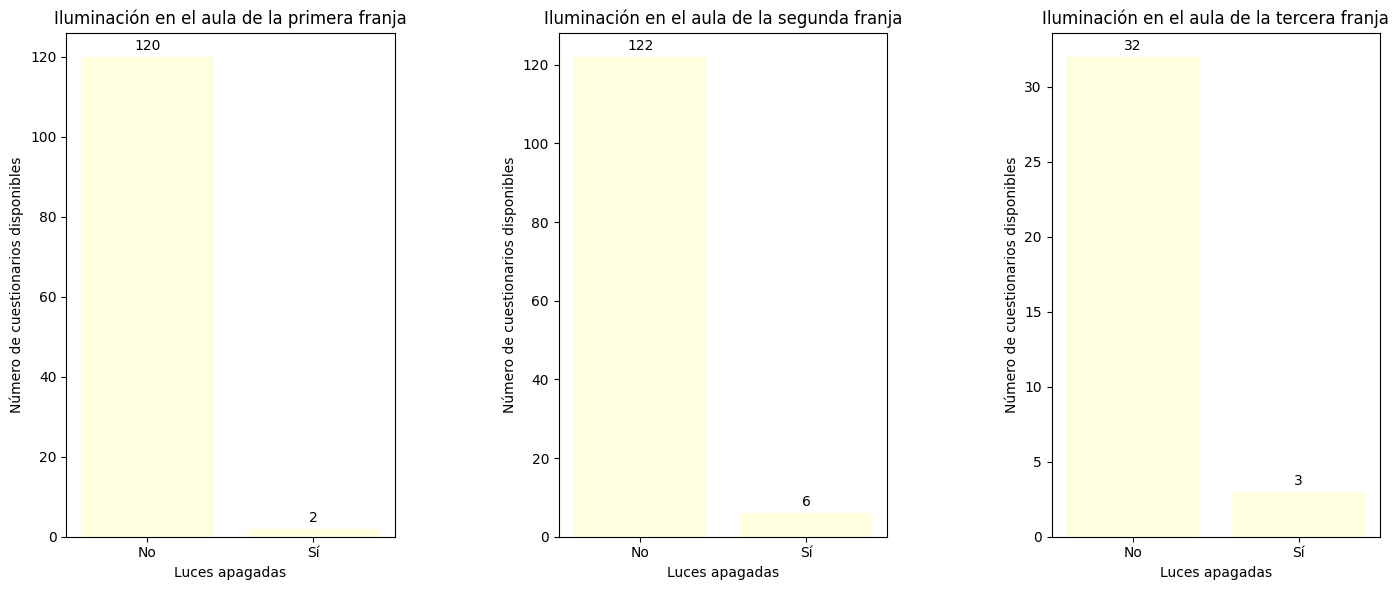

In [ ]:
x = 'Luces apagadas'
y = 'Número de cuestionarios disponibles'
t = 'Iluminación en el aula'
c = 'lightyellow'
columna = 'Luces_apagadas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de información para todas las posibles respuestas a esta pregunta.

##### Cortinas_abiertas

En esta sección, se analiza la variable de apertura de cortinas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  * 8 reflejan todas las cortinas cerradas en el aula.
  * 26 reflejan más cortinas cerradas que abiertas en el aula.
  * 38 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 29 reflejan más cortinas abiertas que cerradas en el aula.
  * 21 reflejan todas las cortinas abiertas en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  * 5 reflejan todas las cortinas cerradas en el aula.
  * 26 reflejan más cortinas cerradas que abiertas en el aula.
  * 41 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 44 reflejan más cortinas abiertas que cerradas en el aula.
  * 11 reflejan todas las cortinas abiertas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  * 2 reflejan todas las cortinas cerradas en el aula.
  * 6 reflejan más cortinas cerradas que abiertas en el aula.
  * 10 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 16 reflejan más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

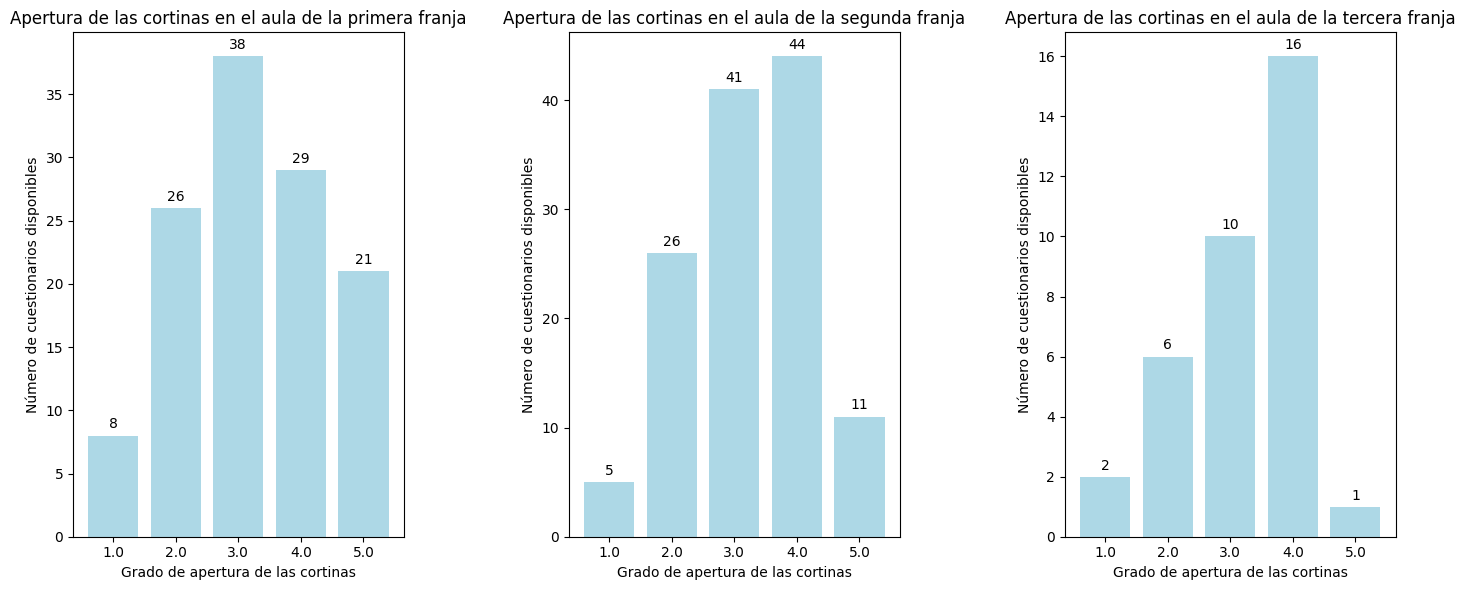

In [ ]:
x = 'Grado de apertura de las cortinas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las cortinas en el aula'
c = 'lightblue'
columna = 'Cortinas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

Se dispone de información para todas las posibles respuestas a esta pregunta.


##### Luminosidad

En esta sección, se analiza la variable de luminosidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   10 cuestionarios reflejan una luminosidad normal.
  *   42 cuestionarios reflejan una luminosidad adecuada.
  *   70 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   7 cuestionarios reflejan una luminosidad normal.
  *   47 cuestionarios reflejan una luminosidad adecuada.
  *   74 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una luminosidad normal.
  *   15 cuestionarios reflejan una luminosidad adecuada.
  *   19 cuestionarios reflejan una luminosidad totalmente adecuada.


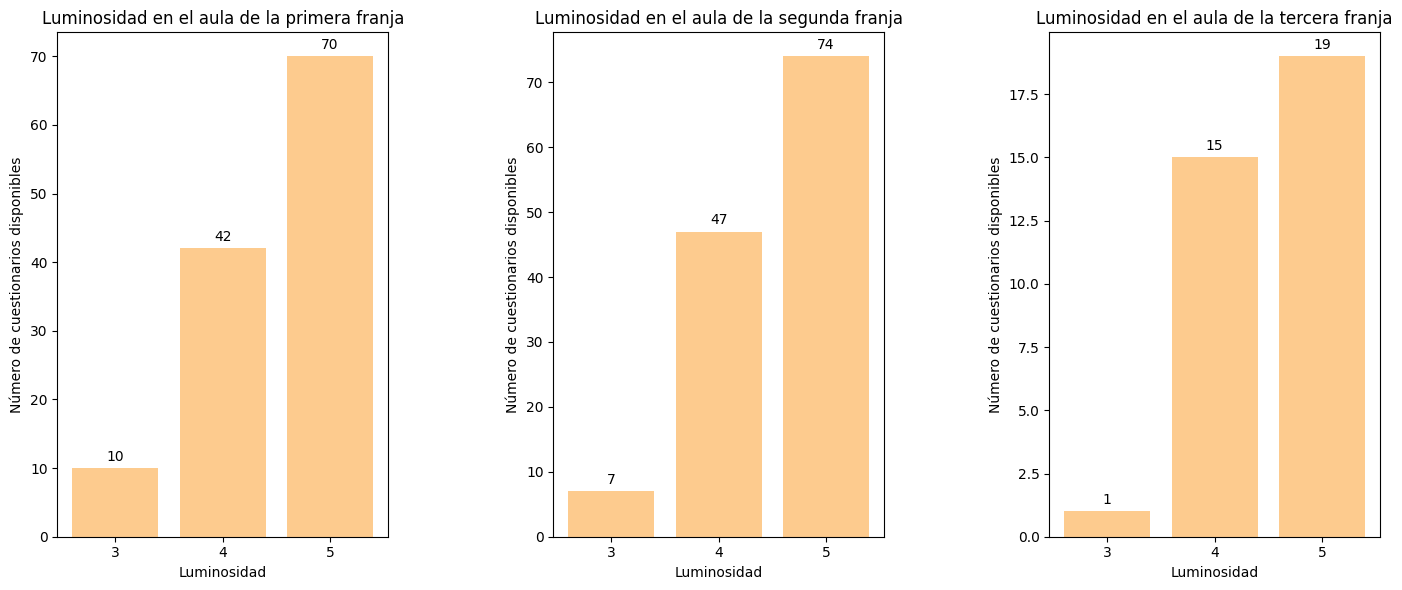

In [ ]:
x = 'Luminosidad'
y = 'Número de cuestionarios disponibles'
t = 'Luminosidad en el aula'
c = '#fdcb8e'
columna = 'Luminosidad'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje una luminosidad completamente inadecuada o inadecuada para ninguna de las tres franjas.

##### Ruido

En esta sección, se analiza la variable de ruido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un nivel de ruido inadecuado.
  *   16 cuestionarios reflejan un nivel de ruido normal.
  *   70 cuestionarios reflejan un nivel de ruido adecuado.
  *   35 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan un nivel de ruido inadecuado.
  *   15 cuestionarios reflejan un nivel de ruido normal.
  *   73 cuestionarios reflejan un nivel de ruido adecuado.
  *   36 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un nivel de ruido totalmente inadecuado.
  *   2 cuestionarios reflejan un nivel de ruido inadecuado.
  *   3 cuestionarios reflejan un nivel de ruido normal.
  *   18 cuestionarios reflejan un nivel de ruido adecuado.
  *   11 cuestionarios reflejan un nivel de ruido totalmente adecuado.

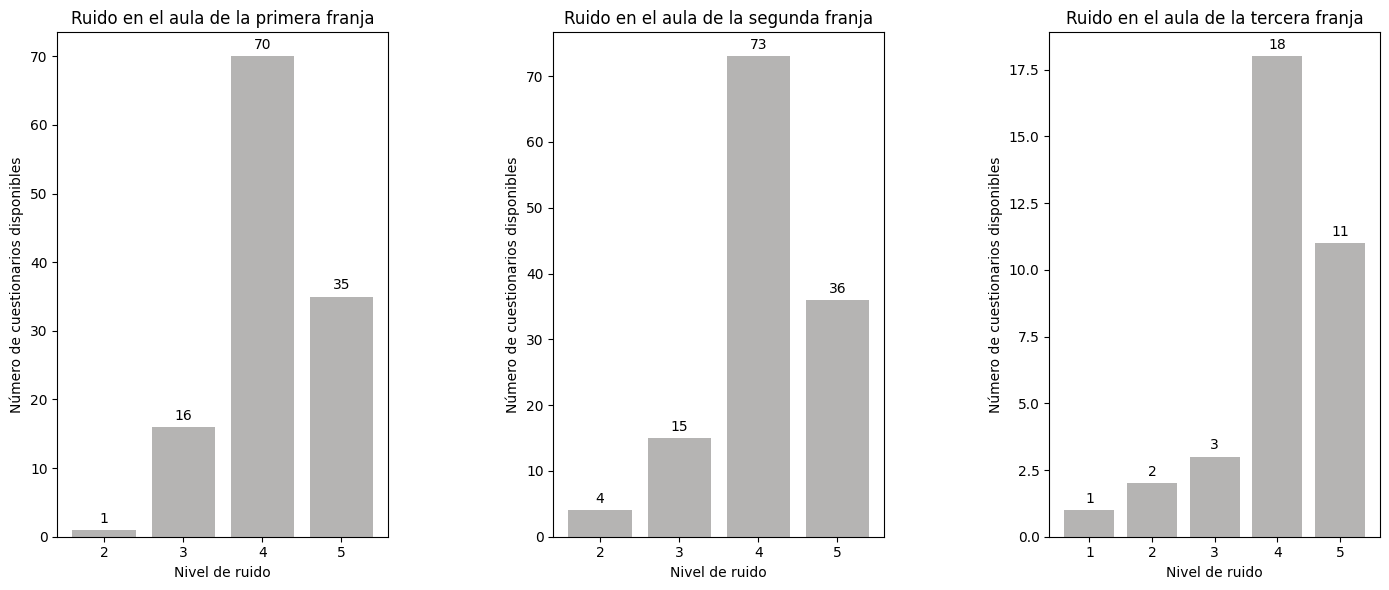

In [ ]:
x = 'Nivel de ruido'
y = 'Número de cuestionarios disponibles'
t = 'Ruido en el aula'
c = '#b5b4b3'
columna = 'Ruido'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)


No se disponen de muestras donde se refleje un nivel de ruido completamente inadecuado para la primera y segunda franjas.



##### AACC_enc

En esta sección, se analiza la variable de aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:
  * 121 reflejan el aire acondicionado en el aula apagado.
  * 1 refleja el aire acondicionado en el aula encendido.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:
  * 127 reflejan el aire acondicionado en el aula apagado.
  * 1 refleja el aire acondicionado en el aula encendido.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

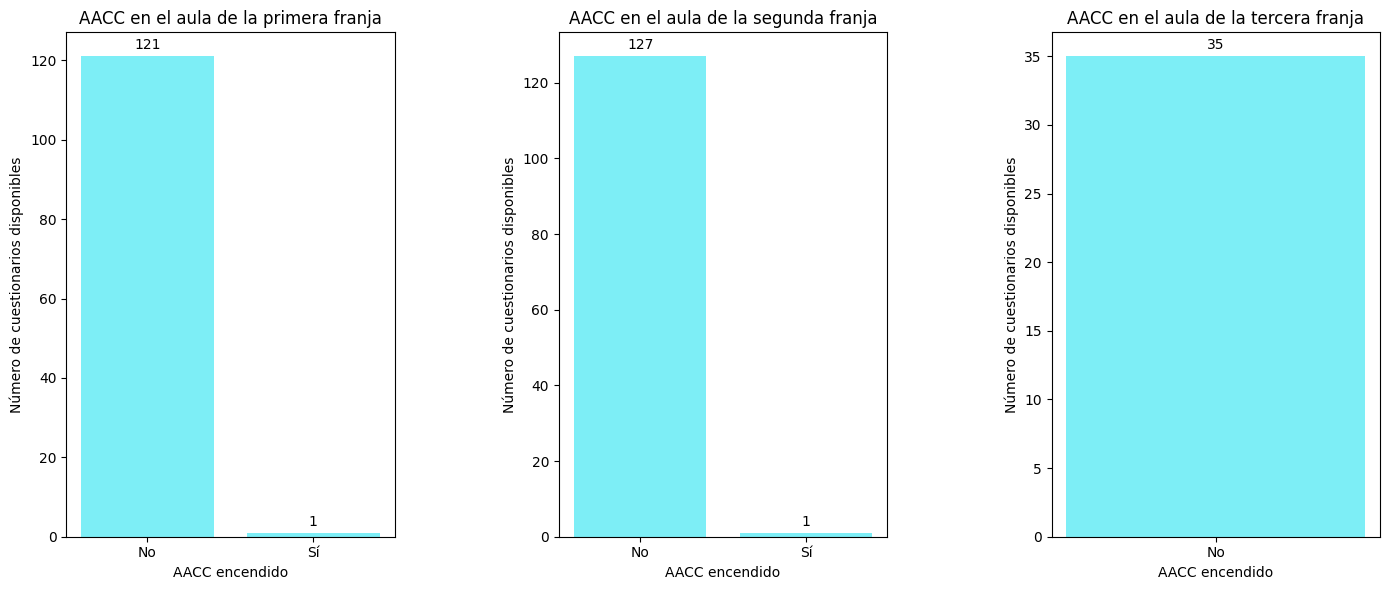

In [ ]:
x = 'AACC encendido'
y = 'Número de cuestionarios disponibles'
t = 'AACC en el aula'
c = '#7deef6'
columna = 'AACC_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se disponen de muestras donde se refleje el aire acondicionado del aula encendido para la tercera franja.

##### Grados_AACC

En esta sección, se analiza la variable de grados del aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la primera y segunda franjas, se disponen de más valores únicos de los cuestionarios respondidos de manera afirmativa en la pregunta de aire acondicionado encendido analizada en la sección anterior. Puesto que solo se dispone de 6 muestras con un valor válido en esta columna, esta información no resulta significativa y se propone de igual manera no tener en cuenta esta información.

* Para la tercera franja, pese a que se disponen de algunos datos de los grados de encendido del aire acondicionado, es posible que se traten de valores erróneos puesto que no va en corcondancia con todas las respuestas negativas obtenidas a la pregunta de aire acondicionado encendido analizadas en la subsección anterior.

In [ ]:
df_3304M_f1['Grados_AACC'].unique()

array([nan, '23 aprox', '23', '20'], dtype=object)

In [ ]:
x = df_3304M_f1[df_3304M_f1['AACC_enc'] == 'Sí']
x['Grados_AACC']

6    23 aprox
Name: Grados_AACC, dtype: object

In [ ]:
df_3304M_f2['Grados_AACC'].unique()

array([nan, 'No lo veo', '23', '23 aprox'], dtype=object)

In [ ]:
x = df_3304M_f2[df_3304M_f2['AACC_enc'] == 'Sí']
x['Grados_AACC']

6    23 aprox
Name: Grados_AACC, dtype: object

In [ ]:
df_3304M_f3['Grados_AACC'].unique()

array(['23', nan], dtype=object)

##### Calefacción_enc

En esta sección, se analiza la variable de calefacción encendida del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:
  * 92 reflejan la calefacción apagada en el aula.
  * 30 reflejan la calefacción encendida en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:
  * 92 reflejan la calefacción apagada en el aula.
  * 36 reflejan la calefacción encendida en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:
  * 27 reflejan la calefacción apagada en el aula.
  * 8 reflejan la calefacción encendida en el aula.

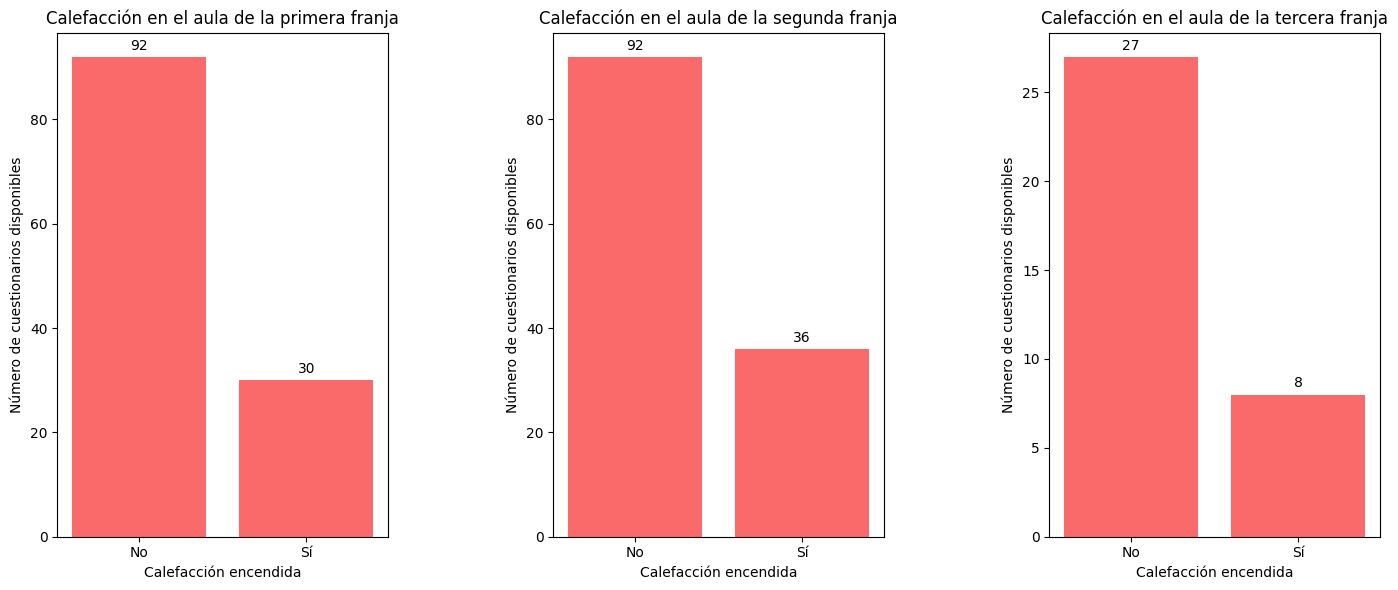

In [ ]:
x = 'Calefacción encendida'
y = 'Número de cuestionarios disponibles'
t = 'Calefacción en el aula'
c = '#fb6a6a'
columna = 'Calefacción_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de información para todas las posibles respuestas a esta pregunta.

##### Ventanas_abiertas

En esta sección, se analiza la variable de ventanas abiertas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  * 65 reflejan las ventanas cerradas en el aula.
  * 49 reflejan las ventanas parcialmente abiertas en el aula.  
  * 8 reflejan las ventanas abiertas en el aula.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  * 64 reflejan las ventanas cerradas en el aula.
  * 60 reflejan las ventanas parcialmente abiertas en el aula.  
  * 4 reflejan las ventanas abiertas en el aula.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  * 15 reflejan las ventanas cerradas en el aula.
  * 16 reflejan las ventanas parcialmente abiertas en el aula.  
  * 4 reflejan las ventanas abiertas en el aula.

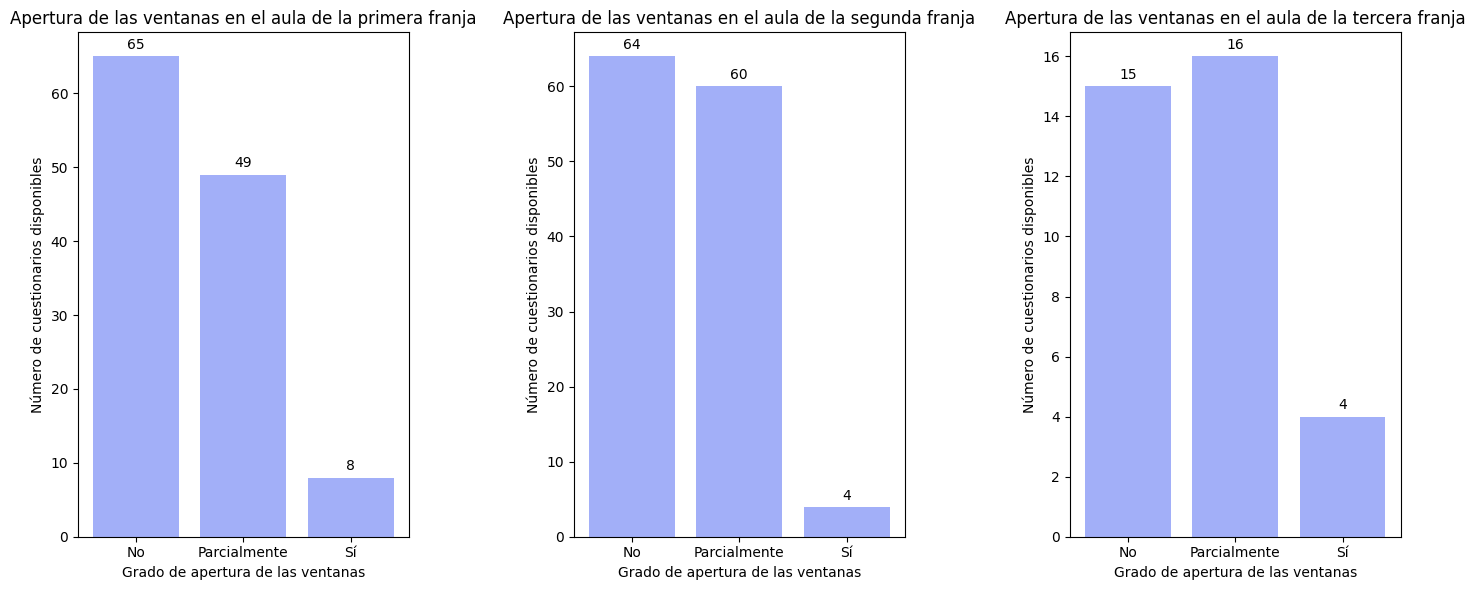

In [ ]:
x = 'Grado de apertura de las ventanas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las ventanas en el aula'
c = '#a2aff8'
columna = 'Ventanas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

Se dispone de información para todas las posibles respuestas a esta pregunta.

##### Temperatura

En esta sección, se analiza la variable de temperatura del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan una temperatura inadecuada.
  *   24 cuestionarios reflejan una temperatura normal.
  *   62 cuestionarios reflejan una temperatura adecuada.
  *   32 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   7 cuestionarios reflejan una temperatura inadecuada.
  *   20 cuestionarios reflejan una temperatura normal.
  *   67 cuestionarios reflejan una temperatura adecuada.
  *   34 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja una temperatura totalmente inadecuada.
  *   1 cuestionario refleja una temperatura inadecuada.
  *   4 cuestionarios reflejan una temperatura normal.
  *   16 cuestionarios reflejan una temperatura adecuada.
  *   13 cuestionarios reflejan una temperatura totalmente adecuada.

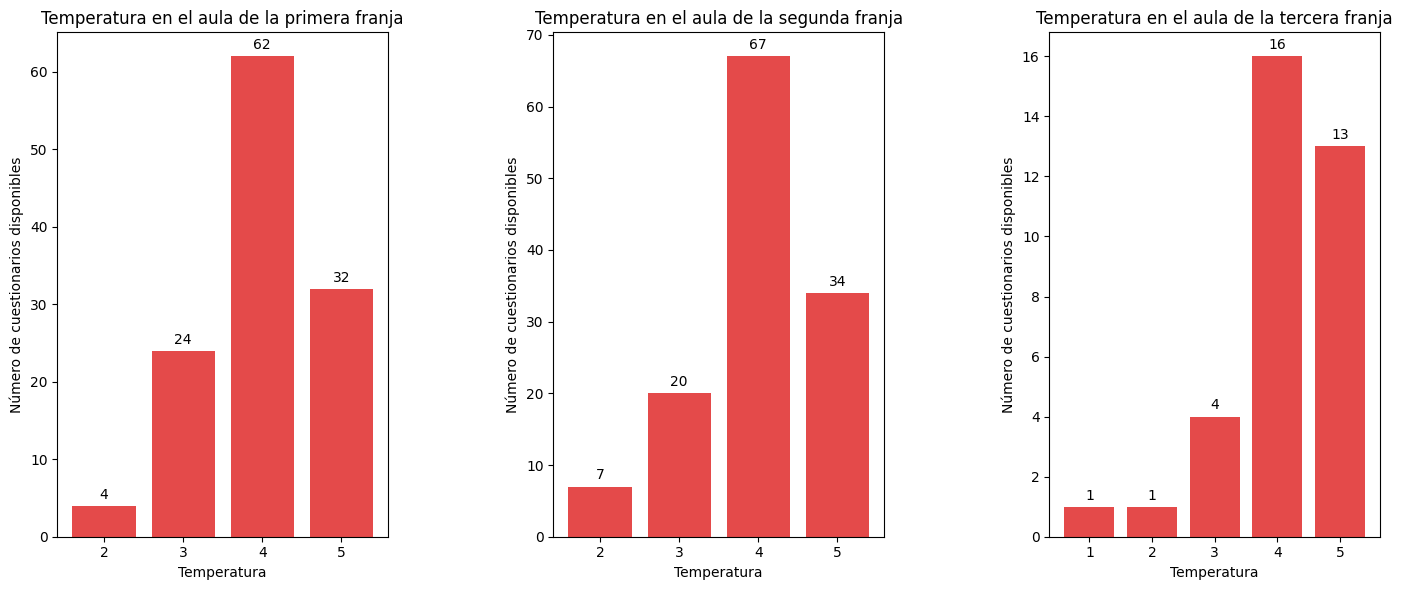

In [ ]:
x = 'Temperatura'
y = 'Número de cuestionarios disponibles'
t = 'Temperatura en el aula'
c = '#e44a4a'
columna = 'Temperatura'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula totalmente inadecuado para la primera y segunda franjas.


##### Ambiente_cargado

En esta sección, se analiza la variable de ambiente cargado del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:


  *   3 cuestionarios reflejan un ambiente cargado.
  *   24 cuestionarios reflejan un ambiente normal.
  *   60 cuestionarios reflejan un ambiente poco cargado.
  *   35 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un ambiente cargado.
  *   26 cuestionarios reflejan un ambiente normal.
  *   65 cuestionarios reflejan un ambiente poco cargado.
  *   34 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un ambiente muy cargado.
  *   3 cuestionarios reflejan un ambiente cargado.
  *   7 cuestionarios reflejan un ambiente normal.
  *   17 cuestionarios reflejan un ambiente poco cargado.
  *   6 cuestionarios reflejan un ambiente nada cargado.

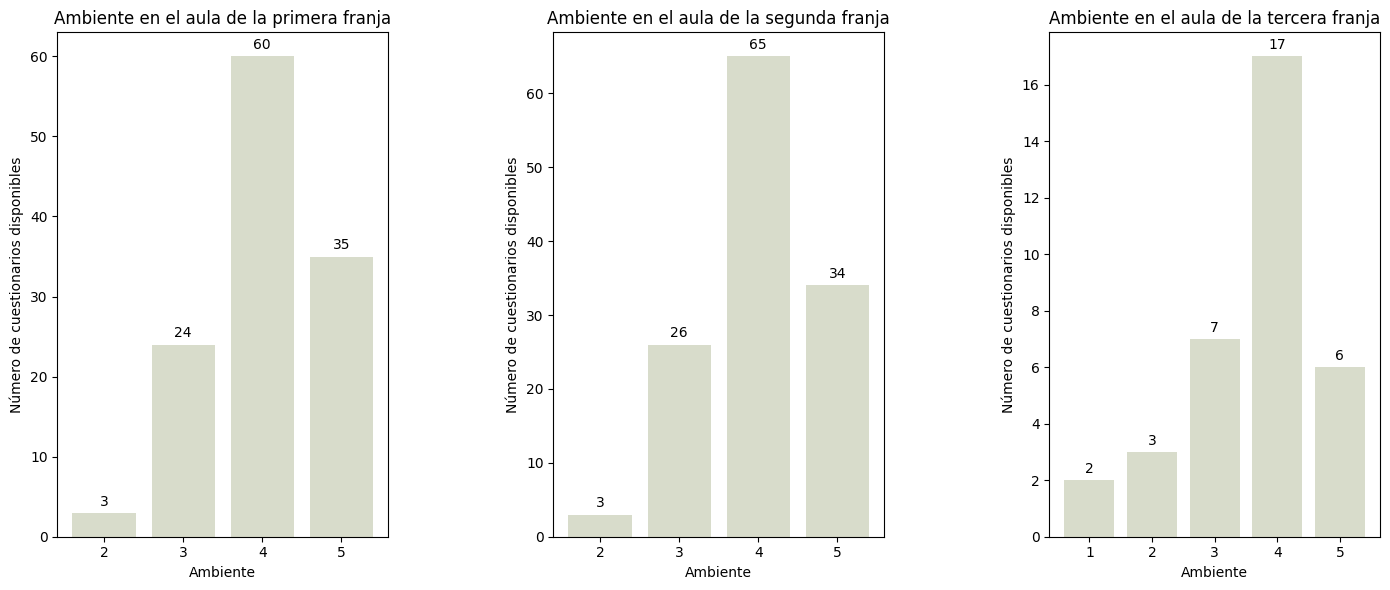

In [ ]:
x = 'Ambiente'
y = 'Número de cuestionarios disponibles'
t = 'Ambiente en el aula'
c = '#d8dccb'
columna = 'Ambiente_cargado'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje un ambiente muy cargado en el aula para la primera y tercera franjas

##### Comodidad_aula

En esta sección, se analiza la variable de comodidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   17 cuestionarios reflejan un aula normal.
  *   83 cuestionarios reflejan un aula cómoda.
  *   22 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un aula poco cómoda.
  *   14 cuestionarios reflejan un aula normal.
  *   84 cuestionarios reflejan un aula cómoda.
  *   29 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un aula poco cómoda.
  *   4 cuestionarios reflejan un aula normal.
  *   19 cuestionarios reflejan un aula cómoda.
  *   11 cuestionarios reflejan un aula totalmente cómoda.

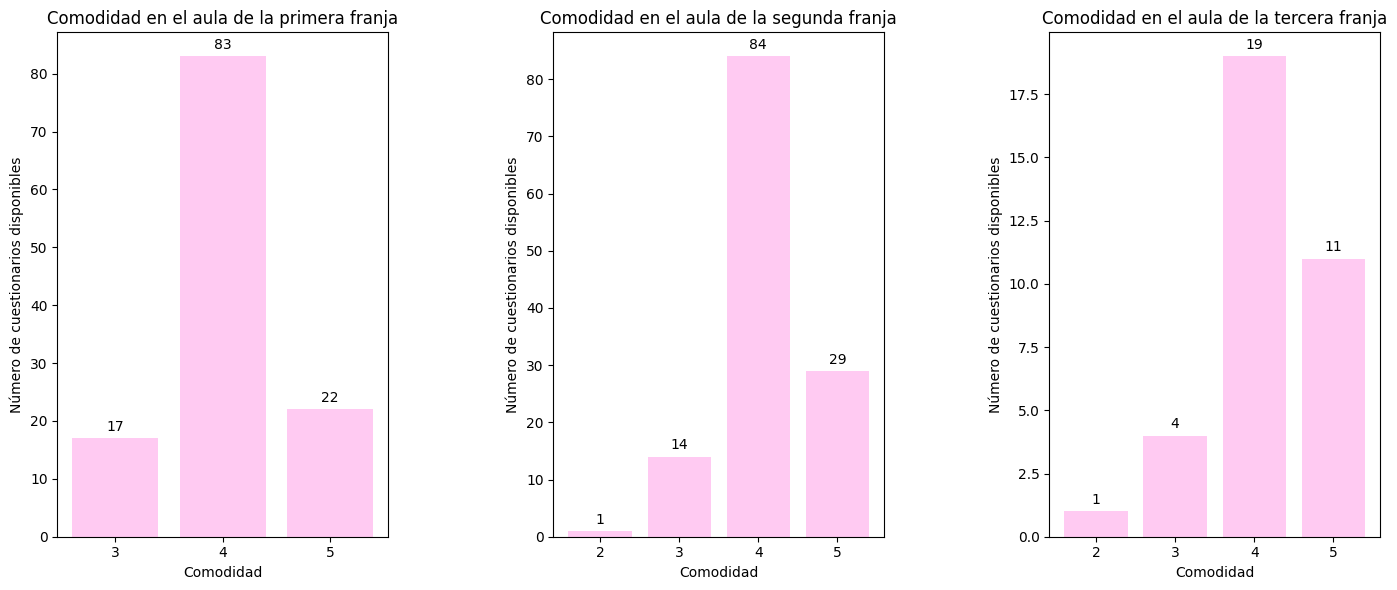

In [ ]:
x = 'Comodidad'
y = 'Número de cuestionarios disponibles'
t = 'Comodidad en el aula'
c = '#ffcaf2'
columna = 'Comodidad_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponene de muestras donde se refleje un aula nada cómoda para ninguna de las tres franjas.

No se disponene de muestras donde se refleje un aula poco cómoda para la primera franja.



##### Docencia

En esta sección, se analiza la variable de docencia del aula, es decir, el grado de aceptación de la afirmación *La docencia impartida en la clase me ha parecido buena*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   24 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   82 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  16 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   20 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   77 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  30 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   2 cuestionario refleja estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  20 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  13 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

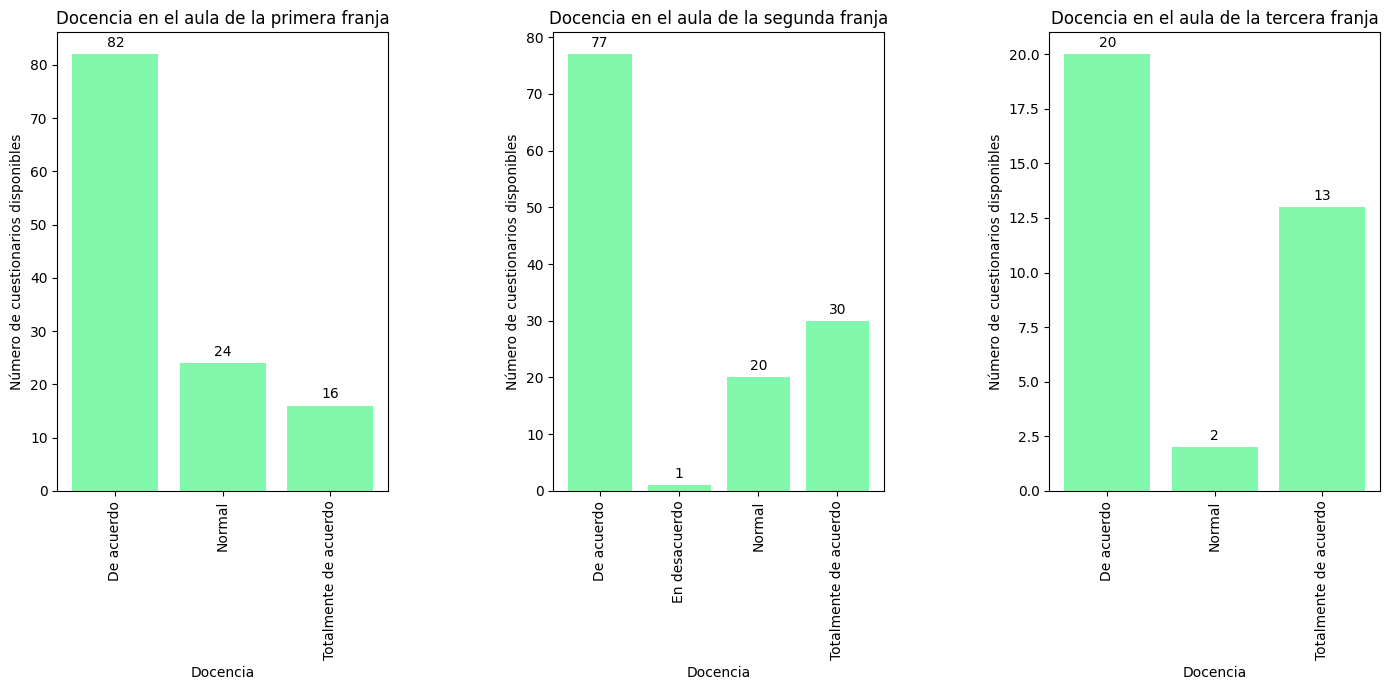

In [ ]:
x = 'Docencia'
y = 'Número de cuestionarios disponibles'
t = 'Docencia en el aula'
c = '#82f8ad'
columna = 'Docencia'
tam = (14, 7)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para ninguna de las tres franjas.

No se disponen de muestras donde se refleje estar en desacuerdo con la afirmación planteada para la primera y tercera franjas.

##### E_anímico

En esta sección, se analiza la variable de estado anímico del aula, es decir, el grado de aceptación de la afirmación *Mi estado ANÍMICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   25 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  83 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  12 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   21 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  84 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  21 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  24 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  9 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

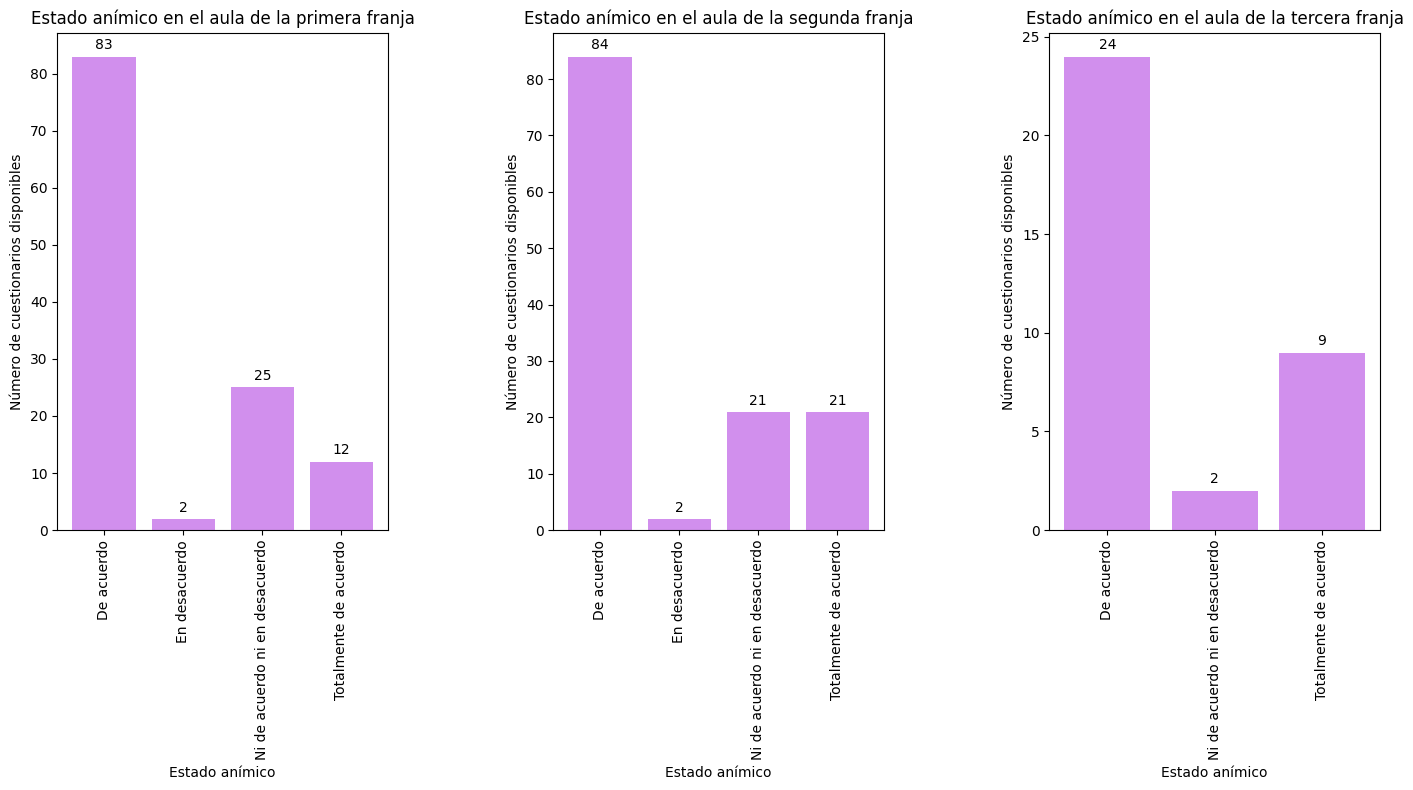

In [ ]:
x = 'Estado anímico'
y = 'Número de cuestionarios disponibles'
t = 'Estado anímico en el aula'
c = '#d18fed'
columna = 'E_anímico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para ninguna de las tres franjas.

No se disponen de muestras donde se refleje estar en desacuerdo con la afirmación planteada para la tercera franja.



##### E_físico

En esta sección, se analiza la variable de estado físico del aula, es decir, el grado de aceptación de la afirmación *Mi estado FÍSICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 9:00:00-11:00:00, se disponen de 122 cuestionarios con la siguiente distribución:

  * 1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   19 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  90 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  10 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 11:00:00-13:00:00, se disponen de 128 cuestionarios con la siguiente distribución:

  * 1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   11 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  88 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  25 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 13:00:00-15:00:00, se disponen de 35 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   1 cuestionario refleja estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  27 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  6 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

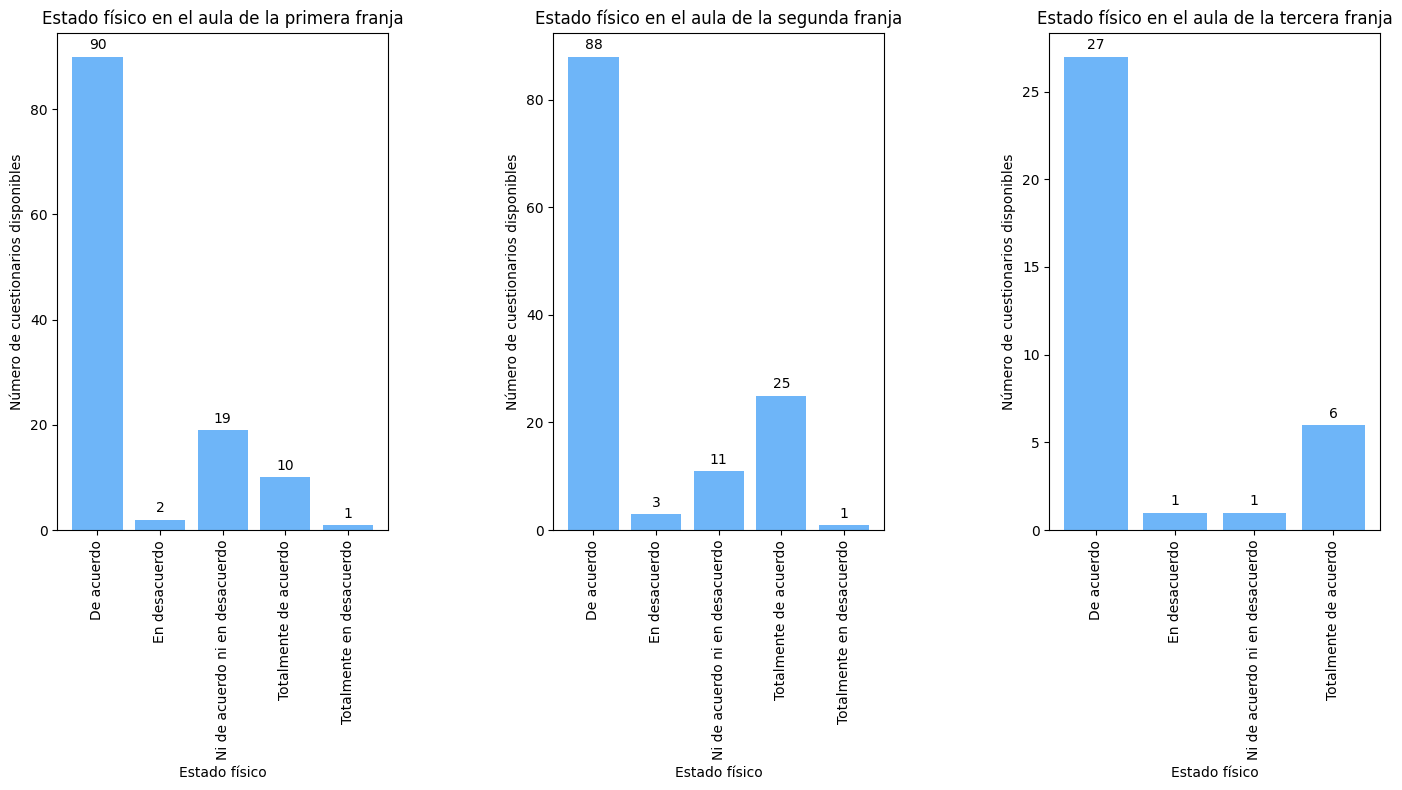

In [ ]:
x = 'Estado físico'
y = 'Número de cuestionarios disponibles'
t = 'Estado físico en el aula'
c = '#6eb5f8'
columna = 'E_físico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para la tercera franja.



#### Análisis de correlación inicial

En esta sección, se realiza un análisi preliminar de las variables del conjunto de datos de entrada para determinar si, en primera instancia, existe algún tipo de realción entre las mismas.

In [ ]:
columnas_numericas = df_3304M.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()
print(correlation_matrix)

                   Cortinas_abiertas  Luminosidad     Ruido  Temperatura  \
Cortinas_abiertas           1.000000     0.172241 -0.101472     0.250413   
Luminosidad                 0.172241     1.000000  0.033380    -0.000250   
Ruido                      -0.101472     0.033380  1.000000    -0.020706   
Temperatura                 0.250413    -0.000250 -0.020706     1.000000   
Ambiente_cargado            0.062895     0.142039  0.087862    -0.064442   
Ocupación_aula              0.044784     0.016533 -0.205233     0.092736   
Comodidad_aula              0.156506     0.031362  0.028159     0.484075   

                   Ambiente_cargado  Ocupación_aula  Comodidad_aula  
Cortinas_abiertas          0.062895        0.044784        0.156506  
Luminosidad                0.142039        0.016533        0.031362  
Ruido                      0.087862       -0.205233        0.028159  
Temperatura               -0.064442        0.092736        0.484075  
Ambiente_cargado           1.000000      

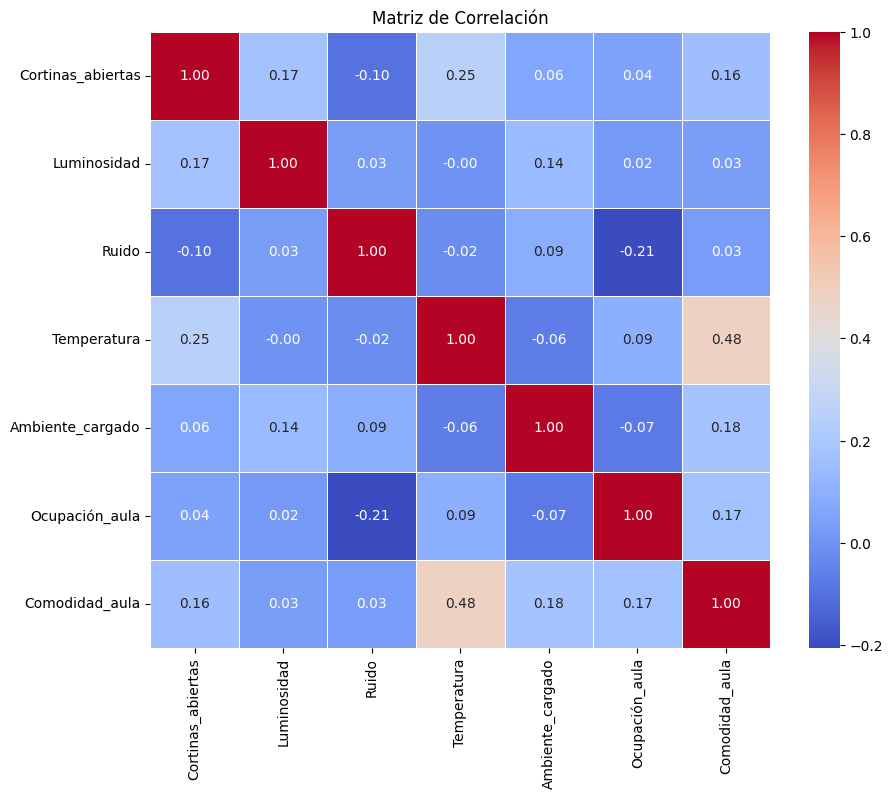

In [ ]:
columnas_numericas = df_3304M.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

Tal y como puede observarse, la mayor parte de las variables no parecen presentar relación entre sí. Es cierto que se muestran algunas correlaciones negativas pero tienen valores muy cercanos a 0. La correlación más alta se encuentra presente entre la variable comodidad del aula y temperatura con un valor de 0,48.

#### Almacenamiento de los datos

Para facilitar el uso posterior de los datos, se almacenan en un fichero csv en Google Drive. Se elimina la columna de Grados_AACC puesto que prácticamente toda la columna se encuentra vacía y por tanto no resulta de interés para futuros experimentos. De la misma manera, puesto que los futuros experimentos se centrarán en el consumo energético y comodidad y bienestar del alumno en el aula, se elimina de la misma manera la columna de calidad docente.

In [ ]:
df_3304M = df_3304M.drop(columns=['Grados_AACC', 'Docencia'])
df_3304M

Date       HIC       HFC Mota                               Puesto  \
0   2023-11-07   9:00:00  11:00:00   M1            Quinta fila, lado derecho   
1   2023-11-07   9:00:00  11:00:00   M1                  Quinta fila derecha   
2   2023-11-07   9:00:00  11:00:00   M1                                Pc 21   
3   2023-11-07   9:00:00  11:00:00   M1                            5008 04 3   
4   2023-11-07   9:00:00  11:00:00   M2                                 pc25   
..         ...       ...       ...  ...                                  ...   
280 2024-03-08  13:00:00  15:00:00   M2        5º fila parte izquierda medio   
281 2024-03-19  11:00:00  13:00:00   M2  4º fila parte izquierda, izquierda    
282 2024-03-13  11:00:00  13:00:00   M2        5º fila parte izquierda medio   
283 2024-03-13  13:00:00  15:00:00   M2       6ª fila parte izquierda centro   
290 2024-03-14  11:00:00  13:00:00   M3       7º fila parte izquierda centro   

    Luces_apagadas  Cortinas_abiertas  Luminosidad  Ruido AACC_enc  \
0               No                4.0            5      4       No   
1               No                4.0            5      4       No   
2               No                5.0            5      5       No   
3               No                2.0            5      4       No   
4               No                3.0            4      3       No   
..             ...                ...          ...    ...      ...   
280             Sí                4.0            5      3       No   
281             Sí                4.0            5      4       No   
282             No                5.0            4      4       No   
283             No                4.0            5      1       No   
290             Sí                5.0            4      2       No   

    Calefacción_enc Ventanas_abiertas  Temperatura  Ambiente_cargado  \
0                No                No            5                 3   
1                No                No            4                 3   
2                No                No            3                 5   
3                Sí                No            5                 4   
4                No                No            4                 4   
..              ...               ...          ...               ...   
280              No      Parcialmente            5                 1   
281              No      Parcialmente            5                 4   
282              No      Parcialmente            5                 5   
283              No      Parcialmente            5                 1   
290              No      Parcialmente            5                 5   

     Ocupación_aula  Comodidad_aula                       E_anímico  \
0                 4               4                      De acuerdo   
1                 3               4  Ni de acuerdo ni en desacuerdo   
2                 3               3                      De acuerdo   
3                 3               4                      De acuerdo   
4                 3               4                      De acuerdo   
..              ...             ...                             ...   
280               5               4           Totalmente de acuerdo   
281               4               4                      De acuerdo   
282               4               5                      De acuerdo   
283               5               4                      De acuerdo   
290               5               5           Totalmente de acuerdo   

                            Sentimiento_ánimo               E_físico  \
0                                      Normal  Totalmente de acuerdo   
1                                      Normal  Totalmente de acuerdo   
2                              Normal;Cansado             De acuerdo   
3                            Motivado;Cansado  Totalmente de acuerdo   
4                             Contento;Normal             De acuerdo   
..                                        ...             

In [ ]:
df_3304M.to_csv('/content/drive/My Drive/TFM/Datos_Finales/3304M.csv', index=False, sep=';')

### Grupo de tarde

#### Carga y preparación de los datos

Comenzamos analizando los datos del aula 3304 del grupo de tarde. Para ello, cargamos los datos almacenados en su correspondiente archivo de Google Drive.

In [ ]:
r_3304T = "/content/drive/My Drive/TFM/Cuestionarios/3304T/3304T_m.csv"

In [ ]:
df_3304T = pd.read_csv(r_3304T, sep=';', encoding='utf-8')
df_3304T.head(1)

Marca temporal  \
0  2023/11/06 8:02:09 p. m. EET   

                                 Apellidos, Nombre:  Aula:      Fecha:  \
0  Martim Maria de Saavedra Temes da Costa Loureiro   3304  06/11/2023   

  Hora Inicio Clase Hora Fin Clase Mota  \
0          17:00:00       19:00:00   M2   

  Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0          5008 04 9(1 era fila izquierda)                          No   

   ¿Están las cortinas abiertas?  ...  ¿Están las ventanas abiertas?  \
0                              3  ...                   Parcialmente   

   La temperatura del aula durante la clase ha sido  \
0                                                 4   

  ¿Se ha notado un ambiente cargado?  \
0                                  4   

   En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  4          

  En general, durante la clase, el aula me ha parecido...  \
0                                                  4        

  La docencia impartida en la clase me ha parecido buena:  \
0                              Totalmente de acuerdo        

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

   Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                            Normal;Cansado;Aburrido                                                    

   Mi estado FÍSICO durante la clase ha sido bueno  \
0                                       De acuerdo   

   Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                             Normal                                                 

[1 rows x 25 columns]

Una vez cargados los datos, en primer lugar, se eliminan las columnas que no son de interés para el análisis en cuestión. Además, mediante el borrado de la columna que contiene el nombre y los apellidos del alumno que rellena el cuestionario y la columna del aula a la que pertenece, se consigue la anonimización completa de los datos.

In [ ]:
df_3304T = df_3304T.drop(columns=['Marca temporal', 'Apellidos, Nombre:', 'Aula:'])
df_3304T.head(1)

Fecha: Hora Inicio Clase Hora Fin Clase Mota  \
0  06/11/2023          17:00:00       19:00:00   M2   

  Puesto del aula en el que estás sentado: ¿Están las luces  apagadas?  \
0          5008 04 9(1 era fila izquierda)                          No   

   ¿Están las cortinas abiertas?  La luminosidad durante la clase ha sido  \
0                              3                                        5   

   Nivel de ruido durante la clase ¿Está el aire acondicionado encendido?  \
0                                4                                     No   

   ...  ¿Están las ventanas abiertas?  \
0  ...                   Parcialmente   

  La temperatura del aula durante la clase ha sido  \
0                                                4   

  ¿Se ha notado un ambiente cargado?  \
0                                  4   

   En cuanto a ocupación del aula, dirías que el aula está:  \
0                                                  4          

   En general, durante la clase, el aula me ha parecido...  \
0                                                  4         

   La docencia impartida en la clase me ha parecido buena:  \
0                              Totalmente de acuerdo         

   Mi estado ANÍMICO durante la clase ha sido bueno  \
0                                        De acuerdo   

  Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  \
0                            Normal;Cansado;Aburrido                                                   

  Mi estado FÍSICO durante la clase ha sido bueno  \
0                                      De acuerdo   

  Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas  
0                                             Normal                                                

[1 rows x 22 columns]

In [ ]:
df_3304T.columns

Index(['Fecha:', 'Hora Inicio Clase', 'Hora Fin Clase', 'Mota',
       'Puesto del aula en el que estás sentado:',
       '¿Están las luces  apagadas?', '¿Están las cortinas abiertas?',
       'La luminosidad durante la clase ha sido',
       'Nivel de ruido durante la clase',
       '¿Está el aire acondicionado encendido?',
       'En caso afirmativo,  indica los grados si los puedes identificar:',
       '¿Está la calefacción encendida?', '¿Están las ventanas abiertas?',
       'La temperatura del aula durante la clase ha sido',
       '¿Se ha notado un ambiente cargado?',
       'En cuanto a ocupación del aula, dirías que el aula está:',
       'En general, durante la clase, el aula me ha parecido...',
       'La docencia impartida en la clase me ha parecido buena:',
       'Mi estado ANÍMICO durante la clase ha sido bueno',
       'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas',
       'Mi estado FÍSICO durante la clase ha sido b

Como puede observarse, como nombres de las columnas del DataFrame se mantienen las preguntas del cuestionario. Para facilitar el acceso y manejo de dichas columnas, se ha decidido renombrarlas con nombres más cortos que permitan de igual modo su correcta y completa identificación.

In [ ]:
nuevos_nombres = {'Fecha:': 'Date',
                  'Hora Inicio Clase': 'HIC',
                  'Hora Fin Clase': 'HFC',
                  'Puesto del aula en el que estás sentado:': 'Puesto',
                  '¿Están las luces  apagadas?': 'Luces_apagadas',
                  '¿Están las cortinas abiertas?': 'Cortinas_abiertas',
                  'La luminosidad durante la clase ha sido': 'Luminosidad',
                  'Nivel de ruido durante la clase': 'Ruido',
                  '¿Está el aire acondicionado encendido?': 'AACC_enc',
                  'En caso afirmativo,  indica los grados si los puedes identificar:': 'Grados_AACC',
                  '¿Está la calefacción encendida?': 'Calefacción_enc',
                  '¿Están las ventanas abiertas?': 'Ventanas_abiertas',
                  'La temperatura del aula durante la clase ha sido': 'Temperatura',
                  '¿Se ha notado un ambiente cargado?': 'Ambiente_cargado',
                  'En cuanto a ocupación del aula, dirías que el aula está:': 'Ocupación_aula',
                  'En general, durante la clase, el aula me ha parecido...': 'Comodidad_aula',
                  'La docencia impartida en la clase me ha parecido buena:': 'Docencia',
                  'Mi estado ANÍMICO durante la clase ha sido bueno': 'E_anímico',
                  'Con respecto a tu estado ANÍMICO ... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_ánimo',
                  'Mi estado FÍSICO durante la clase ha sido bueno': 'E_físico',
                  'Con respecto a tu estado FÍSICO... ¿Cómo te has sentido?\n* Puedes seleccionar VARIAS respuestas': 'Sentimiento_físico'
                  }

df_3304T = df_3304T.rename(columns=nuevos_nombres)
df_3304T.head(1)

Date       HIC       HFC Mota                           Puesto  \
0  06/11/2023  17:00:00  19:00:00   M2  5008 04 9(1 era fila izquierda)   

  Luces_apagadas  Cortinas_abiertas  Luminosidad  Ruido AACC_enc  ...  \
0             No                  3            5      4       No  ...   

   Ventanas_abiertas Temperatura Ambiente_cargado  Ocupación_aula  \
0       Parcialmente           4                4               4   

   Comodidad_aula               Docencia   E_anímico        Sentimiento_ánimo  \
0               4  Totalmente de acuerdo  De acuerdo  Normal;Cansado;Aburrido   

     E_físico Sentimiento_físico  
0  De acuerdo             Normal  

[1 rows x 22 columns]

In [ ]:
df_3304T.columns

Index(['Date', 'HIC', 'HFC', 'Mota', 'Puesto', 'Luces_apagadas',
       'Cortinas_abiertas', 'Luminosidad', 'Ruido', 'AACC_enc', 'Grados_AACC',
       'Calefacción_enc', 'Ventanas_abiertas', 'Temperatura',
       'Ambiente_cargado', 'Ocupación_aula', 'Comodidad_aula', 'Docencia',
       'E_anímico', 'Sentimiento_ánimo', 'E_físico', 'Sentimiento_físico'],
      dtype='object')

In [ ]:
print(f'El DataFrame está formado por {df_3304T.shape[0]} filas y {df_3304T.shape[1]} columnas')

El DataFrame está formado por 104 filas y 22 columnas


#### Análisis de los datos

Una vez finalizada la preparación de los datos, es posible comenzar con su análisis en profundidad mediante el análisis gráfico de cada una de sus variables.



##### Date

En esta sección se analiza la variable de fecha del cuestionario. Tal y como puede observarse, disponemos de cuestionarios para 17 días. A diferencia de las clases y grupos anteriores, no es necesario eliminar ningún cuestionario puesto que todos pertenecen al periodo de tiempo de interés. Sin embargo, existe un error en el año de la fecha 15/11/2003 que se debe corregir.

In [ ]:
df_3304T['Date'].unique()

array(['06/11/2023', '07/11/2023', '08/11/2023', '13/11/2023',
       '14/11/2023', '15/11/2003', '15/11/2023', '16/11/2023',
       '20/11/2023', '21/11/2023', '22/11/2023', '23/11/2023',
       '27/11/2023', '28/11/2023', '30/11/2023', '29/11/2023',
       '05/02/2024', '06/02/2024'], dtype=object)

In [ ]:
fila_a_cambiar = df_3304T.loc[df_3304T['Date'] == '15/11/2003'].index[0]
df_3304T.loc[fila_a_cambiar, 'Date'] = '15/11/2023'

In [ ]:
len(df_3304T['Date'].unique())

17

In [ ]:
df_3304T['Date'] = pd.to_datetime(df_3304T['Date'], format='%d/%m/%Y')

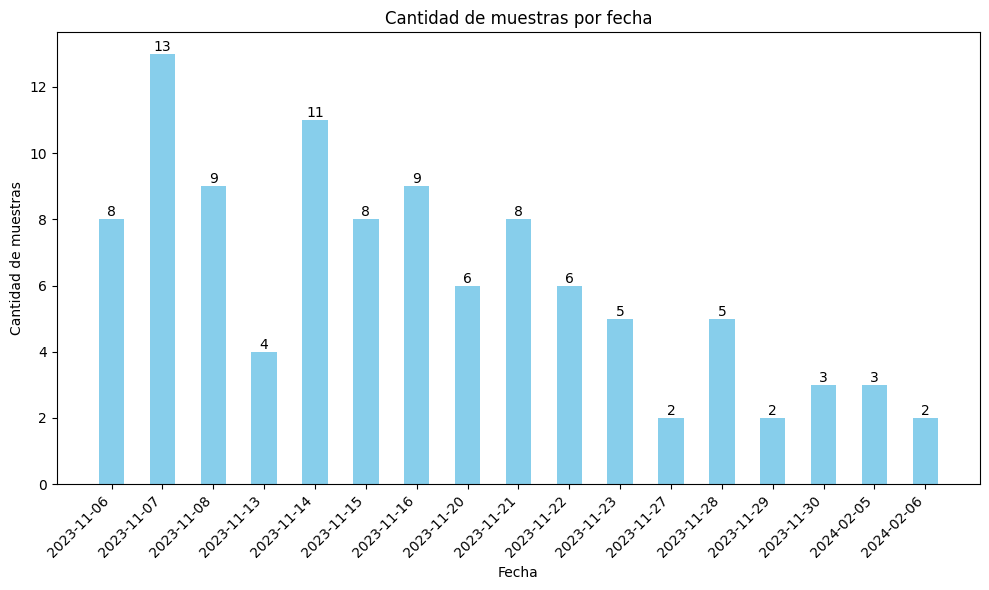

In [ ]:
muestras_por_fecha = df_3304T['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(muestras_por_fecha.index.astype(str), muestras_por_fecha.values, color='skyblue', width=0.5, align='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por fecha')

plt.tight_layout()
plt.show()

##### HIC y HFC

En esta sección se analiza la variable de hora de comienzo y de fin de las clases. Para los datos de este grupo en concreto, la jornada lectiva comienza a las 15:00:00 y finaliza a las 21:00:00. Teniendo esto en cuenta, es posible analizar cuantas muestras o cuestionarios hay disponibles para cada una de las franjas de dos horas que es posible definir: 15:00:00-17:00:00, 17:00:00-19:00:00 y 19:00:00-21:00:00.

In [ ]:
hic = type(df_3304T['HIC'][1])
hfc = type(df_3304T['HFC'][1])

print(f"La columna HIC es de tipo {hic}")
print(f"La columna HIC es de tipo {hfc}")

La columna HIC es de tipo <class 'str'>
La columna HIC es de tipo <class 'str'>


In [ ]:
df_3304T_f1, df_3304T_f2, df_3304T_f3 = get_franjas(df_3304T, False)


Se diponen de 104 cuestionarios en total de los que:
 
26 cuestionarios pertenecen a la franja de 15:00:00 a 17:00:00

42 cuestionarios pertenecen a la franja de 17:00:00 a 19:00:00

36 cuestionarios pertenecen a la franja de 19:00:00 a 21:00:00



Puesto que el resto de variables se analizarán de manera independiente para cada una de las tres franjas horarias definidas. Para facilitar dicho análisis y el acceso a los datos, los tres DataFrames generados se almacenan en un diccionario.

In [ ]:
data_frames_franjas = {'df1': df_3304T_f1,
                      'df2': df_3304T_f2,
                      'df3': df_3304T_f3}

##### Ocupación_aula

En esta sección, se analiza la variable de grado de ocupación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan un grado de ocupación de 2.
  *   13 cuestionarios reflejan un grado de ocupación de 3.
  *   8 cuestionarios reflejan un grado de ocupación de 4.
  *   3 cuestionarios reflejan un grado de ocupación de 5.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   13 cuestionarios reflejan un grado de ocupación de 2.
  *   20 cuestionarios reflejan un grado de ocupación de 3.
  *   9 cuestionarios reflejan un grado de ocupación de 4.


* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan un grado de ocupación de 1.
  *   14 cuestionarios reflejan un grado de ocupación de 2.
  *   10 cuestionarios reflejan un grado de ocupación de 3.
  *   8 cuestionarios reflejan un grado de ocupación de 4.
  *   2 cuestionarios reflejan un grado de ocupación de 5.

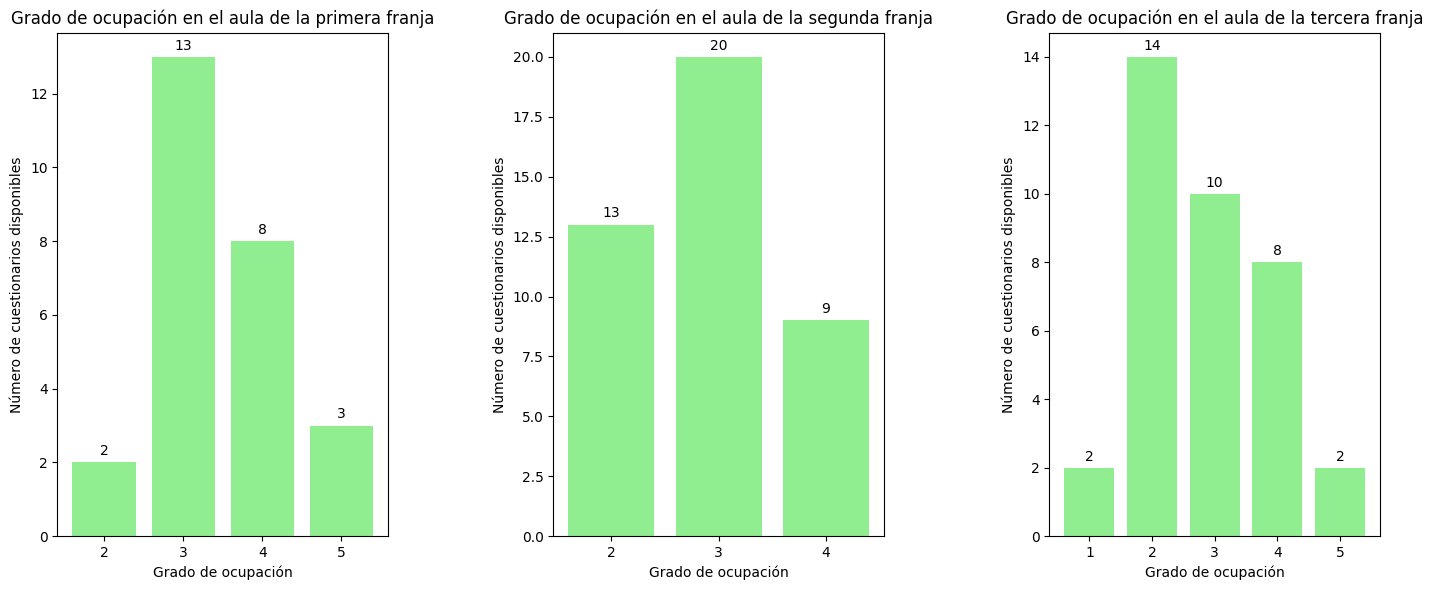

In [ ]:
x = 'Grado de ocupación'
y = 'Número de cuestionarios disponibles'
t = 'Grado de ocupación en el aula'
c = 'lightgreen'
columna = 'Ocupación_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna )

No se dispone de muestras donde se refleje un grado de ocupación 5 para la segunda franja.

No se dispone de muestras donde se refleje un grado de ocupación 1 para la primera y segunda franja.


##### Luces_apagadas

En esta sección, se analiza la variable de iluminación del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  * 24 reflejan que las luces estaban encendidas en el aula.
  * 2 reflejan que las luces estaban apagadas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  * 40 reflejan que las luces estaban encendidas en el aula.
  * 2 reflejan que las luces estaban apagadas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  * 34 reflejan que las luces estaban encendidas en el aula.
  * 2 reflejan que las luces estaban apagadas en el aula.

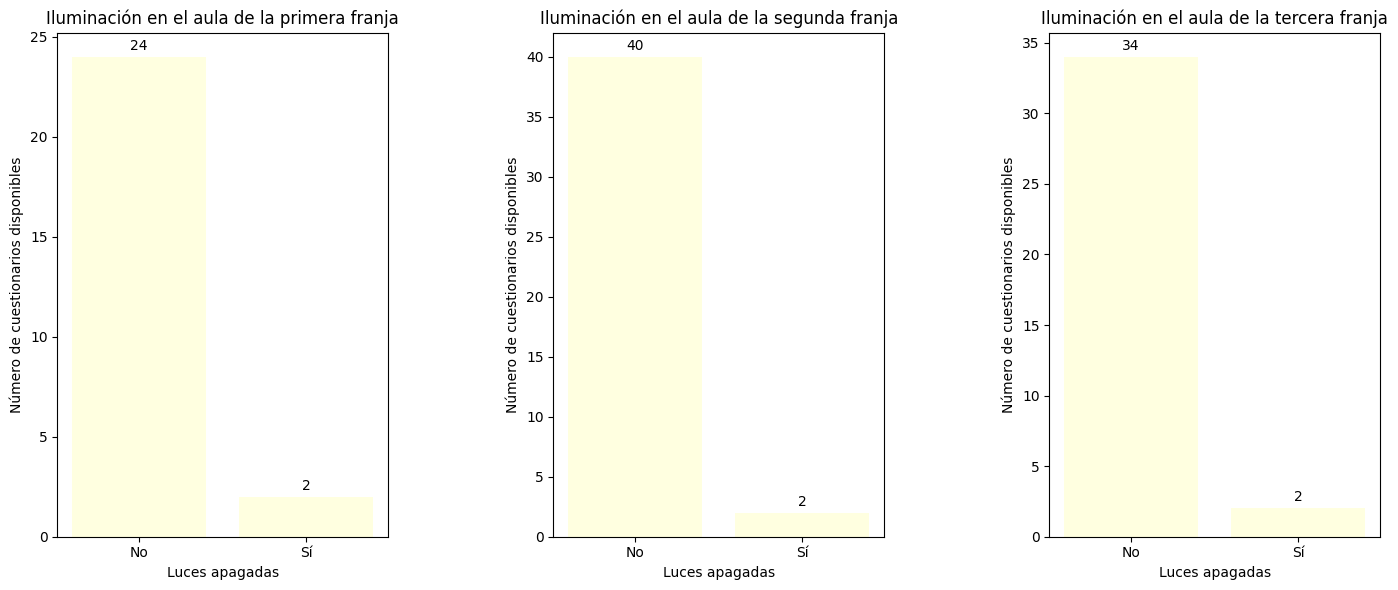

In [ ]:
x = 'Luces apagadas'
y = 'Número de cuestionarios disponibles'
t = 'Iluminación en el aula'
c = 'lightyellow'
columna = 'Luces_apagadas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

##### Cortinas_abiertas

En esta sección, se analiza la variable de apertura de cortinas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  * 1 refleja todas las cortinas cerradas en el aula.
  * 3 reflejan más cortinas cerradas que abiertas en el aula.
  * 17 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 4 reflejan más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  * 7 reflejan más cortinas cerradas que abiertas en el aula.
  * 33 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 1 refleja más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  * 2 reflejan todas las cortinas cerradas en el aula.
  * 8 reflejan más cortinas cerradas que abiertas en el aula.
  * 24 reflejan que la mitad de cortinas estaban abiertas y la mitad cerradas en el aula.
  * 1 refleja más cortinas abiertas que cerradas en el aula.
  * 1 refleja todas las cortinas abiertas en el aula.

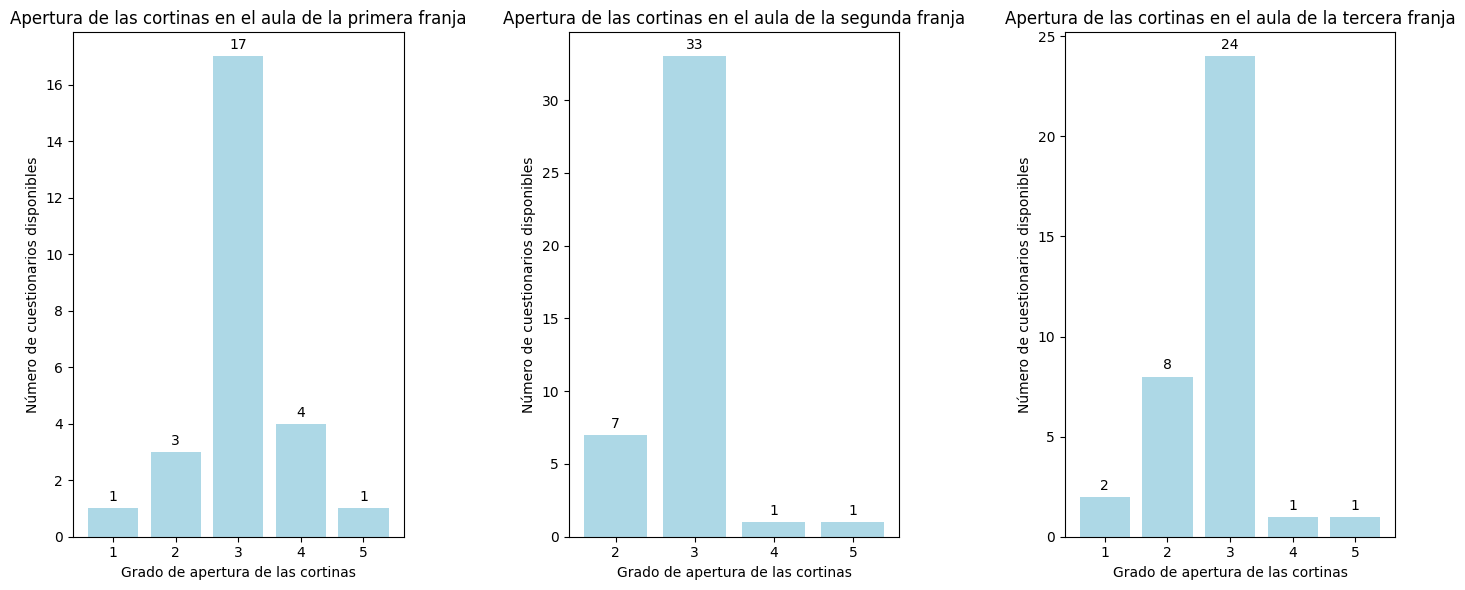

In [ ]:
x = 'Grado de apertura de las cortinas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las cortinas en el aula'
c = 'lightblue'
columna = 'Cortinas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se dispone de muestras donde se reflejen todas las cortinas cerradas para la segunda franja.



##### Luminosidad

En esta sección, se analiza la variable de luminosidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan una luminosidad normal.
  *   8 cuestionarios reflejan una luminosidad adecuada.
  *   16 cuestionarios reflejan una luminosidad totalmente adecuada.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan una luminosidad normal.
  *   6 cuestionarios reflejan una luminosidad adecuada.
  *   33 cuestionarios reflejan una luminosidad totalmente adecuada.
* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan una luminosidad normal.
  *   5 cuestionarios reflejan una luminosidad adecuada.
  *   25 cuestionarios reflejan una luminosidad totalmente adecuada.


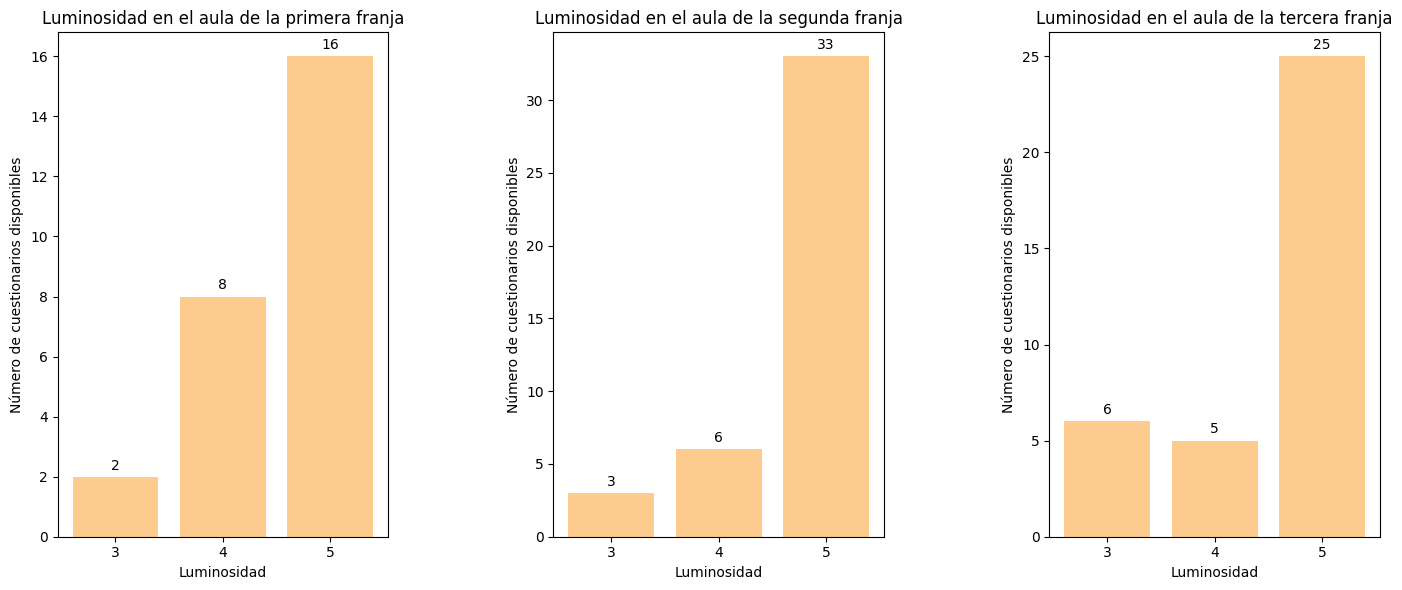

In [ ]:
x = 'Luminosidad'
y = 'Número de cuestionarios disponibles'
t = 'Luminosidad en el aula'
c = '#fdcb8e'
columna = 'Luminosidad'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje una luminosidad inadecuada o completamente inadecuada para ninguna de las tres franjas.



##### Ruido

En esta sección, se analiza la variable de ruido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un nivel de ruido inadecuado.
  *   5 cuestionarios reflejan un nivel de ruido normal.
  *   8 cuestionarios reflejan un nivel de ruido adecuado.
  *   12 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un nivel de ruido inadecuado.
  *   5 cuestionarios reflejan un nivel de ruido normal.
  *   18 cuestionarios reflejan un nivel de ruido adecuado.
  *   18 cuestionarios reflejan un nivel de ruido totalmente adecuado.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un nivel de ruido totalmente inadecuado.
  *   3 cuestionarios reflejan un nivel de ruido inadecuado.
  *   7 cuestionarios reflejan un nivel de ruido normal.
  *   7 cuestionarios reflejan un nivel de ruido adecuado.
  *   18 cuestionarios reflejan un nivel de ruido totalmente adecuado.

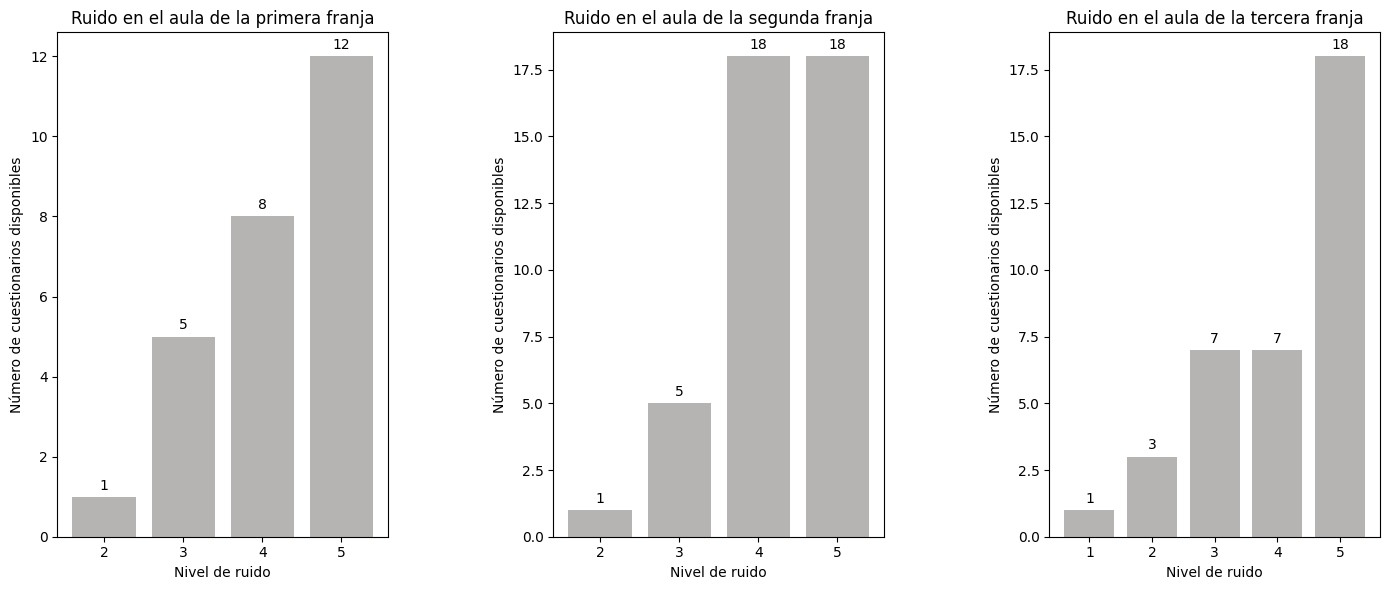

In [ ]:
x = 'Nivel de ruido'
y = 'Número de cuestionarios disponibles'
t = 'Ruido en el aula'
c = '#b5b4b3'
columna = 'Ruido'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)


No se disponen de muestras donde se refleje un ruido en el aula completamente inadecuado para la primera y segunda franjas.




##### AACC_enc

En esta sección, se analiza la variable de aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  * 25 reflejan el aire acondicionado en el aula apagado.
  * 1 refleja el aire acondicionado en el aula encendido.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  * 40 reflejan el aire acondicionado en el aula apagado.
  * 2 reflejan el aire acondicionado en el aula encendido.
.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios. Todos ellos reflejan el aire acondicionado en el aula apagado.

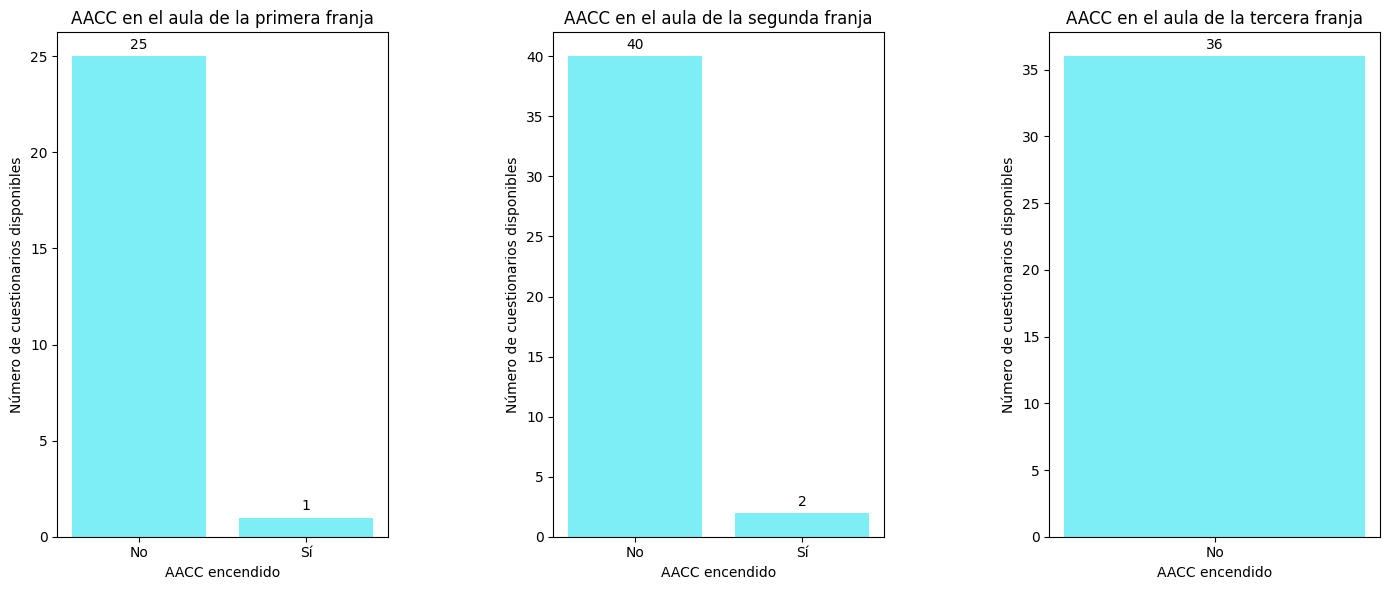

In [ ]:
x = 'AACC encendido'
y = 'Número de cuestionarios disponibles'
t = 'AACC en el aula'
c = '#7deef6'
columna = 'AACC_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se disponen de muestras donde se refleje el aire acondicionado del aula encendido para la tercera franja.

##### Grados_AACC

En esta sección, se analiza la variable de grados del aire acondicionado encendido del aula para cada una de las tres franjas horarias definidas anteriormente. Tal y como puede observarse, no existen datos para ninguna de las muestras. Esta columna se encuentra completamente vacía.

In [ ]:
df_3304T_f1['Grados_AACC'].unique()

array([nan])

In [ ]:
df_3304T_f2['Grados_AACC'].unique()

array([nan])

In [ ]:
df_3304T_f3['Grados_AACC'].unique()

array([nan])

##### Calefacción_enc

En esta sección, se analiza la variable de calefacción encendida del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:
  * 19 reflejan la calefacción apagada en el aula.
  * 7 reflejan la calefacción encendida en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:
  * 34 reflejan la calefacción apagada en el aula.
  * 8 reflejan la calefacción encendida en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:
  * 26 reflejan la calefacción apagada en el aula.
  * 10 reflejan la calefacción encendida en el aula.

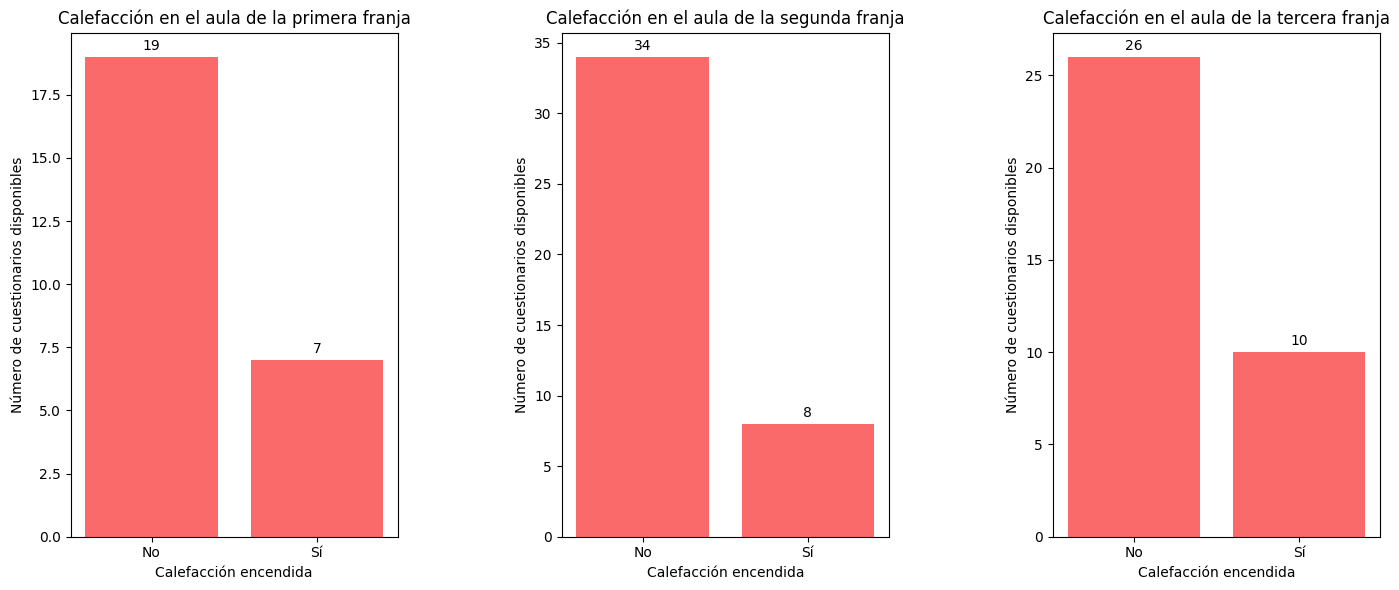

In [ ]:
x = 'Calefacción encendida'
y = 'Número de cuestionarios disponibles'
t = 'Calefacción en el aula'
c = '#fb6a6a'
columna = 'Calefacción_enc'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

##### Ventanas_abiertas

En esta sección, se analiza la variable de ventanas abiertas del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  * 15 reflejan las ventanas cerradas en el aula.
  * 9 reflejan las ventanas parcialmente abiertas en el aula.
  * 2 reflejan las ventanas abiertas en el aula.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  * 20 reflejan las ventanas cerradas en el aula.
  * 22 reflejan las ventanas parcialmente abiertas en el aula.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  * 17 reflejan las ventanas cerradas en el aula.
  * 18 reflejan las ventanas parcialmente abiertas en el aula.
  * 1 refleja las ventanas abiertas en el aula.

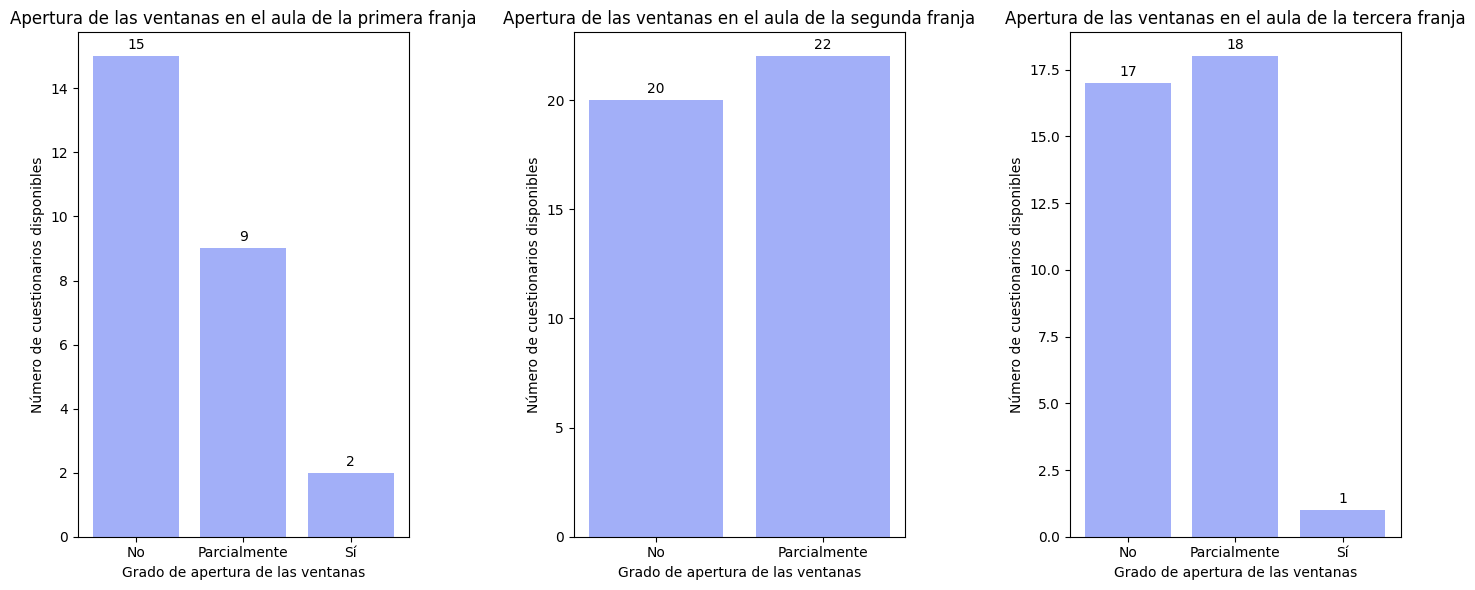

In [ ]:
x = 'Grado de apertura de las ventanas'
y = 'Número de cuestionarios disponibles'
t = 'Apertura de las ventanas en el aula'
c = '#a2aff8'
columna = 'Ventanas_abiertas'

pinta_figuras(data_frames_franjas, x, y, t, c, columna, numerica=False)

No se dispone de muestras donde se reflejen las ventanas completamente abiertas en el aula para la segunda franja.

##### Temperatura

En esta sección, se analiza la variable de temperatura del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan una temperatura inadecuada.
  *   3 cuestionarios reflejan una temperatura normal.
  *   7 cuestionarios reflejan una temperatura adecuada.
  *   14 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan una temperatura inadecuada.
  *   2 cuestionarios reflejan una temperatura normal.
  *   19 cuestionarios reflejan una temperatura adecuada.
  *   19 cuestionarios reflejan una temperatura totalmente adecuada.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan una temperatura inadecuada.
  *   7 cuestionarios reflejan una temperatura normal.
  *   13 cuestionarios reflejan una temperatura adecuada.
  *   13 cuestionarios reflejan una temperatura totalmente adecuada.

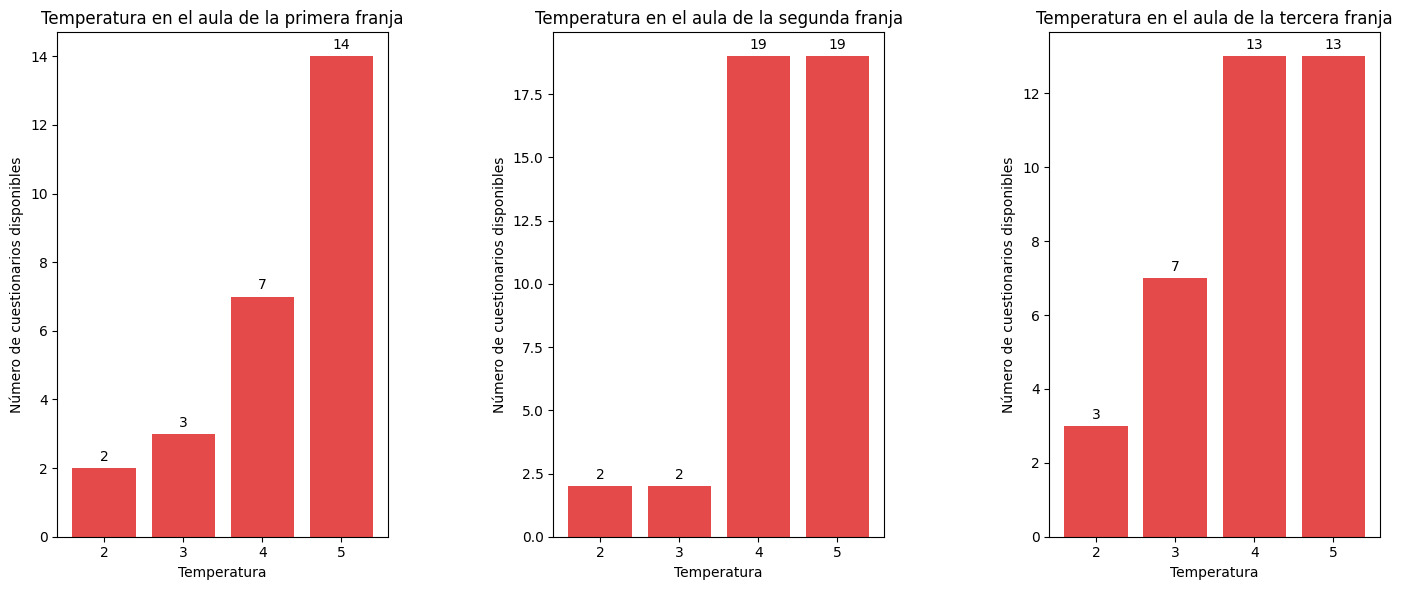

In [ ]:
x = 'Temperatura'
y = 'Número de cuestionarios disponibles'
t = 'Temperatura en el aula'
c = '#e44a4a'
columna = 'Temperatura'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se reflejen un nivel de temperatura en el aula completamente inadecuado para ninguna de las tres franjas.


##### Ambiente_cargado

En esta sección, se analiza la variable de ambiente cargado del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   6 cuestionarios reflejan un ambiente normal.
  *   7 cuestionarios reflejan un ambiente poco cargado.
  *   13 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un ambiente muy cargado.
  *   2 cuestionarios reflejan un ambiente cargado.
  *   7 cuestionarios reflejan un ambiente normal.
  *   11 cuestionarios reflejan un ambiente poco cargado.
  *   21 cuestionarios reflejan un ambiente nada cargado.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un ambiente cargado.
  *   8 cuestionarios reflejan un ambiente normal.
  *   8 cuestionarios reflejan un ambiente poco cargado.
  *   17 cuestionarios reflejan un ambiente nada cargado.

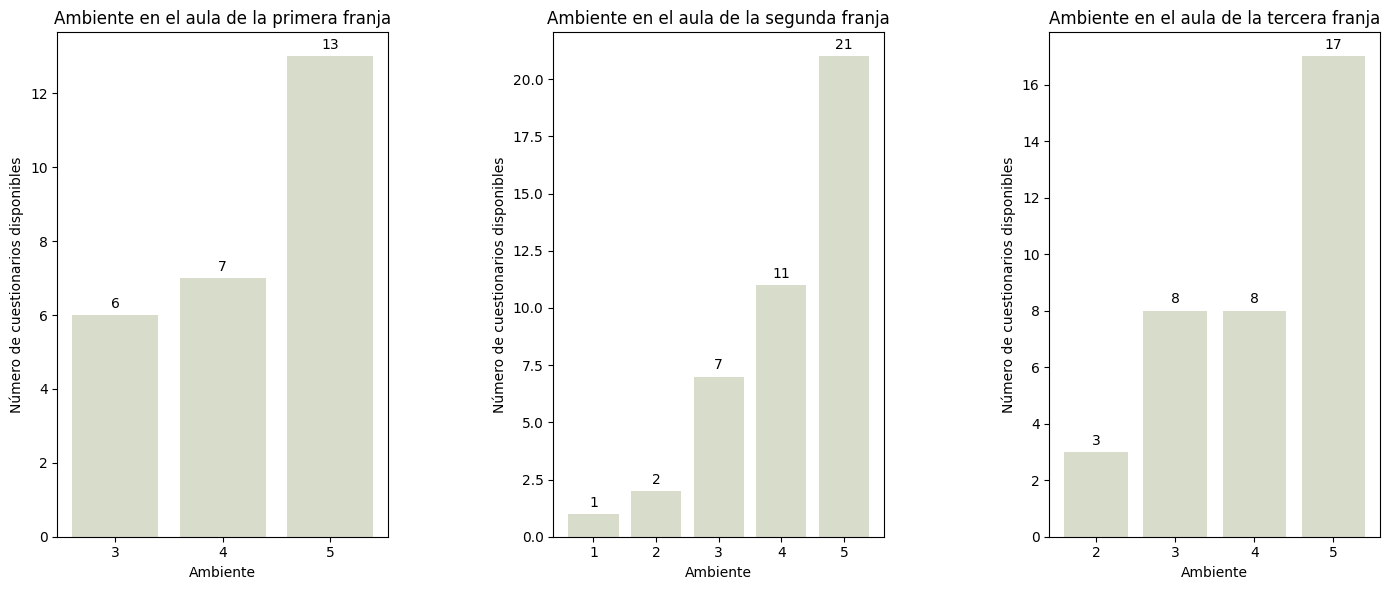

In [ ]:
x = 'Ambiente'
y = 'Número de cuestionarios disponibles'
t = 'Ambiente en el aula'
c = '#d8dccb'
columna = 'Ambiente_cargado'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponen de muestras donde se refleje un ambierte muy cargado en el aula para la primera y tercera franja.

No se disponen de muestras donde se refleje un ambierte cargado en el aula para la primera franja.

##### Comodidad_aula

En esta sección, se analiza la variable de comodidad del aula para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan un aula normal.
  *   13 cuestionarios reflejan un aula cómoda.
  *   9 cuestionarios reflejan un aula totalmente cómoda.


* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan un aula normal.
  *   21 cuestionarios reflejan un aula cómoda.
  *   18 cuestionarios reflejan un aula totalmente cómoda.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja un aula poco cómoda.
  *   6 cuestionarios reflejan un aula normal.
  *   12 cuestionarios reflejan un aula cómoda.
  *   17 cuestionarios reflejan un aula totalmente cómoda.


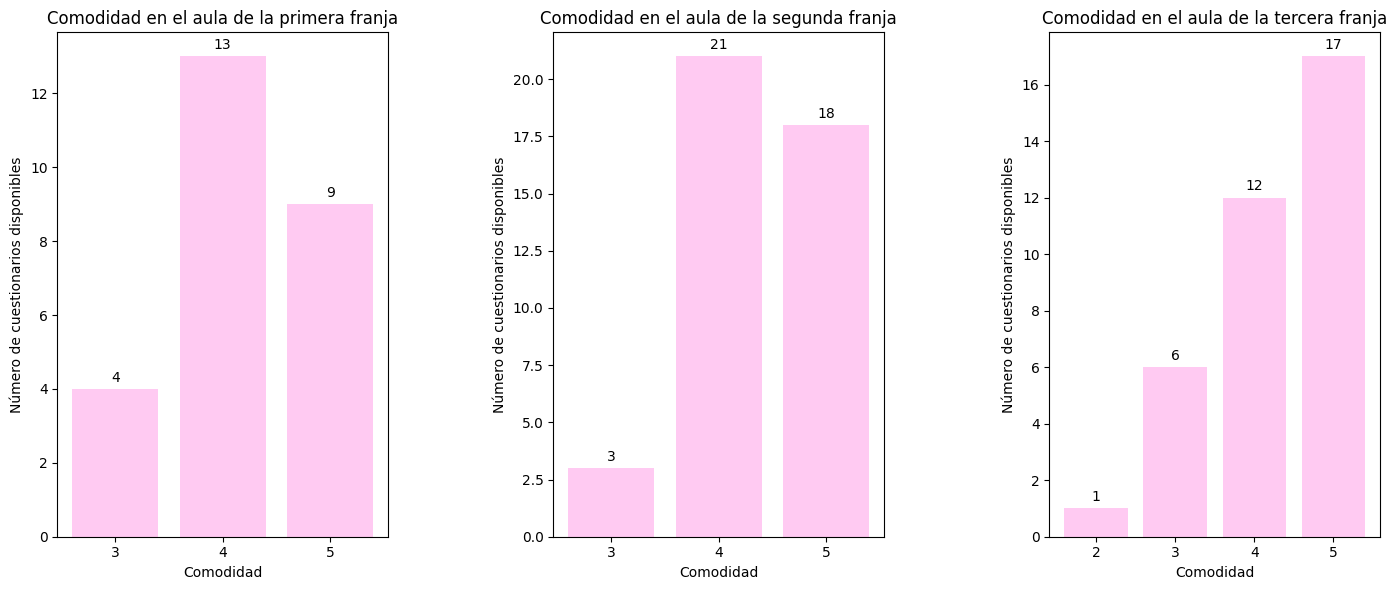

In [ ]:
x = 'Comodidad'
y = 'Número de cuestionarios disponibles'
t = 'Comodidad en el aula'
c = '#ffcaf2'
columna = 'Comodidad_aula'

pinta_figuras(data_frames_franjas, x, y, t, c, columna)

No se disponene de muestras donde se refleje un aula nada cómoda para ninguna de las tres franjas.

No se disponene de muestras donde se refleje un aula poco cómoda para la primera y segunda franja.

##### Docencia

En esta sección, se analiza la variable de docencia del aula, es decir, el grado de aceptación de la afirmación *La docencia impartida en la clase me ha parecido buena*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   10 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  6 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  9 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   1 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   7 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  10 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  23 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   3 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   8 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *   5 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  20 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

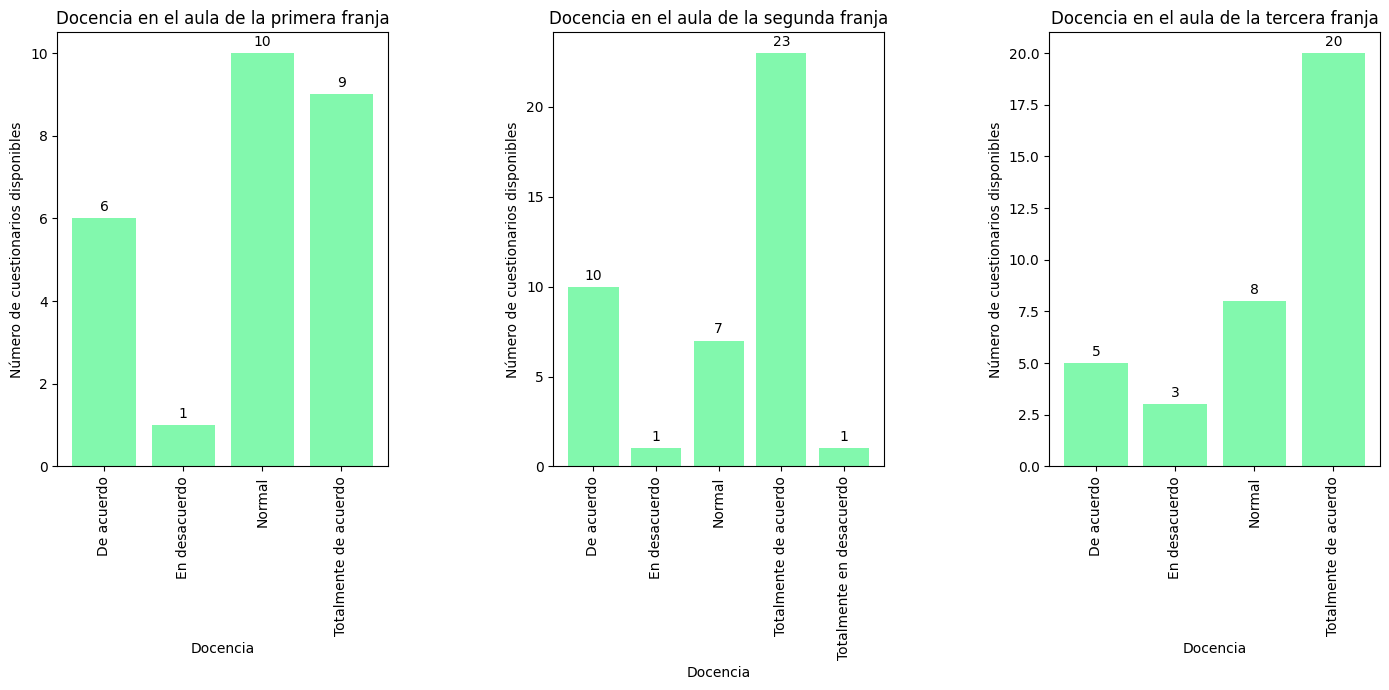

In [ ]:
x = 'Docencia'
y = 'Número de cuestionarios disponibles'
t = 'Docencia en el aula'
c = '#82f8ad'
columna = 'Docencia'
tam = (14, 7)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la primera y tercera franja.

##### E_anímico

En esta sección, se analiza la variable de estado anímico del aula, es decir, el grado de aceptación de la afirmación *Mi estado ANÍMICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   4 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  11 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  8 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   2 cuestionario refleja estar en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  22 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  15 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar totalmente en desacuerdo con la afirmación.
  *   6 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  15 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  14 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

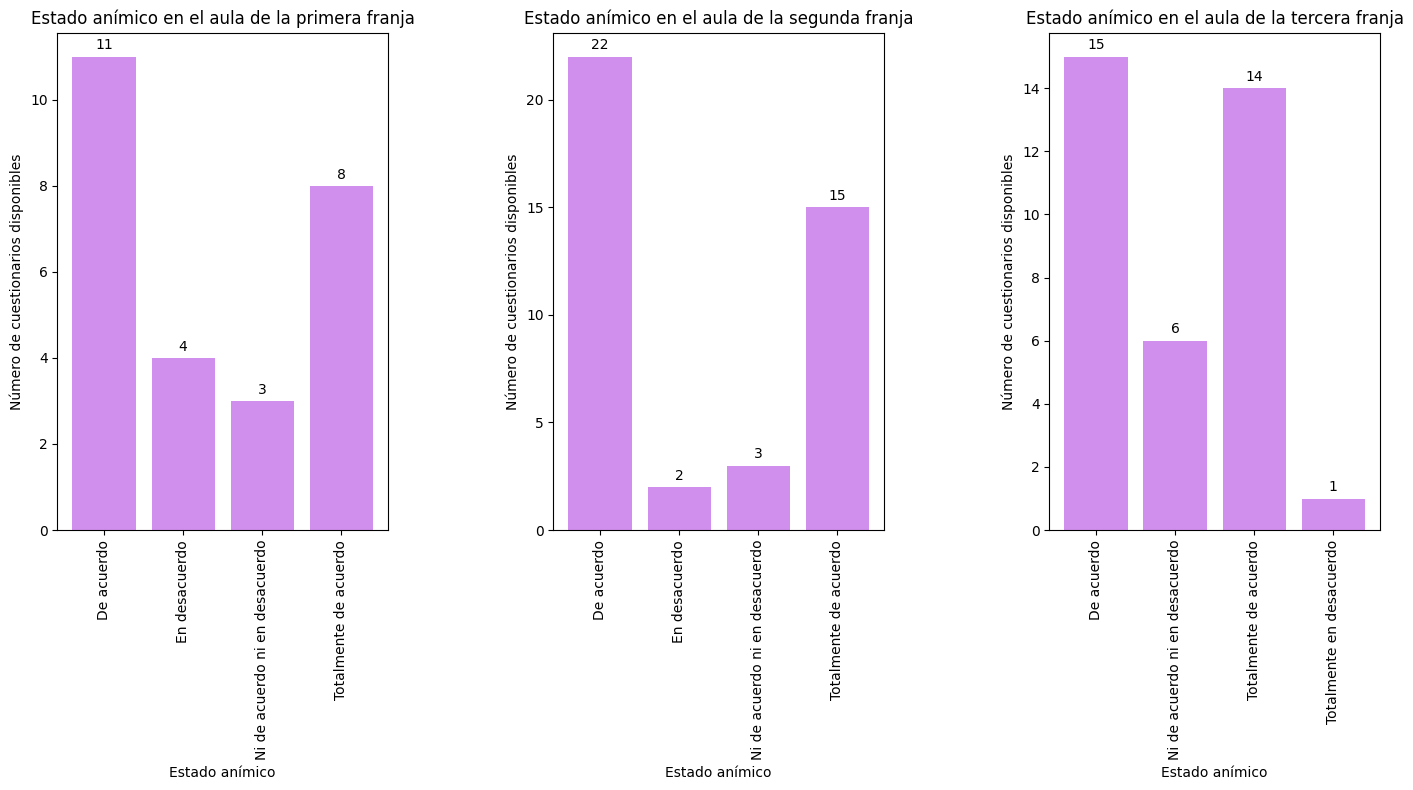

In [ ]:
x = 'Estado anímico'
y = 'Número de cuestionarios disponibles'
t = 'Estado anímico en el aula'
c = '#d18fed'
columna = 'E_anímico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada en la primera y segunda franjas.

No se disponen de muestras donde se refleje estar en desacuerdo con la afirmación planteada en la tercera franja.

##### E_físico

En esta sección, se analiza la variable de estado físico del aula, es decir, el grado de aceptación de la afirmación *Mi estado FÍSICO durante la clase ha sido bueno*, para cada una de las tres franjas horarias definidas anteriormente. Se obtiene la siguiente información:

* Para la franja de las 15:00:00-17:00:00, se disponen de 26 cuestionarios con la siguiente distribución:

  *   2 cuestionarios reflejan estar en desacuerdo con la afirmación.
  *   4 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  11 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  9 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 17:00:00-19:00:00, se disponen de 42 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   3 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  20 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  18 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

* Para la franja de las 19:00:00-21:00:00, se disponen de 36 cuestionarios con la siguiente distribución:

  *   1 cuestionario refleja estar en desacuerdo con la afirmación.
  *   6 cuestionarios reflejan estar ni de acuerdo ni en desacuerdo con la afirmación.
  *  17 cuestionarios reflejan estar de acuerdo con la afirmación.
  *  12 cuestionarios reflejan estar totalmente de acuerdo con la afirmación.

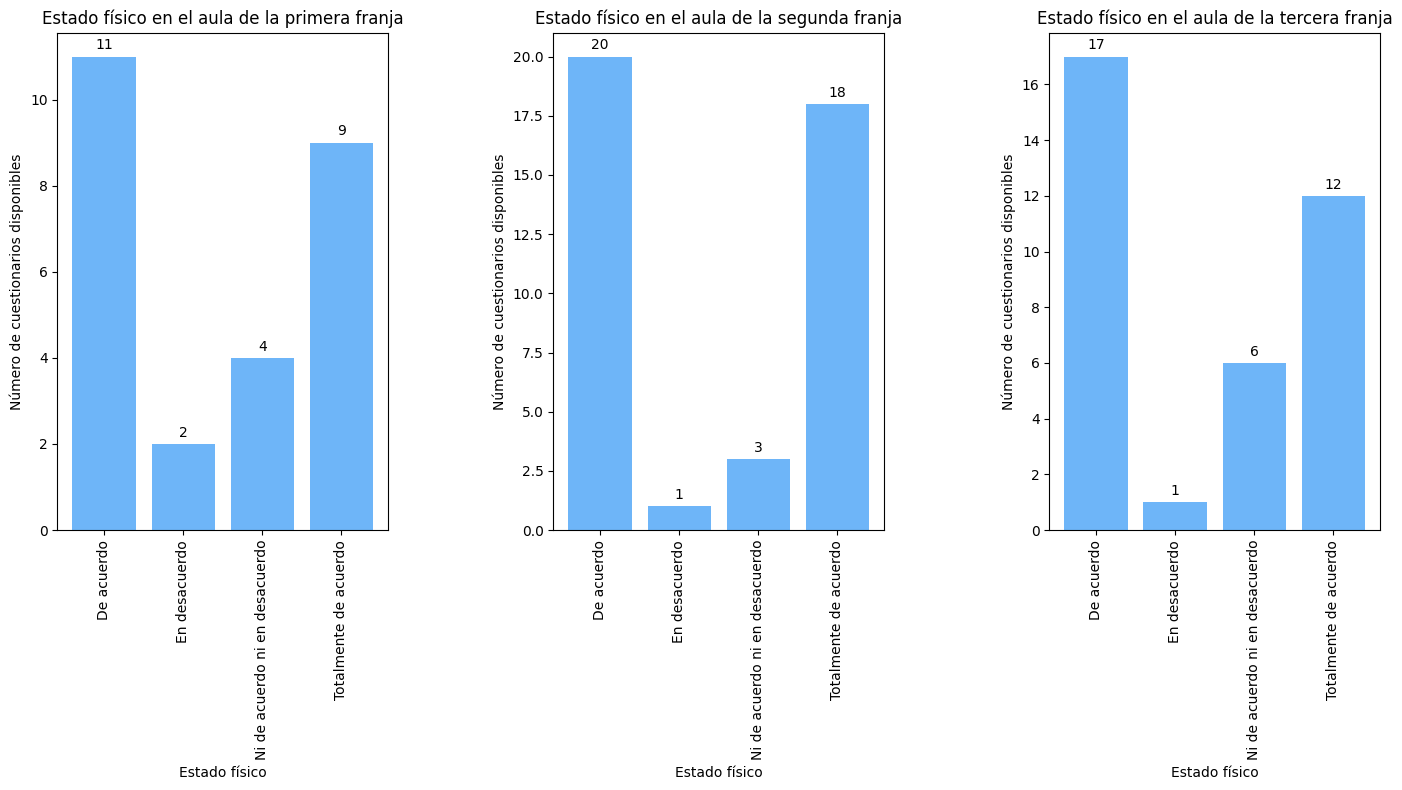

In [ ]:
x = 'Estado físico'
y = 'Número de cuestionarios disponibles'
t = 'Estado físico en el aula'
c = '#6eb5f8'
columna = 'E_físico'
tam = (14, 8)
s = 0.5

pinta_figuras(data_frames_franjas, x, y, t, c, columna, rotation= True, tamaño_g=tam, space=s)

No se disponen de muestras donde se refleje estar totalmente en desacuerdo con la afirmación planteada para ninguna de las tres franjas.


#### Análisis de correlación inicial

En esta sección, se realiza un análisi preliminar de las variables del conjunto de datos de entrada para determinar si, en primera instancia, existe algún tipo de realción entre las mismas. Puesto que la columa que almacena los grados de encendido del aire acondicionado se encuentra completamente vacía, es eliminada previamente al análisis de correlación.

In [ ]:
df_3304T = df_3304T.drop(columns=['Grados_AACC', 'Docencia'])

In [ ]:
columnas_numericas = df_3304T.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()
print(correlation_matrix)

                   Cortinas_abiertas  Luminosidad     Ruido  Temperatura  \
Cortinas_abiertas           1.000000    -0.101245  0.093363    -0.059665   
Luminosidad                -0.101245     1.000000  0.323345     0.175472   
Ruido                       0.093363     0.323345  1.000000     0.191397   
Temperatura                -0.059665     0.175472  0.191397     1.000000   
Ambiente_cargado           -0.000568     0.334709  0.593318     0.230780   
Ocupación_aula              0.116981    -0.197094  0.007576     0.056246   
Comodidad_aula             -0.133975     0.189479  0.273707     0.522099   

                   Ambiente_cargado  Ocupación_aula  Comodidad_aula  
Cortinas_abiertas         -0.000568        0.116981       -0.133975  
Luminosidad                0.334709       -0.197094        0.189479  
Ruido                      0.593318        0.007576        0.273707  
Temperatura                0.230780        0.056246        0.522099  
Ambiente_cargado           1.000000      

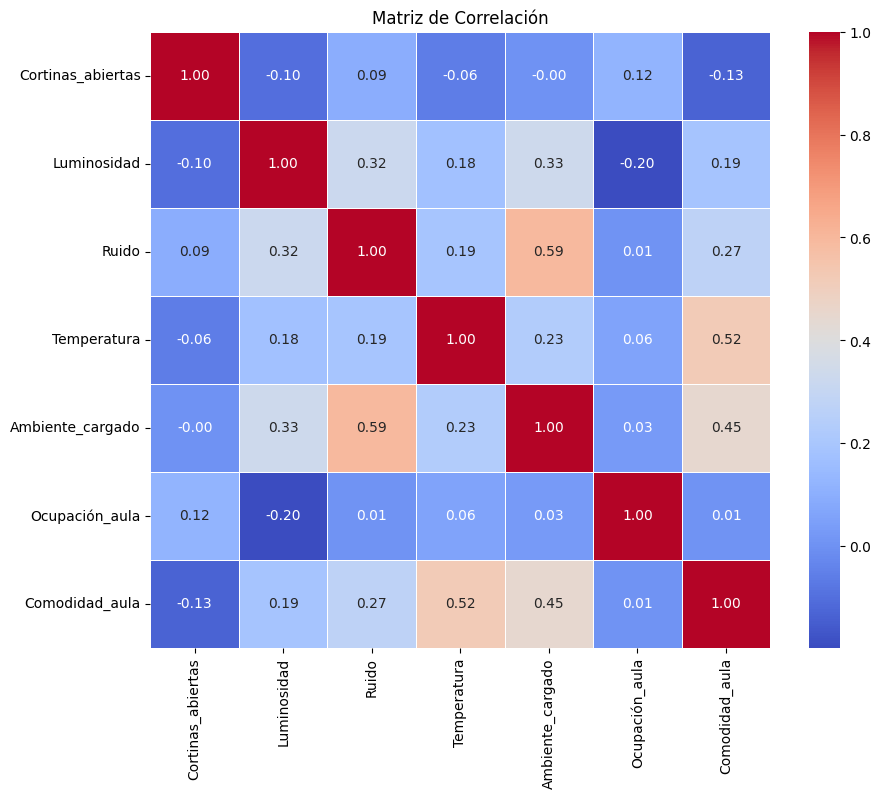

In [ ]:
columnas_numericas = df_3304T.select_dtypes(include=['float64', 'int64'])
correlation_matrix = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlación')
plt.show()

Tal y como puede observarse, existen variables con cierto tipo de relación entre sí. Por un lado, la variable de comodidad del aula muestra una correlación positiva de entre 0,45 y 0,52 con las variables de temperatura del aula y densidad del ambiente del aula, lo que significa que si las dos últimas variables mencionadas aumentan, la comodidad del aula tenderá a aumentar de la misma manera. Además, la variable de ambiente cargado presenta una correlación positiva de 0,59 con la variable de ruido.

Por otro lado, la variable de ocupación del aula presenta una correlación negativa de 0,20 con la variable de luminosidad.

#### Almacenamiento de los datos

Para facilitar el uso posterior de los datos, se almacenan en un fichero csv en Google Drive. Se elimina la columna de Grados_AACC puesto que prácticamente toda la columna se encuentra vacía y por tanto no resulta de interés para futuros experimentos. De la misma manera, puesto que los futuros experimentos se centrarán en el consumo energético y comodidad y bienestar del alumno en el aula, se elimina de la misma manera la columna de calidad docente.

In [ ]:
df_3304T.to_csv('/content/drive/My Drive/TFM/Datos_Finales/3304T.csv', index=False, sep=';')